c:\Users\stijn\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


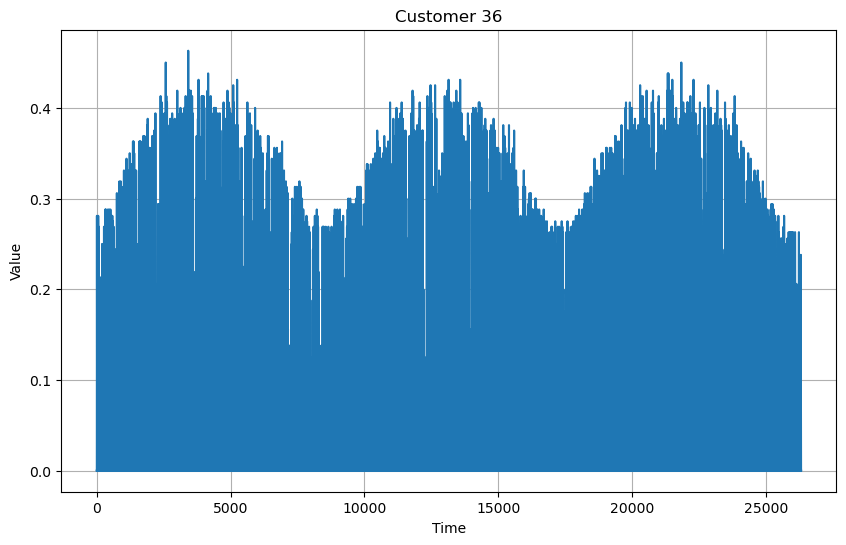

In [2]:
import concurrent.futures
import pandas as pd
import matplotlib.pyplot as plt
from river import compose
from river import linear_model
from river import metrics
from river import preprocessing
from river import optim
from river import neural_net
import logging
import numpy as np
from joblib import Parallel, delayed
import csv
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Assuming df is your DataFrame and 'consumption' is your target variable
customer_36 = pd.read_csv('customer_36.csv')

customer_36.head()

#plot the input data
plt.figure(figsize=(10,6))
plt.plot(customer_36['consumption'])
plt.title('Customer 36')
plt.ylabel('Value')
plt.xlabel('Time')
plt.grid(True)
plt.show()

Epoch 1
-------------------------------
loss: 0.021940  [    0/21043]
loss: 0.008189  [  800/21043]
loss: 0.002478  [ 1600/21043]


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss: 0.003240  [ 2400/21043]
loss: 0.057374  [ 3200/21043]
loss: 0.007006  [ 4000/21043]
loss: 0.010271  [ 4800/21043]
loss: 0.032950  [ 5600/21043]
loss: 0.003299  [ 6400/21043]
loss: 0.003496  [ 7200/21043]
loss: 0.002073  [ 8000/21043]
loss: 0.001231  [ 8800/21043]
loss: 0.001770  [ 9600/21043]
loss: 0.037168  [10400/21043]
loss: 0.010540  [11200/21043]
loss: 0.001048  [12000/21043]
loss: 0.015128  [12800/21043]
loss: 0.010416  [13600/21043]
loss: 0.001500  [14400/21043]
loss: 0.025018  [15200/21043]
loss: 0.001181  [16000/21043]
loss: 0.001734  [16800/21043]
loss: 0.016550  [17600/21043]
loss: 0.002341  [18400/21043]
loss: 0.001149  [19200/21043]
loss: 0.009208  [20000/21043]
loss: 0.011196  [20800/21043]


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 2
-------------------------------
loss: 0.004786  [    0/21043]
loss: 0.007340  [  800/21043]
loss: 0.003177  [ 1600/21043]
loss: 0.000190  [ 2400/21043]
loss: 0.035179  [ 3200/21043]
loss: 0.010774  [ 4000/21043]
loss: 0.002384  [ 4800/21043]
loss: 0.016876  [ 5600/21043]
loss: 0.005516  [ 6400/21043]
loss: 0.000926  [ 7200/21043]
loss: 0.002921  [ 8000/21043]
loss: 0.001702  [ 8800/21043]
loss: 0.000633  [ 9600/21043]
loss: 0.030935  [10400/21043]
loss: 0.012772  [11200/21043]
loss: 0.001096  [12000/21043]
loss: 0.013207  [12800/21043]
loss: 0.011600  [13600/21043]
loss: 0.000460  [14400/21043]
loss: 0.022649  [15200/21043]
loss: 0.001100  [16000/21043]
loss: 0.001186  [16800/21043]
loss: 0.015488  [17600/21043]
loss: 0.002568  [18400/21043]
loss: 0.000538  [19200/21043]
loss: 0.009748  [20000/21043]
loss: 0.012656  [20800/21043]
Epoch 3
-------------------------------
loss: 0.002026  [    0/21043]
loss: 0.008121  [  800/21043]
loss: 0.003370  [ 1600/21043]
loss: 0.000169  [ 24

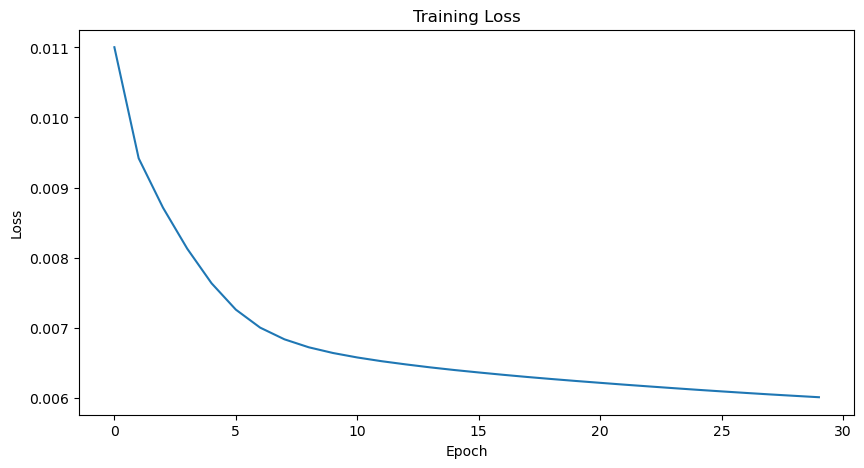

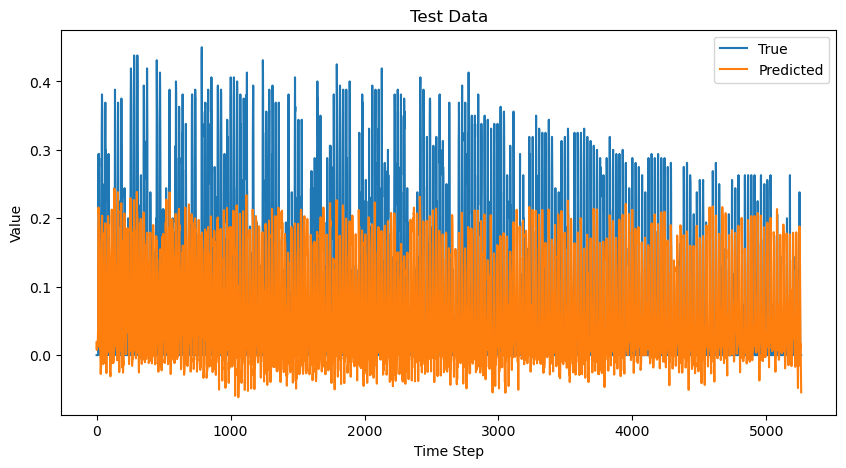

In [6]:

# Load your own data
X = customer_36.drop('consumption', axis=1).values
y = customer_36['consumption'].values

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create dataloaders
train_dataloader = DataLoader(TensorDataset(X_train, y_train), batch_size=8)
test_dataloader = DataLoader(TensorDataset(X_test, y_test), batch_size=8)


# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
        )

    def forward(self, x):
        return self.model(x)

model = NeuralNetwork()

# Define loss and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Store the losses for each epoch
losses = []

# Modify your training function to return the loss
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    total_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return total_loss / len(dataloader)

# Train the model and store the loss for each epoch
for t in range(30):
    print(f"Epoch {t+1}\n-------------------------------")
    loss = train(train_dataloader, model, loss_fn, optimizer) 
    losses.append(loss)
print("Done!")

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Make predictions on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test)

# Plot the true values and the predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.title("Test Data")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
from skorch import NeuralNetRegressor

# Define a function to create the model
def create_model(num_units=10, num_layers=1, learning_rate=0.01):
    layers = []
    layers.append(nn.Linear(X_train.shape[1], num_units))
    layers.append(nn.ReLU())
    for _ in range(num_layers - 1):
        layers.append(nn.Linear(num_units, num_units))
        layers.append(nn.ReLU())
    layers.append(nn.Linear(num_units, 1))
    model = nn.Sequential(*layers)
    return model
# Create a skorch estimator for your PyTorch model
net = NeuralNetRegressor(
    module=create_model,
    criterion=nn.MSELoss,
    optimizer=torch.optim.SGD,
    iterator_train__shuffle=True,
    device='cuda' if torch.cuda.is_available() else 'cpu'  # use GPU if available
)

# Define the hyperparameters for the grid search
params = {
    'module__num_units': [k for k in range(1, 50)],
    'module__num_layers': [1, 2, 3],
    'lr': [0.01, 0.02, 0.05],
}

# Create the grid search
gs = GridSearchCV(net, params, refit=False, cv=3, scoring='neg_mean_squared_error')

# Perform the grid search
gs.fit(X_train, y_train)

# Print the best parameters
print(gs.best_params_)

c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0535        0.0238  0.3522


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0192        0.0153  0.3120
      3        0.0169        0.0131  0.2411
      4        0.0158        0.0120  0.2754
      5        0.0151        0.0113  0.2474
      6        0.0145        0.0106  0.2323
      7        0.0142        0.0103  0.2204
      8        0.0139        0.0099  0.2193
      9        0.0137        0.0097  0.2172
     10        0.0135        0.0095  0.2219


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.1210        0.0550  0.2264


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0424        0.0269  0.2215
      3        0.0280        0.0189  0.2168
      4        0.0219        0.0155  0.2172
      5        0.0187        0.0139  0.2151
      6        0.0169        0.0130  0.2205
      7        0.0158        0.0125  0.2089
      8        0.0150        0.0121  0.2162
      9        0.0145        0.0119  0.2101
     10        0.0142        0.0118  0.2210


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.3065        0.0383  0.2228


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0201        0.0147  0.2247
      3        0.0140        0.0134  0.2136
      4        0.0135        0.0129  0.2192
      5        0.0133        0.0125  0.2363
      6        0.0131        0.0123  0.2370
      7        0.0129        0.0121  0.2235
      8        0.0128        0.0120  0.2196
      9        0.0128        0.0118  0.2318
     10        0.0127        0.0117  0.2236


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.1526        0.0247  0.2546


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0238        0.0155  0.2252
      3        0.0184        0.0132  0.2284
      4        0.0165        0.0118  0.2345
      5        0.0155        0.0109  0.2304
      6        0.0148        0.0104  0.2185
      7        0.0143        0.0099  0.2240
      8        0.0140        0.0096  0.2201
      9        0.0137        0.0093  0.2125
     10        0.0135        0.0091  0.2172


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0520        0.0244  0.2259


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0255        0.0175  0.2247
      3        0.0194        0.0151  0.2358
      4        0.0170        0.0139  0.2416
      5        0.0158        0.0133  0.2249
      6        0.0152        0.0129  0.2228
      7        0.0148        0.0127  0.2204
      8        0.0146        0.0125  0.2237
      9        0.0144        0.0124  0.2203
     10        0.0142        0.0123  0.2179


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0749        0.0242  0.2309


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0167        0.0155  0.2340
      3        0.0148        0.0144  0.2205
      4        0.0144        0.0139  0.2288
      5        0.0140        0.0135  0.2333
      6        0.0138        0.0132  0.2231
      7        0.0136        0.0130  0.2178
      8        0.0134        0.0128  0.2213
      9        0.0133        0.0127  0.2225
     10        0.0132        0.0125  0.2191


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0628        0.0292  0.2385


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0281        0.0198  0.2772
      3        0.0217        0.0155  0.2248
      4        0.0186        0.0132  0.2165
      5        0.0169        0.0118  0.2259
      6        0.0158        0.0109  0.2172
      7        0.0151        0.0104  0.2127
      8        0.0146        0.0099  0.2167
      9        0.0142        0.0096  0.2167
     10        0.0139        0.0093  0.2155


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0696        0.0237  0.2563


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0179        0.0183  0.2236
      3        0.0166        0.0169  0.2142
      4        0.0160        0.0161  0.2158
      5        0.0155        0.0154  0.2449
      6        0.0151        0.0148  0.2184
      7        0.0148        0.0144  0.2166
      8        0.0145        0.0140  0.2417
      9        0.0143        0.0137  0.2278
     10        0.0141        0.0134  0.2205


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0884        0.0406  0.2735


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0353        0.0212  0.2264
      3        0.0242        0.0167  0.2307
      4        0.0198        0.0146  0.2203
      5        0.0176        0.0136  0.2252
      6        0.0164        0.0130  0.2200
      7        0.0155        0.0126  0.2167
      8        0.0149        0.0123  0.2163
      9        0.0145        0.0121  0.2213
     10        0.0141        0.0119  0.2334


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0435        0.0141  0.2308


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0164        0.0102  0.2212
      3        0.0147        0.0093  0.2270
      4        0.0139        0.0089  0.2329
      5        0.0135        0.0086  0.2270
      6        0.0132        0.0085  0.2352
      7        0.0131        0.0084  0.2344
      8        0.0129        0.0083  0.2309
      9        0.0129        0.0083  0.2390
     10        0.0128        0.0082  0.2440


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0376        0.0149  0.2273


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0152        0.0127  0.2378
      3        0.0144        0.0122  0.2248
      4        0.0140        0.0120  0.2218
      5        0.0138        0.0118  0.2232
      6        0.0136        0.0118  0.2275
      7        0.0134        0.0116  0.2290
      8        0.0133        0.0115  0.2216
      9        0.0133        0.0115  0.2165
     10        0.0132        0.0115  0.2175


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0414        0.0173  0.2339


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0251        0.0148  0.2207
      3        0.0200        0.0136  0.2246
      4        0.0174        0.0129  0.2206
      5        0.0160        0.0126  0.2221
      6        0.0151        0.0123  0.2230
      7        0.0145        0.0121  0.2373
      8        0.0141        0.0120  0.2226
      9        0.0139        0.0119  0.2215
     10        0.0137        0.0119  0.2191


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0492        0.0186  0.2308


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0209        0.0141  0.2211
      3        0.0179        0.0121  0.2151
      4        0.0163        0.0110  0.2201
      5        0.0153        0.0103  0.2149
      6        0.0147        0.0098  0.2329
      7        0.0142        0.0095  0.2184
      8        0.0139        0.0093  0.2210
      9        0.0137        0.0091  0.2223
     10        0.0135        0.0089  0.2152


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0541        0.0214  0.2238


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0201        0.0180  0.2275
      3        0.0180        0.0166  0.2257
      4        0.0169        0.0157  0.2245
      5        0.0161        0.0150  0.2299
      6        0.0157        0.0145  0.2324
      7        0.0153        0.0141  0.2248
      8        0.0150        0.0138  0.2241
      9        0.0148        0.0135  0.2219
     10        0.0146        0.0133  0.2222


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0761        0.0235  0.2346


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0190        0.0183  0.2267
      3        0.0168        0.0165  0.2239
      4        0.0157        0.0154  0.2300
      5        0.0150        0.0147  0.2332
      6        0.0146        0.0142  0.2264
      7        0.0142        0.0138  0.2235
      8        0.0140        0.0135  0.2277
      9        0.0138        0.0132  0.2261
     10        0.0136        0.0131  0.2278


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0555        0.0345  0.2286


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0261        0.0220  0.2204
      3        0.0211        0.0177  0.2157
      4        0.0185        0.0154  0.2297
      5        0.0170        0.0140  0.2254
      6        0.0160        0.0130  0.2243
      7        0.0153        0.0122  0.2218
      8        0.0148        0.0116  0.2248
      9        0.0145        0.0113  0.2183
     10        0.0142        0.0108  0.2180


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0858        0.0297  0.2236


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0304        0.0201  0.2217
      3        0.0219        0.0180  0.2392
      4        0.0189        0.0168  0.2243
      5        0.0174        0.0159  0.2138
      6        0.0165        0.0153  0.2168
      7        0.0159        0.0148  0.2201
      8        0.0155        0.0144  0.2193
      9        0.0152        0.0140  0.2190
     10        0.0149        0.0137  0.2195


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0286        0.0262  0.2270


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0220        0.0225  0.2217
      3        0.0196        0.0198  0.2243
      4        0.0180        0.0180  0.2173
      5        0.0169        0.0166  0.2180
      6        0.0161        0.0156  0.2214
      7        0.0154        0.0149  0.2314
      8        0.0150        0.0143  0.2239
      9        0.0146        0.0139  0.2175
     10        0.0143        0.0135  0.2147


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0725        0.0337  0.2323


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0354        0.0221  0.2388
      3        0.0254        0.0172  0.2240
      4        0.0209        0.0145  0.2235
      5        0.0185        0.0129  0.2191
      6        0.0170        0.0119  0.2182
      7        0.0160        0.0110  0.2167
      8        0.0154        0.0106  0.2180
      9        0.0148        0.0101  0.2205
     10        0.0145        0.0099  0.2239


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0298        0.0227  0.2386


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0215        0.0189  0.2321
      3        0.0195        0.0173  0.2218
      4        0.0182        0.0165  0.2183
      5        0.0174        0.0156  0.2182
      6        0.0169        0.0151  0.2214
      7        0.0164        0.0146  0.2208
      8        0.0160        0.0143  0.2178
      9        0.0158        0.0140  0.2191
     10        0.0155        0.0138  0.2169


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0953        0.0407  0.2427


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0301        0.0260  0.2196
      3        0.0220        0.0203  0.2175
      4        0.0188        0.0175  0.2249
      5        0.0173        0.0162  0.2263
      6        0.0163        0.0153  0.2260
      7        0.0157        0.0147  0.2193
      8        0.0152        0.0142  0.2251
      9        0.0149        0.0139  0.2253
     10        0.0146        0.0136  0.2387


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0248        0.0167  0.2347


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0201        0.0139  0.2259
      3        0.0177        0.0123  0.2175
      4        0.0164        0.0113  0.2230
      5        0.0154        0.0106  0.2162
      6        0.0148        0.0102  0.2195
      7        0.0144        0.0098  0.2200
      8        0.0141        0.0096  0.2186
      9        0.0139        0.0093  0.2243
     10        0.0136        0.0092  0.2270


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0410        0.0298  0.2253


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0212        0.0209  0.2290
      3        0.0176        0.0180  0.2268
      4        0.0163        0.0161  0.2169
      5        0.0157        0.0153  0.2158
      6        0.0153        0.0148  0.2171
      7        0.0150        0.0144  0.2198
      8        0.0148        0.0140  0.2198
      9        0.0146        0.0138  0.2276
     10        0.0144        0.0135  0.2182


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0503        0.0271  0.2295


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0233        0.0208  0.2203
      3        0.0207        0.0190  0.2189
      4        0.0190        0.0175  0.2221
      5        0.0178        0.0164  0.2175
      6        0.0169        0.0156  0.2184
      7        0.0162        0.0150  0.2160
      8        0.0156        0.0145  0.2305
      9        0.0152        0.0140  0.2219
     10        0.0148        0.0137  0.2223


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0830        0.0193  0.2334


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0236        0.0148  0.2283
      3        0.0199        0.0132  0.2284
      4        0.0181        0.0122  0.2254
      5        0.0169        0.0115  0.2280
      6        0.0162        0.0111  0.2257
      7        0.0157        0.0107  0.2330
      8        0.0153        0.0104  0.2241
      9        0.0150        0.0102  0.2315
     10        0.0148        0.0099  0.2242


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0450        0.0283  0.2350


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0252        0.0202  0.2199
      3        0.0203        0.0172  0.2214
      4        0.0182        0.0157  0.2186
      5        0.0171        0.0149  0.2220
      6        0.0164        0.0143  0.2223
      7        0.0159        0.0139  0.2312
      8        0.0155        0.0136  0.2242
      9        0.0152        0.0133  0.2252
     10        0.0150        0.0132  0.2168


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0408        0.0273  0.2255


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0249        0.0214  0.2261
      3        0.0212        0.0190  0.2191
      4        0.0192        0.0175  0.2195
      5        0.0180        0.0165  0.2211
      6        0.0171        0.0158  0.2325
      7        0.0164        0.0153  0.2185
      8        0.0160        0.0149  0.2149
      9        0.0156        0.0145  0.2175
     10        0.0153        0.0143  0.2182


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0383        0.0227  0.2317


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0241        0.0169  0.2177
      3        0.0199        0.0139  0.2257
      4        0.0178        0.0123  0.2278
      5        0.0166        0.0113  0.2414
      6        0.0158        0.0107  0.2169
      7        0.0153        0.0102  0.2188
      8        0.0148        0.0099  0.2191
      9        0.0145        0.0096  0.2212
     10        0.0143        0.0094  0.2190


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0494        0.0279  0.2340


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0245        0.0216  0.2220
      3        0.0206        0.0182  0.2202
      4        0.0185        0.0163  0.2289
      5        0.0171        0.0151  0.2278
      6        0.0162        0.0143  0.2257
      7        0.0156        0.0139  0.2184
      8        0.0151        0.0134  0.2189
      9        0.0148        0.0131  0.2189
     10        0.0146        0.0129  0.2160


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0797        0.0323  0.2285


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0250        0.0235  0.2221
      3        0.0196        0.0189  0.2146
      4        0.0174        0.0165  0.2271
      5        0.0161        0.0153  0.2157
      6        0.0153        0.0145  0.2229
      7        0.0148        0.0139  0.2237
      8        0.0144        0.0135  0.2259
      9        0.0141        0.0133  0.2252
     10        0.0139        0.0131  0.2235


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0289        0.0198  0.2345


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0201        0.0148  0.2253
      3        0.0171        0.0128  0.2279
      4        0.0157        0.0115  0.2174
      5        0.0150        0.0108  0.2187
      6        0.0145        0.0103  0.2171
      7        0.0142        0.0101  0.2195
      8        0.0140        0.0096  0.2140
      9        0.0138        0.0095  0.2194
     10        0.0137        0.0094  0.2156


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0397        0.0240  0.2325


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0216        0.0174  0.2352
      3        0.0187        0.0158  0.2273
      4        0.0175        0.0149  0.2243
      5        0.0168        0.0144  0.2239
      6        0.0162        0.0140  0.2177
      7        0.0158        0.0137  0.2193
      8        0.0155        0.0135  0.2171
      9        0.0153        0.0133  0.2165
     10        0.0151        0.0131  0.2169


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0244        0.0188  0.2325


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0192        0.0160  0.2350
      3        0.0169        0.0146  0.2299
      4        0.0155        0.0138  0.2230
      5        0.0148        0.0133  0.2226
      6        0.0143        0.0129  0.2236
      7        0.0139        0.0127  0.2242
      8        0.0137        0.0125  0.2253
      9        0.0135        0.0123  0.2252
     10        0.0134        0.0123  0.2250


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0450        0.0176  0.2486


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0214        0.0143  0.2282
      3        0.0183        0.0124  0.2257
      4        0.0166        0.0112  0.2230
      5        0.0156        0.0106  0.2282
      6        0.0151        0.0101  0.2209
      7        0.0146        0.0098  0.2230
      8        0.0143        0.0095  0.2245
      9        0.0141        0.0092  0.2274
     10        0.0139        0.0091  0.2292


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0849        0.0370  0.2331


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0278        0.0250  0.2270
      3        0.0202        0.0193  0.2171
      4        0.0173        0.0164  0.2149
      5        0.0159        0.0150  0.2156
      6        0.0152        0.0141  0.2180
      7        0.0147        0.0135  0.2152
      8        0.0144        0.0132  0.2196
      9        0.0142        0.0129  0.2151
     10        0.0141        0.0127  0.2263


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0337        0.0249  0.2270


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0231        0.0213  0.2180
      3        0.0206        0.0197  0.2143
      4        0.0192        0.0186  0.2177
      5        0.0183        0.0177  0.2191
      6        0.0176        0.0170  0.2152
      7        0.0170        0.0165  0.2186
      8        0.0165        0.0159  0.2131
      9        0.0161        0.0155  0.2238
     10        0.0157        0.0151  0.2132


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0528        0.0228  0.2330


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0249        0.0153  0.2184
      3        0.0189        0.0124  0.2177
      4        0.0164        0.0110  0.2235
      5        0.0151        0.0101  0.2401
      6        0.0144        0.0096  0.2278
      7        0.0139        0.0093  0.2291
      8        0.0136        0.0090  0.2319
      9        0.0133        0.0088  0.2286
     10        0.0132        0.0086  0.2267


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0608        0.0323  0.2236


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0249        0.0229  0.2231
      3        0.0195        0.0191  0.2163
      4        0.0171        0.0174  0.2212
      5        0.0159        0.0163  0.2157
      6        0.0153        0.0156  0.2167
      7        0.0148        0.0152  0.2187
      8        0.0146        0.0146  0.2246
      9        0.0143        0.0143  0.2131
     10        0.0142        0.0141  0.2159


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0289        0.0193  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0193        0.0151  0.2126
      3        0.0163        0.0134  0.2182
      4        0.0149        0.0127  0.2145
      5        0.0142        0.0123  0.2223
      6        0.0137        0.0121  0.2232
      7        0.0135        0.0120  0.2408
      8        0.0133        0.0119  0.2235
      9        0.0132        0.0118  0.2259
     10        0.0131        0.0117  0.2273


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0242        0.0163  0.2365


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0198        0.0148  0.2201
      3        0.0184        0.0139  0.2187
      4        0.0174        0.0130  0.2170
      5        0.0166        0.0123  0.2172
      6        0.0161        0.0119  0.2217
      7        0.0156        0.0116  0.2184
      8        0.0153        0.0112  0.2158
      9        0.0150        0.0109  0.2163
     10        0.0147        0.0106  0.2198


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0414        0.0224  0.2360


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0233        0.0172  0.2256
      3        0.0194        0.0152  0.2261
      4        0.0176        0.0141  0.2259
      5        0.0166        0.0135  0.2231
      6        0.0159        0.0131  0.2281
      7        0.0154        0.0128  0.2238
      8        0.0151        0.0126  0.2258
      9        0.0148        0.0124  0.2257
     10        0.0146        0.0123  0.2181


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0297        0.0182  0.2362


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0212        0.0151  0.2297
      3        0.0182        0.0138  0.2211
      4        0.0166        0.0131  0.2157
      5        0.0157        0.0128  0.2309
      6        0.0151        0.0125  0.2218
      7        0.0147        0.0123  0.2240
      8        0.0144        0.0122  0.2211
      9        0.0142        0.0121  0.2272
     10        0.0140        0.0120  0.2251


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0264        0.0149  0.2425


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0203        0.0127  0.2241
      3        0.0182        0.0117  0.2221
      4        0.0169        0.0110  0.2322
      5        0.0161        0.0106  0.2271
      6        0.0155        0.0103  0.2202
      7        0.0152        0.0101  0.2205
      8        0.0149        0.0100  0.2327
      9        0.0146        0.0099  0.2136
     10        0.0144        0.0097  0.2211


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0438        0.0263  0.2340


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0265        0.0222  0.2229
      3        0.0230        0.0199  0.2320
      4        0.0210        0.0185  0.2258
      5        0.0197        0.0174  0.2247
      6        0.0188        0.0166  0.2259
      7        0.0181        0.0159  0.2210
      8        0.0175        0.0154  0.2256
      9        0.0171        0.0150  0.2207
     10        0.0166        0.0146  0.2210


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0287        0.0198  0.2300


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0199        0.0164  0.2320
      3        0.0174        0.0149  0.2327
      4        0.0163        0.0141  0.2220
      5        0.0156        0.0136  0.2163
      6        0.0152        0.0133  0.2167
      7        0.0149        0.0130  0.2233
      8        0.0146        0.0128  0.2212
      9        0.0144        0.0126  0.2180
     10        0.0142        0.0125  0.2197


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0339        0.0217  0.2311


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0243        0.0168  0.2297
      3        0.0203        0.0142  0.2175
      4        0.0183        0.0128  0.2180
      5        0.0170        0.0120  0.2201
      6        0.0162        0.0115  0.2209
      7        0.0157        0.0111  0.2150
      8        0.0152        0.0107  0.2157
      9        0.0149        0.0103  0.2203
     10        0.0146        0.0100  0.2169


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0383        0.0279  0.2446


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0269        0.0223  0.2171
      3        0.0226        0.0196  0.2197
      4        0.0202        0.0178  0.2173
      5        0.0187        0.0166  0.2163
      6        0.0176        0.0157  0.2160
      7        0.0169        0.0150  0.2154
      8        0.0163        0.0144  0.2150
      9        0.0158        0.0140  0.2188
     10        0.0155        0.0136  0.2153


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0444        0.0157  0.2665


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0194        0.0140  0.2265
      3        0.0171        0.0136  0.2292
      4        0.0162        0.0133  0.2254
      5        0.0155        0.0130  0.2292
      6        0.0151        0.0128  0.2201
      7        0.0147        0.0127  0.2269
      8        0.0144        0.0125  0.2226
      9        0.0142        0.0124  0.2252
     10        0.0140        0.0123  0.2312


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0325        0.0231  0.2340


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0227        0.0183  0.2151
      3        0.0195        0.0157  0.2096
      4        0.0178        0.0142  0.2174
      5        0.0168        0.0131  0.2134
      6        0.0161        0.0125  0.2126
      7        0.0155        0.0120  0.2213
      8        0.0151        0.0116  0.2211
      9        0.0148        0.0111  0.2207
     10        0.0146        0.0109  0.2385


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0331        0.0249  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0242        0.0201  0.2271
      3        0.0210        0.0178  0.2284
      4        0.0193        0.0164  0.2231
      5        0.0182        0.0155  0.2209
      6        0.0174        0.0148  0.2242
      7        0.0168        0.0143  0.2159
      8        0.0163        0.0139  0.2102
      9        0.0159        0.0135  0.2298
     10        0.0156        0.0133  0.2183


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0532        0.0255  0.2300


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0221        0.0194  0.2140
      3        0.0183        0.0169  0.2270
      4        0.0166        0.0155  0.2168
      5        0.0157        0.0147  0.2130
      6        0.0151        0.0141  0.2148
      7        0.0147        0.0137  0.2140
      8        0.0144        0.0134  0.2179
      9        0.0142        0.0131  0.2189
     10        0.0140        0.0129  0.2137


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0431        0.0253  0.2261


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0259        0.0168  0.2268
      3        0.0207        0.0136  0.2217
      4        0.0184        0.0119  0.2229
      5        0.0170        0.0110  0.2203
      6        0.0162        0.0104  0.2359
      7        0.0157        0.0100  0.2248
      8        0.0153        0.0098  0.2281
      9        0.0150        0.0095  0.2211
     10        0.0148        0.0094  0.2212


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0465        0.0277  0.2325


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0249        0.0189  0.2295
      3        0.0207        0.0164  0.2244
      4        0.0190        0.0152  0.2197
      5        0.0180        0.0147  0.2224
      6        0.0174        0.0143  0.2188
      7        0.0169        0.0140  0.2361
      8        0.0165        0.0137  0.2225
      9        0.0162        0.0135  0.2259
     10        0.0159        0.0134  0.2221


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0452        0.0270  0.2346


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0266        0.0208  0.2133
      3        0.0217        0.0182  0.2157
      4        0.0193        0.0166  0.2100
      5        0.0179        0.0156  0.2118
      6        0.0170        0.0150  0.2279
      7        0.0162        0.0144  0.2160
      8        0.0157        0.0140  0.2233
      9        0.0153        0.0137  0.2204
     10        0.0150        0.0134  0.2234


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0329        0.0212  0.2306


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0231        0.0168  0.2178
      3        0.0196        0.0143  0.2157
      4        0.0177        0.0128  0.2133
      5        0.0166        0.0118  0.2187
      6        0.0157        0.0110  0.2242
      7        0.0151        0.0105  0.2198
      8        0.0147        0.0101  0.2204
      9        0.0144        0.0098  0.2217
     10        0.0141        0.0095  0.2218


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0332        0.0229  0.2235


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0233        0.0208  0.2147
      3        0.0205        0.0188  0.2124
      4        0.0189        0.0173  0.2210
      5        0.0178        0.0163  0.2347
      6        0.0171        0.0155  0.2247
      7        0.0166        0.0150  0.2218
      8        0.0161        0.0144  0.2255
      9        0.0158        0.0141  0.2254
     10        0.0155        0.0138  0.2211


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0653        0.0249  0.2241


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0218        0.0177  0.2169
      3        0.0180        0.0153  0.2133
      4        0.0165        0.0143  0.2230
      5        0.0156        0.0137  0.2200
      6        0.0150        0.0132  0.2109
      7        0.0146        0.0129  0.2132
      8        0.0143        0.0127  0.2118
      9        0.0141        0.0125  0.2154
     10        0.0140        0.0124  0.2127


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0366        0.0168  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0197        0.0111  0.2267
      3        0.0165        0.0097  0.2178
      4        0.0153        0.0093  0.2258
      5        0.0148        0.0090  0.2130
      6        0.0144        0.0089  0.2127
      7        0.0142        0.0088  0.2183
      8        0.0140        0.0088  0.2147
      9        0.0138        0.0087  0.2116
     10        0.0137        0.0087  0.2155


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0761        0.0288  0.2287


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0234        0.0174  0.2222
      3        0.0176        0.0148  0.2329
      4        0.0157        0.0138  0.2229
      5        0.0150        0.0134  0.2232
      6        0.0146        0.0131  0.2259
      7        0.0144        0.0129  0.2258
      8        0.0142        0.0127  0.2270
      9        0.0141        0.0126  0.2226
     10        0.0140        0.0125  0.2250


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0359        0.0269  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0230        0.0198  0.2301
      3        0.0189        0.0171  0.2226
      4        0.0171        0.0155  0.2155
      5        0.0160        0.0147  0.2132
      6        0.0154        0.0141  0.2156
      7        0.0149        0.0136  0.2301
      8        0.0145        0.0133  0.2210
      9        0.0143        0.0131  0.2244
     10        0.0141        0.0128  0.2224


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0347        0.0222  0.2305


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0211        0.0154  0.2377
      3        0.0180        0.0130  0.2241
      4        0.0167        0.0118  0.2189
      5        0.0159        0.0110  0.2217
      6        0.0154        0.0105  0.2264
      7        0.0151        0.0104  0.2228
      8        0.0148        0.0100  0.2244
      9        0.0145        0.0099  0.2243
     10        0.0144        0.0097  0.2204


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0331        0.0198  0.2426


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0210        0.0155  0.2158
      3        0.0177        0.0140  0.2140
      4        0.0163        0.0133  0.2109
      5        0.0156        0.0129  0.2195
      6        0.0151        0.0127  0.2256
      7        0.0148        0.0125  0.2171
      8        0.0145        0.0124  0.2208
      9        0.0144        0.0123  0.2208
     10        0.0142        0.0122  0.2208


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0304        0.0245  0.2278


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0221        0.0194  0.2179
      3        0.0194        0.0171  0.2179
      4        0.0178        0.0157  0.2128
      5        0.0168        0.0149  0.2169
      6        0.0162        0.0144  0.2116
      7        0.0157        0.0140  0.2134
      8        0.0153        0.0137  0.2106
      9        0.0150        0.0134  0.2126
     10        0.0147        0.0133  0.2182


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0340        0.0213  0.2320


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0208        0.0146  0.2226
      3        0.0179        0.0126  0.2155
      4        0.0166        0.0118  0.2134
      5        0.0160        0.0112  0.2506
      6        0.0155        0.0109  0.2282
      7        0.0152        0.0106  0.2126
      8        0.0149        0.0104  0.2138
      9        0.0147        0.0102  0.2119
     10        0.0145        0.0101  0.2227


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0708        0.0322  0.2266


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0300        0.0219  0.2232
      3        0.0223        0.0182  0.2196
      4        0.0191        0.0166  0.2165
      5        0.0174        0.0155  0.2127
      6        0.0164        0.0148  0.2163
      7        0.0158        0.0143  0.2125
      8        0.0153        0.0139  0.2176
      9        0.0150        0.0136  0.2358
     10        0.0147        0.0134  0.2124


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0349        0.0214  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0219        0.0170  0.2263
      3        0.0188        0.0157  0.2281
      4        0.0174        0.0149  0.2183
      5        0.0165        0.0144  0.2215
      6        0.0160        0.0139  0.2151
      7        0.0155        0.0137  0.2210
      8        0.0152        0.0135  0.2161
      9        0.0149        0.0132  0.2232
     10        0.0147        0.0130  0.2191


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0286        0.0156  0.2206


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0189        0.0129  0.2161
      3        0.0171        0.0117  0.2171
      4        0.0161        0.0108  0.2153
      5        0.0154        0.0103  0.2136
      6        0.0149        0.0099  0.2137
      7        0.0146        0.0096  0.2141
      8        0.0144        0.0095  0.2302
      9        0.0142        0.0093  0.2197
     10        0.0140        0.0093  0.2207


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0394        0.0200  0.2240


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0208        0.0167  0.2244
      3        0.0180        0.0152  0.2095
      4        0.0166        0.0144  0.2130
      5        0.0159        0.0139  0.2141
      6        0.0154        0.0136  0.2150
      7        0.0151        0.0133  0.2185
      8        0.0149        0.0131  0.2241
      9        0.0147        0.0129  0.2250
     10        0.0145        0.0128  0.2221


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0352        0.0230  0.2240


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0229        0.0183  0.2254
      3        0.0192        0.0163  0.2206
      4        0.0174        0.0152  0.2200
      5        0.0164        0.0145  0.2228
      6        0.0158        0.0140  0.2221
      7        0.0154        0.0137  0.2321
      8        0.0150        0.0134  0.2143
      9        0.0148        0.0132  0.2182
     10        0.0146        0.0130  0.2220


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0322        0.0147  0.2256


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0192        0.0118  0.2357
      3        0.0169        0.0110  0.2233
      4        0.0160        0.0105  0.2250
      5        0.0155        0.0102  0.2227
      6        0.0152        0.0101  0.2281
      7        0.0149        0.0100  0.2232
      8        0.0147        0.0099  0.2192
      9        0.0145        0.0097  0.2204
     10        0.0143        0.0096  0.2241


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0585        0.0327  0.2230


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0256        0.0215  0.2241
      3        0.0207        0.0182  0.2264
      4        0.0188        0.0163  0.2204
      5        0.0178        0.0153  0.2157
      6        0.0171        0.0147  0.2162
      7        0.0166        0.0142  0.2131
      8        0.0162        0.0138  0.2072
      9        0.0159        0.0136  0.2163
     10        0.0156        0.0133  0.2146


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0527        0.0293  0.2200


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0258        0.0193  0.2230
      3        0.0195        0.0160  0.2227
      4        0.0169        0.0146  0.2208
      5        0.0155        0.0137  0.2335
      6        0.0148        0.0133  0.2220
      7        0.0143        0.0130  0.2204
      8        0.0140        0.0128  0.2254
      9        0.0138        0.0126  0.2106
     10        0.0136        0.0125  0.2153


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0320        0.0196  0.2286


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0206        0.0148  0.2127
      3        0.0175        0.0128  0.2172
      4        0.0160        0.0115  0.2192
      5        0.0152        0.0109  0.2254
      6        0.0147        0.0102  0.2091
      7        0.0143        0.0101  0.2130
      8        0.0141        0.0097  0.2134
      9        0.0139        0.0096  0.2237
     10        0.0138        0.0094  0.2204


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0475        0.0320  0.2235


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0240        0.0214  0.2181
      3        0.0191        0.0177  0.2134
      4        0.0171        0.0161  0.2252
      5        0.0162        0.0152  0.2130
      6        0.0156        0.0145  0.2231
      7        0.0152        0.0143  0.2240
      8        0.0149        0.0138  0.2281
      9        0.0148        0.0136  0.2120
     10        0.0146        0.0136  0.2091


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0345        0.0232  0.2200


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0200        0.0162  0.2201
      3        0.0165        0.0141  0.2324
      4        0.0152        0.0132  0.2245
      5        0.0146        0.0128  0.2227
      6        0.0142        0.0126  0.2268
      7        0.0140        0.0126  0.2238
      8        0.0138        0.0125  0.2257
      9        0.0137        0.0124  0.2107
     10        0.0136        0.0124  0.2096


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0279        0.0196  0.2303


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0207        0.0164  0.2162
      3        0.0184        0.0144  0.2297
      4        0.0171        0.0132  0.2211
      5        0.0163        0.0124  0.2214
      6        0.0157        0.0118  0.2136
      7        0.0152        0.0113  0.2221
      8        0.0149        0.0110  0.2167
      9        0.0146        0.0107  0.2145
     10        0.0144        0.0104  0.2151


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0345        0.0308  0.2300


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0248        0.0238  0.2385
      3        0.0209        0.0206  0.2191
      4        0.0189        0.0184  0.2161
      5        0.0177        0.0170  0.2148
      6        0.0169        0.0161  0.2132
      7        0.0163        0.0154  0.2223
      8        0.0158        0.0149  0.2257
      9        0.0155        0.0143  0.2203
     10        0.0152        0.0140  0.2234


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0589        0.0295  0.2309


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0250        0.0196  0.2334
      3        0.0197        0.0169  0.2211
      4        0.0177        0.0156  0.2220
      5        0.0167        0.0149  0.2185
      6        0.0160        0.0144  0.2142
      7        0.0155        0.0140  0.2146
      8        0.0151        0.0137  0.2164
      9        0.0149        0.0134  0.2206
     10        0.0146        0.0132  0.2244


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0279        0.0144  0.2559


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0199        0.0121  0.2217
      3        0.0177        0.0112  0.2188
      4        0.0167        0.0107  0.2194
      5        0.0161        0.0104  0.2271
      6        0.0157        0.0102  0.2202
      7        0.0153        0.0100  0.2211
      8        0.0151        0.0099  0.2226
      9        0.0149        0.0097  0.2214
     10        0.0147        0.0096  0.2309


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0350        0.0228  0.2240


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0221        0.0180  0.2165
      3        0.0191        0.0162  0.2146
      4        0.0178        0.0153  0.2152
      5        0.0170        0.0146  0.2163
      6        0.0164        0.0142  0.2110
      7        0.0160        0.0138  0.2117
      8        0.0157        0.0136  0.2121
      9        0.0154        0.0134  0.2186
     10        0.0152        0.0132  0.2327


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0578        0.0243  0.2215


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0243        0.0161  0.2242
      3        0.0180        0.0138  0.2232
      4        0.0160        0.0130  0.2246
      5        0.0150        0.0126  0.2235
      6        0.0145        0.0123  0.2193
      7        0.0142        0.0122  0.2219
      8        0.0140        0.0121  0.2223
      9        0.0138        0.0120  0.2283
     10        0.0137        0.0119  0.2286


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0477        0.0189  0.2228


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0216        0.0135  0.2172
      3        0.0185        0.0119  0.2141
      4        0.0172        0.0112  0.2131
      5        0.0164        0.0108  0.2109
      6        0.0159        0.0104  0.2146
      7        0.0155        0.0102  0.2137
      8        0.0152        0.0100  0.2129
      9        0.0149        0.0099  0.2342
     10        0.0147        0.0097  0.2157


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0381        0.0277  0.2200


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0211        0.0196  0.2248
      3        0.0184        0.0172  0.2256
      4        0.0173        0.0161  0.2158
      5        0.0165        0.0154  0.2236
      6        0.0161        0.0149  0.2107
      7        0.0157        0.0145  0.2136
      8        0.0154        0.0140  0.2175
      9        0.0151        0.0137  0.2209
     10        0.0150        0.0135  0.2206


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0348        0.0197  0.2241


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0226        0.0160  0.2203
      3        0.0189        0.0147  0.2246
      4        0.0172        0.0141  0.2194
      5        0.0163        0.0138  0.2121
      6        0.0157        0.0136  0.2108
      7        0.0152        0.0134  0.2127
      8        0.0149        0.0132  0.2307
      9        0.0147        0.0131  0.2121
     10        0.0144        0.0130  0.2142


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0474        0.0238  0.2256


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0231        0.0162  0.2220
      3        0.0186        0.0136  0.2114
      4        0.0168        0.0124  0.2126
      5        0.0159        0.0116  0.2113
      6        0.0152        0.0111  0.2084
      7        0.0148        0.0106  0.2244
      8        0.0145        0.0103  0.2156
      9        0.0142        0.0098  0.2239
     10        0.0140        0.0097  0.2147


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0458        0.0261  0.2340


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0224        0.0177  0.2222
      3        0.0181        0.0155  0.2224
      4        0.0167        0.0148  0.2163
      5        0.0160        0.0142  0.2170
      6        0.0156        0.0139  0.2191
      7        0.0153        0.0136  0.2346
      8        0.0151        0.0134  0.2246
      9        0.0149        0.0131  0.2344
     10        0.0148        0.0130  0.2242


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0372        0.0267  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0230        0.0201  0.2184
      3        0.0201        0.0178  0.2183
      4        0.0186        0.0167  0.2242
      5        0.0176        0.0158  0.2207
      6        0.0168        0.0152  0.2321
      7        0.0163        0.0147  0.2182
      8        0.0158        0.0143  0.2131
      9        0.0154        0.0140  0.2121
     10        0.0152        0.0138  0.2136


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0208        0.0129  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0182        0.0119  0.2279
      3        0.0169        0.0115  0.2248
      4        0.0162        0.0112  0.2197
      5        0.0158        0.0108  0.2312
      6        0.0154        0.0106  0.2211
      7        0.0152        0.0105  0.2246
      8        0.0149        0.0102  0.2207
      9        0.0148        0.0101  0.2167
     10        0.0146        0.0100  0.2231


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0282        0.0219  0.2335


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0216        0.0185  0.2247
      3        0.0194        0.0165  0.2230
      4        0.0182        0.0153  0.2229
      5        0.0173        0.0145  0.2205
      6        0.0167        0.0140  0.2138
      7        0.0162        0.0136  0.2125
      8        0.0159        0.0134  0.2130
      9        0.0156        0.0131  0.2240
     10        0.0153        0.0129  0.2258


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0314        0.0206  0.2270


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0212        0.0171  0.2257
      3        0.0184        0.0155  0.2244
      4        0.0171        0.0147  0.2368
      5        0.0164        0.0141  0.2191
      6        0.0159        0.0138  0.2207
      7        0.0155        0.0135  0.2219
      8        0.0152        0.0132  0.2216
      9        0.0149        0.0131  0.2151
     10        0.0147        0.0129  0.2201


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0306        0.0158  0.2270


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0207        0.0138  0.2141
      3        0.0186        0.0130  0.2247
      4        0.0175        0.0123  0.2180
      5        0.0167        0.0117  0.2255
      6        0.0162        0.0111  0.2225
      7        0.0158        0.0108  0.2126
      8        0.0155        0.0106  0.2149
      9        0.0152        0.0104  0.2139
     10        0.0150        0.0100  0.2143


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0381        0.0217  0.2241


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0238        0.0175  0.2163
      3        0.0190        0.0157  0.2240
      4        0.0171        0.0146  0.2130
      5        0.0161        0.0140  0.2240
      6        0.0155        0.0136  0.2244
      7        0.0152        0.0133  0.2245
      8        0.0149        0.0130  0.2192
      9        0.0147        0.0129  0.2109
     10        0.0146        0.0128  0.2143


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0254        0.0174  0.2240


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0180        0.0152  0.2283
      3        0.0165        0.0141  0.2215
      4        0.0157        0.0136  0.2234
      5        0.0152        0.0132  0.2253
      6        0.0148        0.0129  0.2284
      7        0.0145        0.0127  0.2216
      8        0.0143        0.0125  0.2217
      9        0.0141        0.0124  0.2127
     10        0.0140        0.0123  0.2201


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0479        0.0183  0.2230


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0213        0.0126  0.2351
      3        0.0174        0.0109  0.2233
      4        0.0159        0.0102  0.2228
      5        0.0151        0.0099  0.2146
      6        0.0147        0.0098  0.2175
      7        0.0145        0.0097  0.2122
      8        0.0143        0.0096  0.2136
      9        0.0141        0.0096  0.2120
     10        0.0140        0.0094  0.2124


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0419        0.0295  0.2452


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0250        0.0215  0.2221
      3        0.0205        0.0186  0.2138
      4        0.0186        0.0169  0.2111
      5        0.0175        0.0160  0.2097
      6        0.0167        0.0152  0.2148
      7        0.0162        0.0146  0.2137
      8        0.0158        0.0142  0.2164
      9        0.0155        0.0138  0.2150
     10        0.0152        0.0136  0.2118


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0432        0.0275  0.2430


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0204        0.0175  0.2175
      3        0.0171        0.0154  0.2238
      4        0.0160        0.0145  0.2227
      5        0.0153        0.0140  0.2255
      6        0.0150        0.0136  0.2151
      7        0.0146        0.0133  0.2156
      8        0.0144        0.0132  0.2202
      9        0.0142        0.0130  0.2211
     10        0.0140        0.0129  0.2333


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0356        0.0191  0.2421


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0218        0.0140  0.2177
      3        0.0181        0.0121  0.2235
      4        0.0165        0.0112  0.2284
      5        0.0156        0.0106  0.2242
      6        0.0150        0.0102  0.2250
      7        0.0147        0.0099  0.2219
      8        0.0144        0.0097  0.2229
      9        0.0142        0.0095  0.2231
     10        0.0141        0.0094  0.2237


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0324        0.0244  0.2396


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0222        0.0200  0.2288
      3        0.0199        0.0183  0.2266
      4        0.0186        0.0171  0.2218
      5        0.0177        0.0163  0.2236
      6        0.0171        0.0155  0.2215
      7        0.0166        0.0150  0.2240
      8        0.0162        0.0146  0.2255
      9        0.0158        0.0142  0.2374
     10        0.0155        0.0139  0.2263


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0360        0.0265  0.2310


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0213        0.0199  0.2272
      3        0.0185        0.0177  0.2278
      4        0.0171        0.0164  0.2202
      5        0.0161        0.0154  0.2257
      6        0.0154        0.0148  0.2320
      7        0.0150        0.0142  0.2262
      8        0.0146        0.0138  0.2379
      9        0.0143        0.0135  0.2254
     10        0.0140        0.0131  0.2226


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0321        0.0128  0.2311


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0171        0.0106  0.2286
      3        0.0153        0.0098  0.2227
      4        0.0147        0.0095  0.2234
      5        0.0144        0.0093  0.2240
      6        0.0142        0.0092  0.2209
      7        0.0140        0.0090  0.2284
      8        0.0139        0.0090  0.2120
      9        0.0138        0.0088  0.2134
     10        0.0137        0.0088  0.2120


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0326        0.0192  0.2320


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0199        0.0162  0.2197
      3        0.0168        0.0149  0.2152
      4        0.0157        0.0142  0.2104
      5        0.0152        0.0137  0.2161
      6        0.0148        0.0134  0.2136
      7        0.0146        0.0131  0.2310
      8        0.0145        0.0129  0.2213
      9        0.0143        0.0127  0.2259
     10        0.0142        0.0126  0.2219


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0289        0.0215  0.2355


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0205        0.0182  0.2157
      3        0.0182        0.0169  0.2239
      4        0.0170        0.0161  0.2233
      5        0.0163        0.0156  0.2144
      6        0.0158        0.0151  0.2249
      7        0.0154        0.0147  0.2196
      8        0.0151        0.0144  0.2136
      9        0.0148        0.0141  0.2126
     10        0.0145        0.0138  0.2182


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0283        0.0167  0.2335


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0194        0.0136  0.2154
      3        0.0173        0.0124  0.2143
      4        0.0162        0.0117  0.2136
      5        0.0155        0.0112  0.2256
      6        0.0151        0.0110  0.2173
      7        0.0148        0.0107  0.2129
      8        0.0145        0.0106  0.2146
      9        0.0143        0.0102  0.2148
     10        0.0142        0.0101  0.2189


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0328        0.0218  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0205        0.0174  0.2239
      3        0.0178        0.0155  0.2261
      4        0.0166        0.0144  0.2278
      5        0.0159        0.0139  0.2259
      6        0.0155        0.0136  0.2180
      7        0.0152        0.0132  0.2184
      8        0.0149        0.0130  0.2194
      9        0.0147        0.0128  0.2195
     10        0.0145        0.0127  0.2160


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0379        0.0228  0.2340


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0218        0.0184  0.2147
      3        0.0189        0.0168  0.2130
      4        0.0176        0.0159  0.2330
      5        0.0167        0.0152  0.2237
      6        0.0160        0.0147  0.2301
      7        0.0155        0.0142  0.2216
      8        0.0151        0.0139  0.2184
      9        0.0149        0.0137  0.2170
     10        0.0146        0.0135  0.2149


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0457        0.0219  0.2330


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0240        0.0160  0.2241
      3        0.0193        0.0140  0.2354
      4        0.0175        0.0127  0.2302
      5        0.0165        0.0120  0.2177
      6        0.0158        0.0114  0.2140
      7        0.0154        0.0110  0.2201
      8        0.0150        0.0107  0.2243
      9        0.0148        0.0105  0.2214
     10        0.0145        0.0100  0.2143


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0429        0.0233  0.2270


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0249        0.0172  0.2191
      3        0.0198        0.0152  0.2374
      4        0.0178        0.0144  0.2261
      5        0.0168        0.0139  0.2107
      6        0.0162        0.0136  0.2108
      7        0.0157        0.0133  0.2160
      8        0.0154        0.0131  0.2164
      9        0.0151        0.0129  0.2129
     10        0.0149        0.0127  0.2146


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0297        0.0189  0.2336


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0186        0.0161  0.2391
      3        0.0169        0.0152  0.2294
      4        0.0161        0.0146  0.2252
      5        0.0155        0.0142  0.2231
      6        0.0151        0.0138  0.2275
      7        0.0148        0.0135  0.2261
      8        0.0145        0.0132  0.2203
      9        0.0143        0.0131  0.2207
     10        0.0141        0.0129  0.2267


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0304        0.0237  0.2436


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0215        0.0179  0.2262
      3        0.0185        0.0154  0.2269
      4        0.0169        0.0135  0.2263
      5        0.0160        0.0125  0.2252
      6        0.0154        0.0118  0.2246
      7        0.0149        0.0111  0.2271
      8        0.0146        0.0107  0.2203
      9        0.0143        0.0105  0.2264
     10        0.0141        0.0101  0.2201


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0272        0.0207  0.2395


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0201        0.0174  0.2249
      3        0.0181        0.0159  0.2176
      4        0.0170        0.0149  0.2091
      5        0.0163        0.0142  0.2155
      6        0.0159        0.0137  0.2146
      7        0.0155        0.0134  0.2165
      8        0.0153        0.0132  0.2223
      9        0.0151        0.0130  0.2201
     10        0.0149        0.0128  0.2202


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0531        0.0236  0.2346


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0227        0.0184  0.2243
      3        0.0189        0.0170  0.2243
      4        0.0175        0.0160  0.2262
      5        0.0167        0.0155  0.2237
      6        0.0162        0.0147  0.2266
      7        0.0157        0.0146  0.2186
      8        0.0154        0.0143  0.2166
      9        0.0150        0.0138  0.2159
     10        0.0148        0.0136  0.2268


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0292        0.0155  0.2483


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0192        0.0122  0.2151
      3        0.0170        0.0113  0.2214
      4        0.0161        0.0109  0.2297
      5        0.0156        0.0105  0.2111
      6        0.0153        0.0103  0.2160
      7        0.0149        0.0101  0.2110
      8        0.0147        0.0097  0.2112
      9        0.0145        0.0097  0.2308
     10        0.0143        0.0096  0.2202


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0262        0.0171  0.2329


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0176        0.0143  0.2252
      3        0.0165        0.0135  0.2473
      4        0.0159        0.0131  0.2358
      5        0.0156        0.0129  0.2237
      6        0.0153        0.0126  0.2211
      7        0.0150        0.0125  0.2250
      8        0.0148        0.0124  0.2355
      9        0.0147        0.0123  0.2240
     10        0.0145        0.0122  0.2238


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0296        0.0198  0.2336


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0189        0.0159  0.2146
      3        0.0163        0.0143  0.2157
      4        0.0152        0.0136  0.2138
      5        0.0147        0.0132  0.2131
      6        0.0143        0.0129  0.2175
      7        0.0141        0.0127  0.2250
      8        0.0139        0.0126  0.2154
      9        0.0138        0.0125  0.2227
     10        0.0137        0.0124  0.2274


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0304        0.0169  0.2325


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0210        0.0138  0.2261
      3        0.0187        0.0126  0.2210
      4        0.0175        0.0117  0.2212
      5        0.0166        0.0113  0.2241
      6        0.0161        0.0107  0.2247
      7        0.0156        0.0105  0.2202
      8        0.0153        0.0101  0.2119
      9        0.0150        0.0099  0.2134
     10        0.0147        0.0097  0.2151


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0442        0.0233  0.2320


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0213        0.0176  0.2270
      3        0.0181        0.0156  0.2293
      4        0.0169        0.0146  0.2251
      5        0.0162        0.0141  0.2247
      6        0.0157        0.0137  0.2299
      7        0.0154        0.0134  0.2170
      8        0.0151        0.0132  0.2167
      9        0.0149        0.0130  0.2150
     10        0.0147        0.0128  0.2238


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0404        0.0227  0.2310


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0200        0.0165  0.2287
      3        0.0169        0.0151  0.2250
      4        0.0158        0.0145  0.2208
      5        0.0152        0.0141  0.2378
      6        0.0148        0.0138  0.2242
      7        0.0145        0.0135  0.2238
      8        0.0143        0.0133  0.2178
      9        0.0141        0.0131  0.2178
     10        0.0140        0.0130  0.2124


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0264        0.0181  0.2346


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0188        0.0134  0.2241
      3        0.0164        0.0120  0.2244
      4        0.0154        0.0109  0.2333
      5        0.0148        0.0105  0.2307
      6        0.0144        0.0101  0.2152
      7        0.0141        0.0098  0.2151
      8        0.0139        0.0096  0.2130
      9        0.0138        0.0095  0.2207
     10        0.0137        0.0093  0.2127


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0306        0.0170  0.2326


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0191        0.0145  0.2246
      3        0.0172        0.0138  0.2263
      4        0.0165        0.0134  0.2351
      5        0.0159        0.0131  0.2238
      6        0.0156        0.0129  0.2204
      7        0.0153        0.0127  0.2222
      8        0.0151        0.0126  0.2281
      9        0.0149        0.0125  0.2207
     10        0.0147        0.0124  0.2242


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0325        0.0224  0.2260


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0200        0.0176  0.2203
      3        0.0174        0.0158  0.2300
      4        0.0163        0.0147  0.2143
      5        0.0156        0.0141  0.2163
      6        0.0151        0.0138  0.2163
      7        0.0148        0.0135  0.2157
      8        0.0146        0.0133  0.2159
      9        0.0144        0.0131  0.2090
     10        0.0142        0.0130  0.2168


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0296        0.0184  0.2287


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0189        0.0140  0.2213
      3        0.0171        0.0122  0.2242
      4        0.0163        0.0116  0.2131
      5        0.0158        0.0109  0.2190
      6        0.0155        0.0106  0.2120
      7        0.0152        0.0102  0.2216
      8        0.0150        0.0099  0.2239
      9        0.0147        0.0097  0.2220
     10        0.0145        0.0095  0.2248


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0247        0.0181  0.2271


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0175        0.0155  0.2277
      3        0.0163        0.0148  0.2149
      4        0.0158        0.0144  0.2145
      5        0.0155        0.0141  0.2142
      6        0.0152        0.0139  0.2120
      7        0.0150        0.0137  0.2218
      8        0.0149        0.0135  0.2247
      9        0.0147        0.0134  0.2200
     10        0.0146        0.0133  0.2220


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0283        0.0202  0.2355


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0195        0.0171  0.2226
      3        0.0170        0.0156  0.2172
      4        0.0158        0.0147  0.2109
      5        0.0151        0.0141  0.2102
      6        0.0147        0.0137  0.2141
      7        0.0143        0.0134  0.2183
      8        0.0141        0.0132  0.2159
      9        0.0139        0.0130  0.2141
     10        0.0138        0.0128  0.2114


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0439        0.0191  0.2526


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0225        0.0144  0.2259
      3        0.0184        0.0125  0.2276
      4        0.0168        0.0118  0.2218
      5        0.0159        0.0110  0.2201
      6        0.0154        0.0106  0.2140
      7        0.0150        0.0102  0.2109
      8        0.0147        0.0099  0.2157
      9        0.0144        0.0097  0.2110
     10        0.0142        0.0094  0.2137


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0312        0.0189  0.2323


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0206        0.0170  0.2276
      3        0.0181        0.0158  0.2148
      4        0.0169        0.0150  0.2162
      5        0.0163        0.0145  0.2144
      6        0.0158        0.0142  0.2137
      7        0.0155        0.0137  0.2146
      8        0.0152        0.0134  0.2129
      9        0.0149        0.0133  0.2223
     10        0.0147        0.0131  0.2330


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0347        0.0198  0.2300


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0218        0.0160  0.2300
      3        0.0184        0.0146  0.2187
      4        0.0167        0.0137  0.2172
      5        0.0158        0.0132  0.2142
      6        0.0151        0.0129  0.2199
      7        0.0147        0.0126  0.2197
      8        0.0144        0.0124  0.2228
      9        0.0141        0.0123  0.2298
     10        0.0139        0.0121  0.2301


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0265        0.0163  0.2220


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0182        0.0126  0.2438
      3        0.0160        0.0115  0.2152
      4        0.0152        0.0110  0.2153
      5        0.0148        0.0107  0.2129
      6        0.0145        0.0104  0.2164
      7        0.0143        0.0100  0.2129
      8        0.0141        0.0098  0.2195
      9        0.0140        0.0097  0.2384
     10        0.0138        0.0095  0.2251


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0256        0.0156  0.2271


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0180        0.0149  0.2181
      3        0.0169        0.0143  0.2273
      4        0.0162        0.0139  0.2229
      5        0.0158        0.0137  0.2228
      6        0.0155        0.0136  0.2203
      7        0.0153        0.0133  0.2215
      8        0.0150        0.0131  0.2393
      9        0.0149        0.0129  0.2217
     10        0.0147        0.0128  0.2145


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0271        0.0212  0.2240


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0207        0.0179  0.2215
      3        0.0186        0.0164  0.2199
      4        0.0175        0.0156  0.2121
      5        0.0167        0.0150  0.2110
      6        0.0161        0.0145  0.2136
      7        0.0156        0.0141  0.2174
      8        0.0153        0.0138  0.2238
      9        0.0149        0.0135  0.2127
     10        0.0147        0.0133  0.2209


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0408        0.0184  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0199        0.0128  0.2190
      3        0.0171        0.0113  0.2163
      4        0.0161        0.0108  0.2120
      5        0.0155        0.0104  0.2141
      6        0.0151        0.0102  0.2162
      7        0.0148        0.0100  0.2258
      8        0.0146        0.0098  0.2155
      9        0.0144        0.0097  0.2181
     10        0.0142        0.0095  0.2143


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0294        0.0257  0.2313


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0227        0.0203  0.2306
      3        0.0197        0.0177  0.2241
      4        0.0181        0.0163  0.2222
      5        0.0171        0.0155  0.2220
      6        0.0165        0.0149  0.2283
      7        0.0160        0.0145  0.2255
      8        0.0157        0.0142  0.2157
      9        0.0154        0.0139  0.2223
     10        0.0152        0.0137  0.2261


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0311        0.0178  0.2225


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0184        0.0151  0.2141
      3        0.0164        0.0138  0.2147
      4        0.0155        0.0132  0.2148
      5        0.0150        0.0129  0.2127
      6        0.0147        0.0128  0.2268
      7        0.0144        0.0126  0.2129
      8        0.0142        0.0124  0.2161
      9        0.0140        0.0123  0.2136
     10        0.0139        0.0122  0.2173


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0356        0.0186  0.2270


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0223        0.0148  0.2251
      3        0.0188        0.0135  0.2230
      4        0.0173        0.0130  0.2221
      5        0.0165        0.0126  0.2310
      6        0.0160        0.0123  0.2142
      7        0.0156        0.0120  0.2139
      8        0.0152        0.0116  0.2135
      9        0.0150        0.0115  0.2121
     10        0.0147        0.0111  0.2154


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0383        0.0200  0.2210


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0226        0.0167  0.2251
      3        0.0192        0.0154  0.2118
      4        0.0177        0.0147  0.2153
      5        0.0170        0.0143  0.2255
      6        0.0164        0.0140  0.2164
      7        0.0160        0.0137  0.2141
      8        0.0156        0.0135  0.2143
      9        0.0154        0.0133  0.2209
     10        0.0151        0.0132  0.2240


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0439        0.0250  0.2236


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0228        0.0178  0.2269
      3        0.0180        0.0154  0.2244
      4        0.0161        0.0146  0.2271
      5        0.0152        0.0138  0.2222
      6        0.0147        0.0135  0.2193
      7        0.0143        0.0131  0.2228
      8        0.0140        0.0129  0.2193
      9        0.0138        0.0126  0.2273
     10        0.0136        0.0125  0.2250


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0269        0.0152  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0170        0.0117  0.2253
      3        0.0151        0.0105  0.2342
      4        0.0145        0.0100  0.2238
      5        0.0141        0.0098  0.2225
      6        0.0140        0.0095  0.2194
      7        0.0138        0.0093  0.2211
      8        0.0137        0.0094  0.2240
      9        0.0136        0.0091  0.2221
     10        0.0135        0.0092  0.2222


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0380        0.0194  0.2322


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0208        0.0167  0.2291
      3        0.0184        0.0155  0.2326
      4        0.0172        0.0148  0.2275
      5        0.0165        0.0143  0.2281
      6        0.0160        0.0139  0.2269
      7        0.0157        0.0136  0.2250
      8        0.0154        0.0133  0.2194
      9        0.0151        0.0131  0.2208
     10        0.0149        0.0130  0.2243


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0380        0.0170  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0191        0.0165  0.2295
      3        0.0175        0.0161  0.2162
      4        0.0167        0.0156  0.2144
      5        0.0162        0.0154  0.2135
      6        0.0158        0.0150  0.2186
      7        0.0155        0.0148  0.2167
      8        0.0152        0.0146  0.2152
      9        0.0150        0.0143  0.2164
     10        0.0148        0.0141  0.2141


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0267        0.0141  0.2347


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0191        0.0122  0.2242
      3        0.0174        0.0113  0.2193
      4        0.0165        0.0108  0.2147
      5        0.0160        0.0106  0.2185
      6        0.0156        0.0103  0.2133
      7        0.0152        0.0101  0.2146
      8        0.0150        0.0099  0.2137
      9        0.0147        0.0098  0.2137
     10        0.0145        0.0097  0.2126


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0303        0.0199  0.2410


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0206        0.0167  0.2220
      3        0.0183        0.0156  0.2135
      4        0.0171        0.0148  0.2147
      5        0.0164        0.0143  0.2147
      6        0.0159        0.0141  0.2134
      7        0.0156        0.0137  0.2158
      8        0.0153        0.0136  0.2150
      9        0.0151        0.0133  0.2134
     10        0.0149        0.0132  0.2133


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0297        0.0209  0.2401


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0199        0.0180  0.2152
      3        0.0175        0.0160  0.2154
      4        0.0162        0.0148  0.2136
      5        0.0155        0.0141  0.2208
      6        0.0150        0.0136  0.2127
      7        0.0146        0.0132  0.2121
      8        0.0143        0.0130  0.2120
      9        0.0141        0.0127  0.2138
     10        0.0139        0.0126  0.2254


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0265        0.0130  0.2260


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0170        0.0119  0.2297
      3        0.0161        0.0111  0.2213
      4        0.0156        0.0107  0.2342
      5        0.0152        0.0104  0.2232
      6        0.0150        0.0102  0.2148
      7        0.0147        0.0100  0.2101
      8        0.0145        0.0099  0.2101
      9        0.0144        0.0099  0.2141
     10        0.0142        0.0097  0.2382


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0301        0.0177  0.2250


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0182        0.0159  0.2282
      3        0.0169        0.0152  0.2285
      4        0.0164        0.0149  0.2243
      5        0.0160        0.0144  0.2130
      6        0.0157        0.0141  0.2126
      7        0.0154        0.0138  0.2163
      8        0.0152        0.0136  0.2138
      9        0.0150        0.0135  0.2355
     10        0.0149        0.0132  0.2165


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0285        0.0225  0.2331


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0188        0.0180  0.2186
      3        0.0168        0.0161  0.2184
      4        0.0160        0.0152  0.2108
      5        0.0155        0.0146  0.2128
      6        0.0151        0.0142  0.2147
      7        0.0148        0.0139  0.2112
      8        0.0145        0.0135  0.2199
      9        0.0144        0.0133  0.2292
     10        0.0142        0.0131  0.2267


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0282        0.0173  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0178        0.0132  0.2245
      3        0.0160        0.0114  0.2261
      4        0.0153        0.0107  0.2267
      5        0.0148        0.0101  0.2159
      6        0.0145        0.0097  0.2134
      7        0.0142        0.0095  0.2231
      8        0.0140        0.0092  0.2327
      9        0.0138        0.0091  0.2247
     10        0.0137        0.0089  0.2127


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0497        0.0260  0.2220


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0215        0.0188  0.2286
      3        0.0182        0.0167  0.2246
      4        0.0169        0.0153  0.2247
      5        0.0161        0.0146  0.2231
      6        0.0156        0.0141  0.2220
      7        0.0153        0.0135  0.2364
      8        0.0150        0.0133  0.2231
      9        0.0148        0.0131  0.2221
     10        0.0147        0.0131  0.2228


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0273        0.0166  0.2265


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0183        0.0152  0.2254
      3        0.0165        0.0144  0.2219
      4        0.0157        0.0139  0.2291
      5        0.0151        0.0136  0.2210
      6        0.0148        0.0133  0.2374
      7        0.0145        0.0132  0.2203
      8        0.0143        0.0129  0.2148
      9        0.0141        0.0129  0.2110
     10        0.0139        0.0127  0.2173


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.1780        0.0191  0.2540


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0075  0.2453
      3        0.0126        0.0079  0.2446
      4        0.0125        0.0080  0.2433
      5        0.0125        0.0080  0.2587
      6        0.0125        0.0080  0.2562
      7        0.0125        0.0080  0.2524
      8        0.0125        0.0080  0.2482
      9        0.0125        0.0080  0.2454
     10        0.0125        0.0081  0.2450


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.1509        0.0285  0.2511


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0175        0.0130  0.2545
      3        0.0136        0.0122  0.2498
      4        0.0134        0.0121  0.2527
      5        0.0134        0.0120  0.2420
      6        0.0133        0.0119  0.2437
      7        0.0133        0.0119  0.2422
      8        0.0133        0.0118  0.2428
      9        0.0132        0.0118  0.2402
     10        0.0132        0.0117  0.2434


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.1671        0.0250  0.2500


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0168        0.0114  0.2680
      3        0.0125        0.0113  0.2556
      4        0.0124        0.0113  0.2544
      5        0.0124        0.0113  0.2452
      6        0.0124        0.0113  0.2463
      7        0.0124        0.0113  0.2457
      8        0.0124        0.0113  0.2416
      9        0.0124        0.0113  0.2449
     10        0.0124        0.0113  0.2421


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.1699        0.0147  0.2645


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0077  0.2588
      3        0.0126        0.0080  0.2487
      4        0.0125        0.0081  0.2483
      5        0.0125        0.0081  0.2445
      6        0.0125        0.0081  0.2449
      7        0.0125        0.0081  0.2467
      8        0.0125        0.0081  0.2460
      9        0.0125        0.0081  0.2597
     10        0.0125        0.0081  0.2560


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0183        0.0141  0.2610


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0134  0.2646
      3        0.0147        0.0128  0.2583
      4        0.0143        0.0124  0.2511
      5        0.0140        0.0123  0.2571
      6        0.0138        0.0121  0.2557
      7        0.0136        0.0120  0.2668
      8        0.0136        0.0119  0.2544
      9        0.0135        0.0118  0.2539
     10        0.0134        0.0118  0.2545


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0721        0.0171  0.2667


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0185        0.0143  0.2576
      3        0.0170        0.0137  0.2533
      4        0.0161        0.0133  0.2591
      5        0.0155        0.0131  0.2606
      6        0.0150        0.0128  0.2481
      7        0.0146        0.0127  0.2471
      8        0.0143        0.0125  0.2438
      9        0.0141        0.0124  0.2476
     10        0.0139        0.0123  0.2493


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0369        0.0118  0.2521


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0098  0.2477
      3        0.0140        0.0096  0.2542
      4        0.0139        0.0094  0.2549
      5        0.0138        0.0093  0.2563
      6        0.0137        0.0093  0.2518
      7        0.0136        0.0092  0.2560
      8        0.0135        0.0091  0.2538
      9        0.0134        0.0090  0.2549
     10        0.0134        0.0090  0.2549


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.1161        0.0355  0.2601


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0359        0.0239  0.2584
      3        0.0253        0.0196  0.2619
      4        0.0210        0.0176  0.2547
      5        0.0188        0.0165  0.2606
      6        0.0176        0.0157  0.2550
      7        0.0167        0.0152  0.2586
      8        0.0161        0.0146  0.2689
      9        0.0157        0.0143  0.2487
     10        0.0153        0.0139  0.2621


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0380        0.0297  0.2502


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0243        0.0255  0.2482
      3        0.0216        0.0227  0.2512
      4        0.0197        0.0206  0.2512
      5        0.0184        0.0190  0.2531
      6        0.0175        0.0179  0.2558
      7        0.0168        0.0170  0.2502
      8        0.0162        0.0163  0.2593
      9        0.0157        0.0156  0.2436
     10        0.0154        0.0153  0.2441


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0557        0.0084  0.2526


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0080  0.2551
      3        0.0127        0.0082  0.2452
      4        0.0127        0.0082  0.2471
      5        0.0127        0.0083  0.2445
      6        0.0126        0.0082  0.2542
      7        0.0126        0.0082  0.2538
      8        0.0126        0.0082  0.2542
      9        0.0126        0.0082  0.2557
     10        0.0126        0.0082  0.2563


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0463        0.0163  0.2526


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0132  0.2563
      3        0.0148        0.0129  0.2551
      4        0.0146        0.0127  0.2554
      5        0.0144        0.0126  0.2543
      6        0.0142        0.0125  0.2553
      7        0.0141        0.0124  0.2512
      8        0.0141        0.0124  0.2461
      9        0.0140        0.0123  0.2453
     10        0.0139        0.0122  0.2469


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0580        0.0159  0.2651


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0121  0.2549
      3        0.0139        0.0119  0.2648
      4        0.0138        0.0118  0.2482
      5        0.0136        0.0118  0.2473
      6        0.0135        0.0117  0.2476
      7        0.0134        0.0117  0.2509
      8        0.0133        0.0116  0.2540
      9        0.0133        0.0116  0.2578
     10        0.0132        0.0116  0.2531


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0541        0.0140  0.2773


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0189        0.0134  0.2519
      3        0.0169        0.0124  0.2474
      4        0.0159        0.0115  0.2454
      5        0.0152        0.0109  0.2532
      6        0.0147        0.0105  0.2588
      7        0.0143        0.0103  0.2497
      8        0.0141        0.0099  0.2509
      9        0.0139        0.0098  0.2628
     10        0.0137        0.0097  0.2599


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0476        0.0143  0.2661


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0117  0.2504
      3        0.0135        0.0116  0.2542
      4        0.0135        0.0116  0.2477
      5        0.0134        0.0116  0.2490
      6        0.0134        0.0116  0.2462
      7        0.0133        0.0115  0.2607
      8        0.0133        0.0115  0.2560
      9        0.0133        0.0115  0.2561
     10        0.0133        0.0115  0.2548


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0184        0.0130  0.2838


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0160        0.0126  0.2568
      3        0.0152        0.0123  0.2590
      4        0.0147        0.0121  0.2559
      5        0.0143        0.0119  0.2631
      6        0.0140        0.0118  0.2611
      7        0.0138        0.0118  0.2557
      8        0.0136        0.0117  0.2570
      9        0.0135        0.0117  0.2611
     10        0.0134        0.0116  0.2537


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0533        0.0093  0.2641


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0085  0.2547
      3        0.0135        0.0086  0.2590
      4        0.0133        0.0085  0.2511
      5        0.0132        0.0085  0.2445
      6        0.0131        0.0084  0.2470
      7        0.0130        0.0083  0.2482
      8        0.0130        0.0083  0.2481
      9        0.0129        0.0083  0.2493
     10        0.0129        0.0083  0.2490


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0344        0.0144  0.2722


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0138  0.2635
      3        0.0148        0.0135  0.2526
      4        0.0145        0.0132  0.2487
      5        0.0144        0.0130  0.2507
      6        0.0142        0.0128  0.2553
      7        0.0141        0.0127  0.2527
      8        0.0140        0.0126  0.2460
      9        0.0139        0.0125  0.2493
     10        0.0138        0.0124  0.2612


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0380        0.0228  0.2636


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0195        0.0188  0.2507
      3        0.0170        0.0166  0.2556
      4        0.0157        0.0153  0.2565
      5        0.0149        0.0146  0.2602
      6        0.0144        0.0139  0.2549
      7        0.0140        0.0135  0.2534
      8        0.0138        0.0132  0.2653
      9        0.0136        0.0129  0.2567
     10        0.0135        0.0127  0.2556


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0430        0.0121  0.2620


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0166        0.0123  0.2526
      3        0.0157        0.0118  0.2471
      4        0.0152        0.0113  0.2469
      5        0.0148        0.0109  0.2478
      6        0.0145        0.0105  0.2544
      7        0.0142        0.0104  0.2474
      8        0.0140        0.0101  0.2509
      9        0.0139        0.0099  0.2466
     10        0.0137        0.0098  0.2587


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0251        0.0190  0.2680


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0179        0.0164  0.2588
      3        0.0168        0.0152  0.2546
      4        0.0160        0.0142  0.2608
      5        0.0154        0.0137  0.2555
      6        0.0150        0.0132  0.2437
      7        0.0146        0.0128  0.2438
      8        0.0144        0.0125  0.2512
      9        0.0142        0.0124  0.2505
     10        0.0141        0.0122  0.2444


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0267        0.0147  0.2616


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0168        0.0144  0.2581
      3        0.0160        0.0139  0.2590
      4        0.0155        0.0135  0.2466
      5        0.0151        0.0132  0.2480
      6        0.0148        0.0130  0.2491
      7        0.0145        0.0128  0.2489
      8        0.0143        0.0126  0.2456
      9        0.0142        0.0126  0.2467
     10        0.0140        0.0124  0.2577


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0240        0.0116  0.2744


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0160        0.0107  0.2576
      3        0.0154        0.0102  0.2506
      4        0.0149        0.0098  0.2450
      5        0.0146        0.0097  0.2508
      6        0.0144        0.0095  0.2464
      7        0.0141        0.0092  0.2443
      8        0.0140        0.0092  0.2460
      9        0.0138        0.0091  0.2472
     10        0.0137        0.0090  0.2487


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0586        0.0146  0.2690


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0152        0.0128  0.2611
      3        0.0142        0.0128  0.2548
      4        0.0141        0.0126  0.2445
      5        0.0140        0.0125  0.2474
      6        0.0139        0.0123  0.2456
      7        0.0138        0.0123  0.2444
      8        0.0137        0.0122  0.2658
      9        0.0137        0.0121  0.2568
     10        0.0136        0.0120  0.2548


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0321        0.0133  0.2671


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0123  0.2580
      3        0.0132        0.0122  0.2562
      4        0.0131        0.0121  0.2548
      5        0.0130        0.0121  0.2533
      6        0.0129        0.0120  0.2624
      7        0.0129        0.0119  0.2449
      8        0.0128        0.0118  0.2461
      9        0.0128        0.0118  0.2457
     10        0.0128        0.0118  0.2573


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0163        0.0129  0.2714


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0120  0.2503
      3        0.0146        0.0114  0.2516
      4        0.0143        0.0109  0.2565
      5        0.0141        0.0108  0.2464
      6        0.0139        0.0105  0.2518
      7        0.0138        0.0103  0.2498
      8        0.0137        0.0101  0.2498
      9        0.0136        0.0101  0.2461
     10        0.0135        0.0098  0.2532


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0208        0.0178  0.2645


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0182        0.0165  0.2599
      3        0.0172        0.0155  0.2548
      4        0.0164        0.0148  0.2538
      5        0.0159        0.0143  0.2492
      6        0.0155        0.0139  0.2501
      7        0.0151        0.0135  0.2461
      8        0.0149        0.0133  0.2463
      9        0.0146        0.0131  0.2476
     10        0.0145        0.0129  0.2476


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0175        0.0160  0.2545


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0162        0.0151  0.2516
      3        0.0155        0.0144  0.2469
      4        0.0150        0.0140  0.2541
      5        0.0146        0.0136  0.2725
      6        0.0143        0.0133  0.2599
      7        0.0141        0.0131  0.2535
      8        0.0139        0.0129  0.2479
      9        0.0137        0.0128  0.2556
     10        0.0136        0.0126  0.2490


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0202        0.0117  0.2561


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0114  0.2510
      3        0.0151        0.0109  0.2453
      4        0.0147        0.0105  0.2477
      5        0.0144        0.0101  0.2461
      6        0.0142        0.0099  0.2459
      7        0.0140        0.0098  0.2653
      8        0.0138        0.0096  0.2557
      9        0.0137        0.0095  0.2544
     10        0.0136        0.0093  0.2548


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0227        0.0159  0.2620


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0147  0.2557
      3        0.0150        0.0140  0.2564
      4        0.0147        0.0135  0.2529
      5        0.0144        0.0132  0.2656
      6        0.0142        0.0129  0.2522
      7        0.0141        0.0127  0.2557
      8        0.0140        0.0125  0.2558
      9        0.0139        0.0124  0.2579
     10        0.0139        0.0123  0.2556


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0337        0.0190  0.2631


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0178        0.0171  0.2555
      3        0.0164        0.0159  0.2668
      4        0.0156        0.0149  0.2512
      5        0.0150        0.0143  0.2487
      6        0.0146        0.0139  0.2480
      7        0.0143        0.0135  0.2505
      8        0.0141        0.0133  0.2476
      9        0.0139        0.0131  0.2472
     10        0.0138        0.0130  0.2546


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0253        0.0117  0.2637


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0161        0.0111  0.2575
      3        0.0153        0.0107  0.2573
      4        0.0149        0.0102  0.2588
      5        0.0145        0.0099  0.2582
      6        0.0143        0.0098  0.2585
      7        0.0141        0.0096  0.2508
      8        0.0140        0.0095  0.2558
      9        0.0138        0.0094  0.2527
     10        0.0137        0.0093  0.2666


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0230        0.0214  0.2557


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0180        0.0175  0.2469
      3        0.0161        0.0151  0.2489
      4        0.0151        0.0139  0.2465
      5        0.0146        0.0131  0.2442
      6        0.0142        0.0127  0.2452
      7        0.0140        0.0124  0.2460
      8        0.0139        0.0122  0.2608
      9        0.0137        0.0121  0.2564
     10        0.0137        0.0120  0.2547


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0189        0.0138  0.2540


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0163        0.0128  0.2601
      3        0.0150        0.0123  0.2542
      4        0.0143        0.0121  0.2555
      5        0.0139        0.0119  0.2480
      6        0.0136        0.0118  0.2575
      7        0.0134        0.0118  0.2496
      8        0.0133        0.0117  0.2478
      9        0.0132        0.0117  0.2462
     10        0.0131        0.0116  0.2518


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0264        0.0155  0.2620


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0181        0.0136  0.2487
      3        0.0165        0.0120  0.2513
      4        0.0155        0.0112  0.2530
      5        0.0149        0.0106  0.2553
      6        0.0145        0.0101  0.2482
      7        0.0141        0.0098  0.2497
      8        0.0139        0.0094  0.2510
      9        0.0137        0.0094  0.2489
     10        0.0136        0.0092  0.2458


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0247        0.0147  0.2560


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0164        0.0143  0.2518
      3        0.0158        0.0139  0.2598
      4        0.0154        0.0136  0.2557
      5        0.0150        0.0134  0.2546
      6        0.0148        0.0131  0.2557
      7        0.0146        0.0130  0.2563
      8        0.0144        0.0128  0.2564
      9        0.0143        0.0127  0.2550
     10        0.0142        0.0126  0.2566


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0286        0.0143  0.2807


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0139  0.2550
      3        0.0148        0.0134  0.2487
      4        0.0144        0.0131  0.2503
      5        0.0141        0.0128  0.2537
      6        0.0139        0.0126  0.2533
      7        0.0138        0.0125  0.2506
      8        0.0136        0.0123  0.2502
      9        0.0135        0.0122  0.2570
     10        0.0134        0.0122  0.2506


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0393        0.0132  0.2671


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0121  0.2608
      3        0.0159        0.0113  0.2642
      4        0.0152        0.0106  0.2599
      5        0.0147        0.0102  0.2582
      6        0.0144        0.0098  0.2576
      7        0.0142        0.0096  0.2710
      8        0.0140        0.0094  0.2551
      9        0.0138        0.0093  0.2571
     10        0.0137        0.0092  0.2533


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0150        0.0126  0.2540


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0125  0.2618
      3        0.0144        0.0124  0.2529
      4        0.0142        0.0123  0.2560
      5        0.0141        0.0122  0.2712
      6        0.0140        0.0121  0.2571
      7        0.0140        0.0121  0.2541
      8        0.0139        0.0120  0.2504
      9        0.0138        0.0120  0.2537
     10        0.0138        0.0119  0.2561


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0162        0.0129  0.2570


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0152        0.0127  0.2607
      3        0.0147        0.0125  0.2765
      4        0.0143        0.0124  0.2545
      5        0.0140        0.0123  0.2570
      6        0.0138        0.0123  0.2530
      7        0.0136        0.0122  0.2625
      8        0.0135        0.0122  0.2572
      9        0.0134        0.0122  0.2557
     10        0.0133        0.0121  0.2557


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0426        0.0101  0.2913


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0088  0.2515
      3        0.0132        0.0087  0.2539
      4        0.0131        0.0086  0.2586
      5        0.0131        0.0085  0.2563
      6        0.0130        0.0084  0.2588
      7        0.0130        0.0083  0.2553
      8        0.0129        0.0084  0.2543
      9        0.0129        0.0083  0.2602
     10        0.0129        0.0083  0.2619


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0170        0.0128  0.2631


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0125  0.2652
      3        0.0147        0.0123  0.2586
      4        0.0144        0.0122  0.2613
      5        0.0142        0.0121  0.2597
      6        0.0140        0.0121  0.2682
      7        0.0139        0.0120  0.2644
      8        0.0138        0.0120  0.2617
      9        0.0137        0.0119  0.2472
     10        0.0137        0.0119  0.2538


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0360        0.0165  0.2675


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0160        0.0150  0.2584
      3        0.0152        0.0143  0.2519
      4        0.0147        0.0138  0.2517
      5        0.0143        0.0135  0.2562
      6        0.0141        0.0132  0.2502
      7        0.0139        0.0130  0.2527
      8        0.0138        0.0129  0.2497
      9        0.0137        0.0127  0.2482
     10        0.0136        0.0126  0.2472


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0160        0.0103  0.2566


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0098  0.2529
      3        0.0145        0.0094  0.2557
      4        0.0142        0.0092  0.2579
      5        0.0139        0.0090  0.2493
      6        0.0138        0.0089  0.2486
      7        0.0136        0.0088  0.2514
      8        0.0135        0.0086  0.2526
      9        0.0134        0.0086  0.2514
     10        0.0133        0.0085  0.2477


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0183        0.0146  0.2601


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0163        0.0136  0.2673
      3        0.0155        0.0131  0.2524
      4        0.0150        0.0127  0.2464
      5        0.0146        0.0125  0.2528
      6        0.0144        0.0123  0.2527
      7        0.0142        0.0121  0.2487
      8        0.0140        0.0120  0.2492
      9        0.0139        0.0120  0.2542
     10        0.0138        0.0119  0.2700


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0165        0.0153  0.2591


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0144  0.2526
      3        0.0148        0.0138  0.2554
      4        0.0145        0.0134  0.2530
      5        0.0142        0.0130  0.2499
      6        0.0139        0.0128  0.2517
      7        0.0137        0.0126  0.2556
      8        0.0136        0.0125  0.2594
      9        0.0135        0.0124  0.2544
     10        0.0134        0.0123  0.2533


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0259        0.0141  0.2620


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0178        0.0121  0.2640
      3        0.0165        0.0109  0.2574
      4        0.0157        0.0102  0.2572
      5        0.0151        0.0098  0.2576
      6        0.0148        0.0094  0.2567
      7        0.0145        0.0092  0.2701
      8        0.0142        0.0090  0.2577
      9        0.0141        0.0089  0.2524
     10        0.0139        0.0088  0.2517


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0257        0.0159  0.2520


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0168        0.0154  0.2620
      3        0.0160        0.0146  0.2596
      4        0.0155        0.0141  0.2604
      5        0.0151        0.0136  0.2545
      6        0.0148        0.0133  0.2492
      7        0.0146        0.0130  0.2483
      8        0.0144        0.0129  0.2508
      9        0.0143        0.0127  0.2442
     10        0.0142        0.0126  0.2519


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0227        0.0122  0.2505


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0118  0.2540
      3        0.0131        0.0118  0.2666
      4        0.0131        0.0118  0.2601
      5        0.0131        0.0117  0.2587
      6        0.0130        0.0117  0.2608
      7        0.0130        0.0117  0.2569
      8        0.0130        0.0117  0.2547
      9        0.0129        0.0117  0.2560
     10        0.0129        0.0116  0.2543


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0193        0.0116  0.2672


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0105  0.2522
      3        0.0143        0.0101  0.2446
      4        0.0140        0.0097  0.2389
      5        0.0137        0.0094  0.2567
      6        0.0135        0.0092  0.2494
      7        0.0134        0.0091  0.2428
      8        0.0133        0.0089  0.2417
      9        0.0133        0.0089  0.2556
     10        0.0132        0.0088  0.2660


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0155        0.0123  0.2510


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0122  0.2447
      3        0.0144        0.0121  0.2529
      4        0.0142        0.0120  0.2445
      5        0.0140        0.0119  0.2436
      6        0.0139        0.0119  0.2412
      7        0.0138        0.0118  0.2442
      8        0.0137        0.0117  0.2579
      9        0.0137        0.0117  0.2447
     10        0.0136        0.0117  0.2430


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0200        0.0152  0.2474


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0141  0.2546
      3        0.0150        0.0135  0.2461
      4        0.0146        0.0131  0.2464
      5        0.0143        0.0129  0.2441
      6        0.0141        0.0126  0.2556
      7        0.0139        0.0125  0.2471
      8        0.0137        0.0123  0.2523
      9        0.0136        0.0122  0.2536
     10        0.0135        0.0121  0.2548


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0161        0.0101  0.2564


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0095  0.2477
      3        0.0142        0.0091  0.2418
      4        0.0139        0.0089  0.2552
      5        0.0137        0.0088  0.2436
      6        0.0135        0.0087  0.2451
      7        0.0134        0.0086  0.2440
      8        0.0133        0.0086  0.2464
      9        0.0132        0.0085  0.2417
     10        0.0132        0.0085  0.2472


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0210        0.0134  0.2521


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0128  0.2498
      3        0.0150        0.0124  0.2564
      4        0.0146        0.0122  0.2467
      5        0.0143        0.0121  0.2440
      6        0.0141        0.0120  0.2450
      7        0.0140        0.0119  0.2436
      8        0.0139        0.0118  0.2476
      9        0.0138        0.0118  0.2425
     10        0.0137        0.0117  0.2452


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0170        0.0139  0.2778


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0131  0.2600
      3        0.0146        0.0128  0.2585
      4        0.0143        0.0125  0.2480
      5        0.0141        0.0124  0.2492
      6        0.0139        0.0123  0.2504
      7        0.0138        0.0122  0.2577
      8        0.0137        0.0121  0.2541
      9        0.0136        0.0121  0.2481
     10        0.0135        0.0120  0.2552


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0150        0.0101  0.2541


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0098  0.2557
      3        0.0141        0.0096  0.2589
      4        0.0139        0.0095  0.2539
      5        0.0138        0.0094  0.2555
      6        0.0137        0.0093  0.2527
      7        0.0136        0.0093  0.2463
      8        0.0135        0.0091  0.2697
      9        0.0134        0.0091  0.2592
     10        0.0134        0.0091  0.2548


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0160        0.0139  0.2620


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0136  0.2493
      3        0.0148        0.0134  0.2472
      4        0.0146        0.0133  0.2439
      5        0.0145        0.0132  0.2433
      6        0.0144        0.0131  0.2753
      7        0.0143        0.0130  0.2554
      8        0.0142        0.0129  0.2539
      9        0.0142        0.0128  0.2531
     10        0.0141        0.0128  0.2518


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0152        0.0142  0.2506


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0134  0.2576
      3        0.0142        0.0130  0.2570
      4        0.0139        0.0128  0.2648
      5        0.0137        0.0125  0.2551
      6        0.0136        0.0125  0.2508
      7        0.0135        0.0123  0.2538
      8        0.0134        0.0122  0.2592
      9        0.0134        0.0122  0.2542
     10        0.0133        0.0122  0.2521


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0203        0.0144  0.2471


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0160        0.0124  0.2586
      3        0.0151        0.0115  0.2611
      4        0.0145        0.0109  0.2434
      5        0.0142        0.0106  0.2416
      6        0.0140        0.0102  0.2471
      7        0.0138        0.0100  0.2448
      8        0.0136        0.0098  0.2428
      9        0.0135        0.0096  0.2426
     10        0.0134        0.0096  0.2436


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0175        0.0154  0.2791


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0163        0.0146  0.2584
      3        0.0156        0.0141  0.2570
      4        0.0152        0.0137  0.2459
      5        0.0149        0.0135  0.2445
      6        0.0147        0.0133  0.2451
      7        0.0146        0.0130  0.2533
      8        0.0144        0.0129  0.2547
      9        0.0143        0.0128  0.2656
     10        0.0143        0.0127  0.2556


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0159        0.0133  0.2730


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0129  0.2484
      3        0.0142        0.0125  0.2481
      4        0.0138        0.0123  0.2424
      5        0.0136        0.0122  0.2445
      6        0.0135        0.0121  0.2456
      7        0.0134        0.0120  0.2601
      8        0.0133        0.0119  0.2577
      9        0.0132        0.0119  0.2550
     10        0.0131        0.0119  0.2587


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0169        0.0104  0.2624


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0160        0.0099  0.2577
      3        0.0153        0.0096  0.2617
      4        0.0149        0.0093  0.2539
      5        0.0145        0.0091  0.2575
      6        0.0142        0.0089  0.2564
      7        0.0140        0.0088  0.2586
      8        0.0138        0.0087  0.2527
      9        0.0137        0.0087  0.2606
     10        0.0136        0.0086  0.2548


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0147        0.0123  0.2640


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0144        0.0121  0.2552
      3        0.0142        0.0120  0.2596
      4        0.0140        0.0120  0.2447
      5        0.0139        0.0119  0.2440
      6        0.0138        0.0119  0.2460
      7        0.0138        0.0119  0.2451
      8        0.0137        0.0119  0.2452
      9        0.0137        0.0118  0.2482
     10        0.0136        0.0118  0.2527


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0264        0.0150  0.2676


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0164        0.0141  0.2698
      3        0.0155        0.0136  0.2506
      4        0.0149        0.0133  0.2455
      5        0.0145        0.0130  0.2512
      6        0.0143        0.0129  0.2459
      7        0.0141        0.0127  0.2437
      8        0.0139        0.0126  0.2583
      9        0.0138        0.0125  0.2676
     10        0.0137        0.0124  0.2693


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0161        0.0100  0.2631


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0096  0.2601
      3        0.0147        0.0093  0.2576
      4        0.0144        0.0091  0.2487
      5        0.0141        0.0089  0.2450
      6        0.0139        0.0089  0.2436
      7        0.0138        0.0087  0.2444
      8        0.0136        0.0086  0.2565
      9        0.0135        0.0086  0.2557
     10        0.0135        0.0085  0.2460


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0174        0.0136  0.2852


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0163        0.0131  0.2728
      3        0.0156        0.0127  0.2632
      4        0.0151        0.0125  0.2555
      5        0.0148        0.0123  0.2591
      6        0.0146        0.0122  0.2627
      7        0.0144        0.0121  0.2566
      8        0.0142        0.0120  0.2561
      9        0.0141        0.0120  0.2567
     10        0.0140        0.0119  0.2469


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0160        0.0124  0.2616


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0123  0.2481
      3        0.0135        0.0122  0.2509
      4        0.0134        0.0121  0.2519
      5        0.0133        0.0120  0.2457
      6        0.0132        0.0120  0.2423
      7        0.0132        0.0120  0.2435
      8        0.0131        0.0119  0.2489
      9        0.0131        0.0118  0.2465
     10        0.0130        0.0118  0.2439


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0216        0.0111  0.2591


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0100  0.2602
      3        0.0147        0.0095  0.2705
      4        0.0142        0.0092  0.2434
      5        0.0139        0.0090  0.2451
      6        0.0137        0.0089  0.2446
      7        0.0136        0.0088  0.2477
      8        0.0135        0.0087  0.2464
      9        0.0134        0.0086  0.2447
     10        0.0133        0.0087  0.2429


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0318        0.0159  0.2773


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0157        0.0139  0.2607
      3        0.0151        0.0132  0.2579
      4        0.0147        0.0128  0.2554
      5        0.0145        0.0126  0.2450
      6        0.0143        0.0124  0.2426
      7        0.0141        0.0122  0.2430
      8        0.0140        0.0120  0.2425
      9        0.0139        0.0119  0.2492
     10        0.0138        0.0118  0.2539


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0302        0.0169  0.2650


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0182        0.0141  0.2563
      3        0.0161        0.0132  0.2609
      4        0.0151        0.0127  0.2575
      5        0.0146        0.0124  0.2577
      6        0.0142        0.0123  0.2500
      7        0.0140        0.0121  0.2575
      8        0.0138        0.0120  0.2699
      9        0.0136        0.0120  0.2428
     10        0.0135        0.0119  0.2437


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0176        0.0113  0.2710


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0109  0.2584
      3        0.0150        0.0106  0.2586
      4        0.0147        0.0103  0.2577
      5        0.0145        0.0101  0.2598
      6        0.0144        0.0099  0.2674
      7        0.0142        0.0098  0.2552
      8        0.0141        0.0097  0.2540
      9        0.0140        0.0095  0.2537
     10        0.0139        0.0095  0.2438


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0284        0.0148  0.2512


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0138  0.2586
      3        0.0161        0.0133  0.2536
      4        0.0155        0.0129  0.2569
      5        0.0151        0.0127  0.2478
      6        0.0148        0.0125  0.2553
      7        0.0145        0.0124  0.2547
      8        0.0144        0.0123  0.2583
      9        0.0143        0.0122  0.2519
     10        0.0141        0.0122  0.2546


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0208        0.0135  0.2595


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0145        0.0133  0.2731
      3        0.0142        0.0130  0.2569
      4        0.0139        0.0128  0.2588
      5        0.0138        0.0126  0.2555
      6        0.0137        0.0125  0.2531
      7        0.0136        0.0124  0.2543
      8        0.0135        0.0123  0.2551
      9        0.0134        0.0122  0.2470
     10        0.0133        0.0121  0.2499


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0215        0.0129  0.2586


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0169        0.0116  0.2576
      3        0.0159        0.0109  0.2545
      4        0.0153        0.0104  0.2589
      5        0.0149        0.0100  0.2542
      6        0.0146        0.0098  0.2555
      7        0.0143        0.0096  0.2565
      8        0.0142        0.0096  0.2582
      9        0.0140        0.0094  0.2592
     10        0.0139        0.0093  0.2540


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0179        0.0129  0.2560


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0152        0.0126  0.2519
      3        0.0148        0.0123  0.2431
      4        0.0146        0.0122  0.2444
      5        0.0144        0.0121  0.2446
      6        0.0143        0.0121  0.2441
      7        0.0142        0.0120  0.2572
      8        0.0141        0.0120  0.2549
      9        0.0140        0.0119  0.2597
     10        0.0139        0.0119  0.2475


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0223        0.0183  0.2622


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0186        0.0160  0.2588
      3        0.0168        0.0148  0.2574
      4        0.0157        0.0139  0.2466
      5        0.0151        0.0134  0.2658
      6        0.0146        0.0130  0.2565
      7        0.0143        0.0128  0.2571
      8        0.0141        0.0126  0.2561
      9        0.0139        0.0125  0.2521
     10        0.0137        0.0123  0.2450


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0345        0.0094  0.2660


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0094  0.2611
      3        0.0136        0.0091  0.2682
      4        0.0135        0.0090  0.2568
      5        0.0133        0.0089  0.2568
      6        0.0133        0.0088  0.2536
      7        0.0132        0.0088  0.2551
      8        0.0132        0.0088  0.2551
      9        0.0131        0.0088  0.2535
     10        0.0131        0.0087  0.2556


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0205        0.0131  0.2771


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0153        0.0125  0.2581
      3        0.0147        0.0122  0.2532
      4        0.0143        0.0120  0.2551
      5        0.0140        0.0119  0.2556
      6        0.0139        0.0118  0.2549
      7        0.0137        0.0118  0.2471
      8        0.0136        0.0117  0.2415
      9        0.0136        0.0117  0.2454
     10        0.0135        0.0117  0.2520


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0170        0.0146  0.2626


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0141        0.0134  0.2559
      3        0.0137        0.0129  0.2592
      4        0.0135        0.0127  0.2548
      5        0.0134        0.0125  0.2540
      6        0.0133        0.0123  0.2511
      7        0.0132        0.0122  0.2552
      8        0.0131        0.0121  0.2635
      9        0.0131        0.0120  0.2445
     10        0.0130        0.0120  0.2437


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0181        0.0102  0.2615


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0159        0.0097  0.2575
      3        0.0151        0.0094  0.2548
      4        0.0146        0.0093  0.2431
      5        0.0143        0.0093  0.2421
      6        0.0141        0.0092  0.2624
      7        0.0139        0.0091  0.2501
      8        0.0137        0.0090  0.2439
      9        0.0136        0.0090  0.2435
     10        0.0135        0.0089  0.2445


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0177        0.0120  0.2570


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0144        0.0120  0.2560
      3        0.0142        0.0119  0.2577
      4        0.0140        0.0119  0.2656
      5        0.0139        0.0118  0.2567
      6        0.0138        0.0118  0.2567
      7        0.0137        0.0118  0.2577
      8        0.0137        0.0118  0.2597
      9        0.0136        0.0118  0.2428
     10        0.0136        0.0118  0.2447


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0224        0.0161  0.2610


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0170        0.0148  0.2713
      3        0.0157        0.0139  0.2561
      4        0.0150        0.0134  0.2452
      5        0.0145        0.0130  0.2517
      6        0.0141        0.0128  0.2563
      7        0.0139        0.0125  0.2533
      8        0.0137        0.0124  0.2566
      9        0.0135        0.0122  0.2535
     10        0.0134        0.0121  0.2488


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0191        0.0119  0.2554


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0160        0.0107  0.2473
      3        0.0149        0.0101  0.2437
      4        0.0144        0.0098  0.2447
      5        0.0141        0.0095  0.2451
      6        0.0139        0.0094  0.2438
      7        0.0137        0.0094  0.2426
      8        0.0136        0.0092  0.2423
      9        0.0135        0.0092  0.2552
     10        0.0135        0.0091  0.2559


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0157        0.0128  0.2500


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0125  0.2513
      3        0.0146        0.0123  0.2591
      4        0.0143        0.0121  0.2429
      5        0.0141        0.0120  0.2432
      6        0.0140        0.0119  0.2412
      7        0.0139        0.0118  0.2578
      8        0.0138        0.0118  0.2588
      9        0.0138        0.0118  0.2554
     10        0.0137        0.0117  0.2524


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0347        0.0130  0.2606


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0141        0.0126  0.2717
      3        0.0138        0.0124  0.2549
      4        0.0136        0.0123  0.2531
      5        0.0135        0.0122  0.2584
      6        0.0134        0.0121  0.2528
      7        0.0133        0.0121  0.2447
      8        0.0133        0.0120  0.2439
      9        0.0132        0.0120  0.2448
     10        0.0132        0.0119  0.2437


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0182        0.0099  0.2611


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0096  0.2454
      3        0.0145        0.0095  0.2491
      4        0.0142        0.0094  0.2584
      5        0.0141        0.0092  0.2541
      6        0.0139        0.0091  0.2553
      7        0.0138        0.0090  0.2536
      8        0.0137        0.0089  0.2480
      9        0.0136        0.0089  0.2441
     10        0.0136        0.0088  0.2464


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0171        0.0136  0.2620


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0131  0.2660
      3        0.0145        0.0127  0.2530
      4        0.0142        0.0125  0.2603
      5        0.0140        0.0123  0.2587
      6        0.0139        0.0122  0.2483
      7        0.0138        0.0122  0.2422
      8        0.0138        0.0121  0.2440
      9        0.0137        0.0121  0.2411
     10        0.0137        0.0120  0.2482


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0158        0.0148  0.2546


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0141  0.2578
      3        0.0143        0.0135  0.2522
      4        0.0140        0.0131  0.2560
      5        0.0138        0.0129  0.2544
      6        0.0136        0.0128  0.2526
      7        0.0135        0.0125  0.2529
      8        0.0134        0.0124  0.2426
      9        0.0133        0.0123  0.2591
     10        0.0133        0.0122  0.2438


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0202        0.0098  0.2611


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0095  0.2536
      3        0.0145        0.0092  0.2577
      4        0.0141        0.0089  0.2527
      5        0.0139        0.0089  0.2547
      6        0.0137        0.0087  0.2487
      7        0.0136        0.0086  0.2573
      8        0.0135        0.0085  0.2527
      9        0.0134        0.0085  0.2497
     10        0.0133        0.0085  0.2427


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0172        0.0129  0.2545


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0124  0.2567
      3        0.0149        0.0122  0.2547
      4        0.0145        0.0120  0.2519
      5        0.0143        0.0120  0.2610
      6        0.0141        0.0119  0.2528
      7        0.0140        0.0119  0.2539
      8        0.0139        0.0118  0.2541
      9        0.0138        0.0118  0.2582
     10        0.0138        0.0118  0.2555


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0181        0.0121  0.2506


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0141        0.0121  0.2505
      3        0.0138        0.0120  0.2555
      4        0.0137        0.0119  0.2418
      5        0.0136        0.0119  0.2415
      6        0.0134        0.0118  0.2431
      7        0.0134        0.0118  0.2495
      8        0.0133        0.0118  0.2459
      9        0.0132        0.0118  0.2443
     10        0.0132        0.0117  0.2431


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0230        0.0112  0.2583


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0157        0.0104  0.2527
      3        0.0149        0.0097  0.2467
      4        0.0144        0.0095  0.2414
      5        0.0140        0.0092  0.2423
      6        0.0138        0.0090  0.2428
      7        0.0136        0.0090  0.2396
      8        0.0135        0.0089  0.2486
      9        0.0134        0.0089  0.2401
     10        0.0133        0.0088  0.2492


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0178        0.0138  0.2546


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0161        0.0132  0.2450
      3        0.0154        0.0129  0.2437
      4        0.0149        0.0127  0.2462
      5        0.0146        0.0125  0.2520
      6        0.0144        0.0124  0.2530
      7        0.0142        0.0122  0.2528
      8        0.0141        0.0122  0.2562
      9        0.0139        0.0122  0.2578
     10        0.0139        0.0121  0.2471


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0290        0.0153  0.2480


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0131  0.2463
      3        0.0153        0.0125  0.2451
      4        0.0145        0.0121  0.2466
      5        0.0141        0.0120  0.2415
      6        0.0138        0.0119  0.2435
      7        0.0137        0.0119  0.2562
      8        0.0135        0.0118  0.2413
      9        0.0134        0.0118  0.2412
     10        0.0134        0.0117  0.2448


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0192        0.0119  0.2621


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0106  0.2476
      3        0.0146        0.0102  0.2444
      4        0.0142        0.0099  0.2471
      5        0.0139        0.0096  0.2535
      6        0.0137        0.0094  0.2566
      7        0.0136        0.0093  0.2540
      8        0.0135        0.0092  0.2458
      9        0.0134        0.0091  0.2502
     10        0.0134        0.0089  0.2456


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0162        0.0154  0.2516


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0145  0.2629
      3        0.0149        0.0139  0.2584
      4        0.0146        0.0135  0.2617
      5        0.0143        0.0132  0.2553
      6        0.0141        0.0130  0.2555
      7        0.0140        0.0128  0.2547
      8        0.0139        0.0126  0.2587
      9        0.0138        0.0125  0.2517
     10        0.0137        0.0124  0.2558


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0181        0.0135  0.2600


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0129  0.2693
      3        0.0143        0.0126  0.2581
      4        0.0139        0.0124  0.2527
      5        0.0137        0.0122  0.2527
      6        0.0135        0.0121  0.2533
      7        0.0134        0.0120  0.2531
      8        0.0133        0.0119  0.2566
      9        0.0133        0.0119  0.2539
     10        0.0132        0.0118  0.2640


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0242        0.0095  0.2680


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0094  0.2545
      3        0.0143        0.0093  0.2568
      4        0.0140        0.0093  0.2559
      5        0.0139        0.0092  0.2560
      6        0.0138        0.0091  0.2481
      7        0.0137        0.0090  0.2534
      8        0.0136        0.0089  0.2638
      9        0.0135        0.0090  0.2545
     10        0.0134        0.0089  0.2500


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0177        0.0150  0.2605


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0162        0.0144  0.2553
      3        0.0156        0.0140  0.2395
      4        0.0151        0.0137  0.2456
      5        0.0148        0.0134  0.2460
      6        0.0146        0.0132  0.2550
      7        0.0144        0.0130  0.2557
      8        0.0142        0.0129  0.2534
      9        0.0141        0.0128  0.2416
     10        0.0140        0.0126  0.2469


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0170        0.0146  0.2554


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0138  0.2480
      3        0.0144        0.0133  0.2425
      4        0.0141        0.0130  0.2478
      5        0.0138        0.0127  0.2605
      6        0.0136        0.0125  0.2544
      7        0.0135        0.0123  0.2409
      8        0.0134        0.0122  0.2463
      9        0.0133        0.0121  0.2497
     10        0.0132        0.0120  0.2552


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0153        0.0102  0.2542


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0098  0.2611
      3        0.0142        0.0097  0.2672
      4        0.0139        0.0096  0.2543
      5        0.0138        0.0094  0.2558
      6        0.0137        0.0094  0.2546
      7        0.0135        0.0092  0.2445
      8        0.0135        0.0094  0.2439
      9        0.0134        0.0092  0.2444
     10        0.0133        0.0091  0.2452


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0186        0.0133  0.2722


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0129  0.2492
      3        0.0149        0.0128  0.2471
      4        0.0146        0.0126  0.2439
      5        0.0143        0.0126  0.2453
      6        0.0142        0.0125  0.2422
      7        0.0141        0.0124  0.2448
      8        0.0140        0.0124  0.2429
      9        0.0139        0.0123  0.2446
     10        0.0138        0.0123  0.2641


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0249        0.0157  0.2580


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0163        0.0143  0.2431
      3        0.0149        0.0132  0.2482
      4        0.0142        0.0126  0.2474
      5        0.0137        0.0123  0.2456
      6        0.0135        0.0121  0.2440
      7        0.0133        0.0120  0.2419
      8        0.0132        0.0120  0.2509
      9        0.0131        0.0119  0.2425
     10        0.0131        0.0119  0.2454


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0163        0.0104  0.2530


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0099  0.2549
      3        0.0143        0.0095  0.2420
      4        0.0140        0.0094  0.2429
      5        0.0138        0.0092  0.2426
      6        0.0136        0.0091  0.2513
      7        0.0135        0.0090  0.2471
      8        0.0134        0.0090  0.2486
      9        0.0134        0.0090  0.2562
     10        0.0133        0.0089  0.2560


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0225        0.0149  0.2531


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0181        0.0141  0.2575
      3        0.0167        0.0137  0.2472
      4        0.0159        0.0135  0.2441
      5        0.0154        0.0133  0.2542
      6        0.0151        0.0132  0.2540
      7        0.0149        0.0130  0.2404
      8        0.0147        0.0129  0.2506
      9        0.0146        0.0128  0.2542
     10        0.0145        0.0127  0.2523


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0162        0.0131  0.2626


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0129  0.2711
      3        0.0138        0.0127  0.2742
      4        0.0137        0.0126  0.2553
      5        0.0136        0.0125  0.2483
      6        0.0136        0.0125  0.2425
      7        0.0135        0.0124  0.2465
      8        0.0134        0.0123  0.2392
      9        0.0134        0.0123  0.2551
     10        0.0133        0.0122  0.2531


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0225        0.0109  0.2772


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0104  0.2571
      3        0.0145        0.0099  0.2570
      4        0.0141        0.0096  0.2533
      5        0.0138        0.0093  0.2575
      6        0.0136        0.0091  0.2515
      7        0.0135        0.0090  0.2536
      8        0.0134        0.0090  0.2532
      9        0.0133        0.0089  0.2613
     10        0.0133        0.0088  0.2599


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0174        0.0132  0.2681


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0128  0.2482
      3        0.0146        0.0125  0.2475
      4        0.0143        0.0124  0.2438
      5        0.0141        0.0123  0.2420
      6        0.0140        0.0122  0.2447
      7        0.0139        0.0121  0.2456
      8        0.0138        0.0121  0.2606
      9        0.0137        0.0120  0.2531
     10        0.0137        0.0120  0.2427


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0194        0.0149  0.2646


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0135  0.2526
      3        0.0145        0.0129  0.2451
      4        0.0140        0.0125  0.2435
      5        0.0137        0.0123  0.2428
      6        0.0135        0.0121  0.2620
      7        0.0134        0.0120  0.2444
      8        0.0133        0.0118  0.2420
      9        0.0132        0.0118  0.2408
     10        0.0131        0.0117  0.2508


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0157        0.0108  0.2601


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0102  0.2461
      3        0.0145        0.0098  0.2427
      4        0.0142        0.0095  0.2517
      5        0.0140        0.0093  0.2427
      6        0.0138        0.0091  0.2444
      7        0.0137        0.0091  0.2450
      8        0.0136        0.0090  0.2473
      9        0.0135        0.0089  0.2443
     10        0.0134        0.0087  0.2572


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0149        0.0129  0.2656


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0126  0.2491
      3        0.0143        0.0125  0.2632
      4        0.0142        0.0124  0.2535
      5        0.0141        0.0122  0.2453
      6        0.0140        0.0121  0.2421
      7        0.0139        0.0121  0.2443
      8        0.0138        0.0120  0.2442
      9        0.0138        0.0120  0.2488
     10        0.0137        0.0119  0.2448


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0164        0.0131  0.2832


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0144        0.0126  0.2554
      3        0.0139        0.0123  0.2591
      4        0.0137        0.0122  0.2560
      5        0.0135        0.0121  0.2540
      6        0.0134        0.0120  0.2543
      7        0.0133        0.0120  0.2576
      8        0.0132        0.0119  0.2547
      9        0.0132        0.0119  0.2619
     10        0.0132        0.0119  0.2568


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0191        0.0100  0.2585


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0098  0.2597
      3        0.0139        0.0095  0.2482
      4        0.0137        0.0094  0.2452
      5        0.0135        0.0093  0.2461
      6        0.0134        0.0092  0.2440
      7        0.0134        0.0090  0.2520
      8        0.0133        0.0090  0.2542
      9        0.0133        0.0089  0.2542
     10        0.0132        0.0088  0.2549


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0191        0.0133  0.2691


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0152        0.0128  0.2621
      3        0.0147        0.0126  0.2576
      4        0.0144        0.0124  0.2546
      5        0.0142        0.0122  0.2568
      6        0.0140        0.0121  0.2598
      7        0.0139        0.0120  0.2512
      8        0.0138        0.0120  0.2574
      9        0.0137        0.0119  0.2536
     10        0.0137        0.0119  0.2441


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0236        0.0138  0.2630


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0159        0.0131  0.2651
      3        0.0149        0.0128  0.2502
      4        0.0143        0.0125  0.2563
      5        0.0140        0.0123  0.2541
      6        0.0137        0.0122  0.2553
      7        0.0135        0.0121  0.2587
      8        0.0134        0.0120  0.2446
      9        0.0133        0.0119  0.2448
     10        0.0132        0.0119  0.2445


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0164        0.0095  0.2897


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0092  0.2832
      3        0.0137        0.0090  0.2548
      4        0.0135        0.0089  0.2542
      5        0.0134        0.0088  0.2516
      6        0.0134        0.0087  0.2439
      7        0.0133        0.0086  0.2523
      8        0.0132        0.0086  0.2536
      9        0.0132        0.0086  0.2440
     10        0.0131        0.0085  0.2598


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0165        0.0143  0.2676


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0136  0.2485
      3        0.0151        0.0131  0.2444
      4        0.0148        0.0128  0.2471
      5        0.0146        0.0126  0.2453
      6        0.0144        0.0124  0.2463
      7        0.0142        0.0123  0.2451
      8        0.0141        0.0121  0.2496
      9        0.0140        0.0121  0.2557
     10        0.0139        0.0120  0.2574


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0183        0.0135  0.2687


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0158        0.0127  0.2617
      3        0.0147        0.0123  0.2554
      4        0.0141        0.0121  0.2527
      5        0.0138        0.0120  0.2391
      6        0.0135        0.0119  0.2473
      7        0.0134        0.0119  0.2550
      8        0.0133        0.0118  0.2427
      9        0.0132        0.0118  0.2451
     10        0.0131        0.0118  0.2444


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0157        0.0107  0.2636


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0101  0.2491
      3        0.0143        0.0097  0.2439
      4        0.0141        0.0093  0.2452
      5        0.0139        0.0092  0.2582
      6        0.0137        0.0090  0.2478
      7        0.0136        0.0090  0.2444
      8        0.0135        0.0089  0.2418
      9        0.0134        0.0087  0.2477
     10        0.0133        0.0087  0.2441


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0184        0.0141  0.2670


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0158        0.0135  0.2515
      3        0.0152        0.0131  0.2590
      4        0.0148        0.0129  0.2440
      5        0.0146        0.0126  0.2464
      6        0.0144        0.0125  0.2484
      7        0.0142        0.0124  0.2446
      8        0.0141        0.0123  0.2451
      9        0.0140        0.0122  0.2429
     10        0.0139        0.0122  0.2461


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0220        0.0180  0.2587


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0160  0.2629
      3        0.0158        0.0147  0.2559
      4        0.0150        0.0138  0.2577
      5        0.0144        0.0133  0.2543
      6        0.0141        0.0129  0.2542
      7        0.0138        0.0127  0.2558
      8        0.0136        0.0125  0.2570
      9        0.0135        0.0123  0.2507
     10        0.0134        0.0122  0.2638


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0190        0.0102  0.2666


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0095  0.2459
      3        0.0142        0.0092  0.2509
      4        0.0139        0.0092  0.2520
      5        0.0137        0.0090  0.2537
      6        0.0136        0.0089  0.2540
      7        0.0135        0.0089  0.2550
      8        0.0135        0.0089  0.2600
      9        0.0134        0.0089  0.2544
     10        0.0134        0.0088  0.2522


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0155        0.0131  0.2550


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0128  0.2619
      3        0.0144        0.0126  0.2621
      4        0.0142        0.0124  0.2523
      5        0.0140        0.0123  0.2561
      6        0.0139        0.0122  0.2621
      7        0.0138        0.0121  0.2578
      8        0.0137        0.0121  0.2568
      9        0.0137        0.0120  0.2537
     10        0.0137        0.0120  0.2542


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0189        0.0149  0.2631


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0136  0.2596
      3        0.0141        0.0128  0.2546
      4        0.0137        0.0125  0.2541
      5        0.0135        0.0123  0.2411
      6        0.0133        0.0123  0.2430
      7        0.0132        0.0121  0.2407
      8        0.0132        0.0121  0.2561
      9        0.0131        0.0120  0.2467
     10        0.0131        0.0120  0.2546


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0233        0.0125  0.2605


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0159        0.0115  0.2584
      3        0.0151        0.0107  0.2505
      4        0.0146        0.0104  0.2441
      5        0.0142        0.0100  0.2433
      6        0.0140        0.0098  0.2436
      7        0.0139        0.0097  0.2447
      8        0.0137        0.0095  0.2433
      9        0.0136        0.0094  0.2415
     10        0.0135        0.0093  0.2453


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0158        0.0133  0.2711


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0130  0.2487
      3        0.0147        0.0128  0.2567
      4        0.0144        0.0126  0.2577
      5        0.0143        0.0126  0.2558
      6        0.0141        0.0125  0.2567
      7        0.0140        0.0123  0.2618
      8        0.0139        0.0123  0.2511
      9        0.0139        0.0123  0.2624
     10        0.0138        0.0122  0.2475


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0172        0.0142  0.2876


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0131  0.2530
      3        0.0141        0.0126  0.2510
      4        0.0137        0.0123  0.2500
      5        0.0135        0.0121  0.2577
      6        0.0134        0.0120  0.2523
      7        0.0133        0.0119  0.2599
      8        0.0132        0.0119  0.2538
      9        0.0132        0.0118  0.2540
     10        0.0131        0.0118  0.2533


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0151        0.0094  0.2620


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0141        0.0091  0.2471
      3        0.0138        0.0089  0.2422
      4        0.0136        0.0089  0.2440
      5        0.0135        0.0089  0.2471
      6        0.0134        0.0089  0.2558
      7        0.0133        0.0088  0.2551
      8        0.0133        0.0087  0.2539
      9        0.0132        0.0088  0.2554
     10        0.0132        0.0088  0.2537


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0186        0.0150  0.2549


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0157        0.0137  0.2488
      3        0.0148        0.0129  0.2484
      4        0.0144        0.0126  0.2556
      5        0.0142        0.0124  0.2511
      6        0.0140        0.0122  0.2556
      7        0.0139        0.0122  0.2556
      8        0.0138        0.0121  0.2557
      9        0.0138        0.0120  0.2553
     10        0.0137        0.0120  0.2526


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0158        0.0134  0.2690


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0129  0.2669
      3        0.0142        0.0126  0.2662
      4        0.0139        0.0124  0.2642
      5        0.0136        0.0123  0.2573
      6        0.0135        0.0121  0.2551
      7        0.0134        0.0121  0.2551
      8        0.0133        0.0120  0.2531
      9        0.0132        0.0119  0.2555
     10        0.0132        0.0119  0.2614


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0246        0.0108  0.2550


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0099  0.2563
      3        0.0142        0.0097  0.2561
      4        0.0138        0.0093  0.2592
      5        0.0135        0.0092  0.2541
      6        0.0134        0.0090  0.2548
      7        0.0133        0.0089  0.2522
      8        0.0132        0.0089  0.2689
      9        0.0132        0.0088  0.2537
     10        0.0131        0.0089  0.2550


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0162        0.0136  0.2535


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0153        0.0130  0.2612
      3        0.0148        0.0128  0.2570
      4        0.0146        0.0126  0.2570
      5        0.0144        0.0125  0.2487
      6        0.0143        0.0124  0.2611
      7        0.0142        0.0124  0.2426
      8        0.0141        0.0123  0.2453
      9        0.0140        0.0123  0.2430
     10        0.0140        0.0123  0.2543


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0188        0.0152  0.2581


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0135  0.2462
      3        0.0146        0.0129  0.2487
      4        0.0142        0.0125  0.2488
      5        0.0139        0.0123  0.2523
      6        0.0137        0.0122  0.2439
      7        0.0136        0.0121  0.2459
      8        0.0135        0.0120  0.2457
      9        0.0134        0.0119  0.2430
     10        0.0133        0.0119  0.2505


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0160        0.0103  0.2576


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0096  0.2519
      3        0.0142        0.0092  0.2704
      4        0.0139        0.0089  0.2604
      5        0.0137        0.0089  0.2500
      6        0.0135        0.0088  0.2527
      7        0.0134        0.0088  0.2579
      8        0.0134        0.0087  0.2544
      9        0.0133        0.0086  0.2527
     10        0.0132        0.0086  0.2572


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0194        0.0143  0.2747


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0135  0.2492
      3        0.0146        0.0132  0.2453
      4        0.0144        0.0129  0.2493
      5        0.0143        0.0127  0.2412
      6        0.0141        0.0126  0.2437
      7        0.0140        0.0125  0.2456
      8        0.0140        0.0124  0.2438
      9        0.0139        0.0123  0.2463
     10        0.0139        0.0122  0.2601


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0165        0.0130  0.2545


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0127  0.2483
      3        0.0143        0.0126  0.2488
      4        0.0140        0.0123  0.2446
      5        0.0138        0.0123  0.2436
      6        0.0136        0.0122  0.2442
      7        0.0135        0.0121  0.2440
      8        0.0134        0.0121  0.2593
      9        0.0133        0.0121  0.2446
     10        0.0132        0.0120  0.2452


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0150        0.0097  0.2570


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0145        0.0094  0.2617
      3        0.0142        0.0092  0.2575
      4        0.0140        0.0090  0.2557
      5        0.0139        0.0089  0.2535
      6        0.0137        0.0088  0.2630
      7        0.0136        0.0087  0.2559
      8        0.0135        0.0087  0.2531
      9        0.0134        0.0086  0.2537
     10        0.0134        0.0086  0.2484


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0188        0.0148  0.2580


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0158        0.0134  0.2549
      3        0.0149        0.0128  0.2573
      4        0.0145        0.0124  0.2530
      5        0.0143        0.0123  0.2522
      6        0.0142        0.0121  0.2539
      7        0.0140        0.0120  0.2554
      8        0.0140        0.0119  0.2549
      9        0.0139        0.0118  0.2447
     10        0.0138        0.0118  0.2437


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0211        0.0144  0.2474


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0137  0.2513
      3        0.0140        0.0132  0.2610
      4        0.0137        0.0128  0.2580
      5        0.0135        0.0127  0.2532
      6        0.0134        0.0125  0.2569
      7        0.0133        0.0124  0.2540
      8        0.0132        0.0123  0.2542
      9        0.0131        0.0123  0.2537
     10        0.0131        0.0123  0.2552


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0181        0.0122  0.2589


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0158        0.0109  0.2589
      3        0.0148        0.0101  0.2543
      4        0.0142        0.0096  0.2548
      5        0.0138        0.0093  0.2448
      6        0.0136        0.0091  0.2432
      7        0.0134        0.0089  0.2414
      8        0.0133        0.0089  0.2441
      9        0.0132        0.0088  0.2535
     10        0.0132        0.0087  0.2451


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0168        0.0137  0.2520


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0153        0.0130  0.2483
      3        0.0148        0.0127  0.2515
      4        0.0145        0.0125  0.2441
      5        0.0143        0.0124  0.2422
      6        0.0142        0.0123  0.2420
      7        0.0141        0.0122  0.2451
      8        0.0140        0.0121  0.2551
      9        0.0139        0.0121  0.2529
     10        0.0139        0.0121  0.2553


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0160        0.0137  0.2515


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0141        0.0133  0.2472
      3        0.0138        0.0129  0.2479
      4        0.0136        0.0127  0.2474
      5        0.0135        0.0125  0.2498
      6        0.0134        0.0124  0.2684
      7        0.0133        0.0123  0.2430
      8        0.0133        0.0122  0.2411
      9        0.0132        0.0121  0.2424
     10        0.0132        0.0120  0.2460


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0149        0.0091  0.2510


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0089  0.2496
      3        0.0135        0.0087  0.2474
      4        0.0134        0.0086  0.2531
      5        0.0133        0.0085  0.2551
      6        0.0132        0.0085  0.2545
      7        0.0131        0.0084  0.2531
      8        0.0131        0.0084  0.2523
      9        0.0131        0.0084  0.2522
     10        0.0130        0.0083  0.2522


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0159        0.0149  0.2491


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0140  0.2506
      3        0.0143        0.0133  0.2549
      4        0.0141        0.0130  0.2433
      5        0.0139        0.0127  0.2438
      6        0.0138        0.0126  0.2416
      7        0.0137        0.0125  0.2439
      8        0.0137        0.0124  0.2420
      9        0.0136        0.0123  0.2425
     10        0.0136        0.0123  0.2442


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0173        0.0130  0.2809


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0125  0.2576
      3        0.0143        0.0124  0.2580
      4        0.0140        0.0123  0.2506
      5        0.0138        0.0122  0.2577
      6        0.0136        0.0122  0.2551
      7        0.0135        0.0122  0.2526
      8        0.0134        0.0122  0.2476
      9        0.0134        0.0121  0.2480
     10        0.0133        0.0121  0.2550


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0156        0.0110  0.2551


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0107  0.2502
      3        0.0146        0.0102  0.2498
      4        0.0143        0.0101  0.2514
      5        0.0141        0.0100  0.2439
      6        0.0139        0.0098  0.2439
      7        0.0138        0.0095  0.2475
      8        0.0137        0.0095  0.2563
      9        0.0136        0.0095  0.2544
     10        0.0135        0.0093  0.2555


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0218        0.0152  0.2621


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0147  0.2611
      3        0.0147        0.0139  0.2563
      4        0.0144        0.0136  0.2551
      5        0.0143        0.0134  0.2557
      6        0.0142        0.0132  0.2634
      7        0.0141        0.0130  0.2543
      8        0.0140        0.0128  0.2414
      9        0.0140        0.0127  0.2445
     10        0.0139        0.0127  0.2425


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0242        0.0140  0.2526


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0133  0.2482
      3        0.0145        0.0130  0.2465
      4        0.0142        0.0128  0.2545
      5        0.0139        0.0126  0.2572
      6        0.0138        0.0124  0.2542
      7        0.0137        0.0123  0.2559
      8        0.0135        0.0122  0.2556
      9        0.0135        0.0122  0.2549
     10        0.0134        0.0121  0.2599


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0221        0.0098  0.2800


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0144        0.0097  0.2892
      3        0.0142        0.0097  0.2714
      4        0.0140        0.0093  0.2710
      5        0.0139        0.0092  0.2721
      6        0.0138        0.0090  0.2859
      7        0.0137        0.0091  0.2821
      8        0.0136        0.0089  0.2830
      9        0.0135        0.0089  0.2856
     10        0.0134        0.0088  0.2897


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0228        0.0129  0.2793


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0115  0.2724
      3        0.0130        0.0113  0.2734
      4        0.0130        0.0113  0.2704
      5        0.0130        0.0113  0.2687
      6        0.0130        0.0113  0.2752
      7        0.0130        0.0113  0.2782
      8        0.0130        0.0113  0.2770
      9        0.0130        0.0113  0.2739
     10        0.0130        0.0113  0.2720


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0222        0.0157  0.2826


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0173        0.0144  0.2735
      3        0.0160        0.0136  0.2708
      4        0.0152        0.0131  0.2749
      5        0.0146        0.0127  0.2775
      6        0.0142        0.0125  0.2692
      7        0.0139        0.0123  0.2700
      8        0.0136        0.0121  0.2736
      9        0.0135        0.0120  0.2715
     10        0.0133        0.0119  0.2676


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0929        0.0122  0.2788


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0076  0.2857
      3        0.0126        0.0079  0.2790
      4        0.0125        0.0080  0.2743
      5        0.0125        0.0080  0.2709
      6        0.0125        0.0080  0.2752
      7        0.0125        0.0081  0.2729
      8        0.0125        0.0080  0.2740
      9        0.0125        0.0080  0.2737
     10        0.0125        0.0080  0.2822


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0291        0.0142  0.2853


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0166        0.0139  0.2853
      3        0.0161        0.0137  0.2737
      4        0.0157        0.0134  0.2817
      5        0.0155        0.0131  0.2833
      6        0.0152        0.0130  0.2783
      7        0.0150        0.0128  0.2863
      8        0.0148        0.0127  0.2874
      9        0.0146        0.0126  0.2901
     10        0.0145        0.0125  0.2836


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0179        0.0115  0.2911


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0112  0.2877
      3        0.0124        0.0113  0.2856
      4        0.0124        0.0113  0.2857
      5        0.0124        0.0113  0.2915
      6        0.0124        0.0113  0.2850
      7        0.0124        0.0113  0.2873
      8        0.0124        0.0113  0.2876
      9        0.0124        0.0113  0.2915
     10        0.0124        0.0113  0.2838


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0540        0.0109  0.3098


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0084  0.2985
      3        0.0126        0.0083  0.2884
      4        0.0126        0.0083  0.2902
      5        0.0126        0.0082  0.2897
      6        0.0126        0.0083  0.2867
      7        0.0125        0.0083  0.2881
      8        0.0125        0.0083  0.2859
      9        0.0125        0.0082  0.2960
     10        0.0125        0.0083  0.2802


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0290        0.0124  0.3011


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0124  0.2897
      3        0.0136        0.0123  0.2796
      4        0.0136        0.0122  0.2778
      5        0.0135        0.0121  0.2791
      6        0.0135        0.0120  0.2851
      7        0.0135        0.0120  0.2810
      8        0.0134        0.0119  0.2849
      9        0.0134        0.0119  0.2817
     10        0.0134        0.0118  0.2820


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0639        0.0136  0.2922


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0123  0.2847
      3        0.0136        0.0123  0.2956
      4        0.0135        0.0122  0.2874
      5        0.0135        0.0121  0.2770
      6        0.0134        0.0121  0.2879
      7        0.0133        0.0120  0.2843
      8        0.0133        0.0120  0.2938
      9        0.0132        0.0119  0.2863
     10        0.0132        0.0119  0.2882


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0448        0.0082  0.3102


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0086  0.2817
      3        0.0131        0.0086  0.2792
      4        0.0131        0.0085  0.2807
      5        0.0130        0.0084  0.2766
      6        0.0130        0.0085  0.2786
      7        0.0130        0.0084  0.2841
      8        0.0129        0.0084  0.2977
      9        0.0129        0.0084  0.2873
     10        0.0129        0.0084  0.2870


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0192        0.0118  0.3097


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0116  0.2883
      3        0.0134        0.0116  0.2747
      4        0.0134        0.0116  0.2809
      5        0.0134        0.0116  0.2818
      6        0.0134        0.0116  0.2919
      7        0.0134        0.0115  0.2893
      8        0.0134        0.0115  0.2865
      9        0.0133        0.0115  0.2792
     10        0.0133        0.0115  0.2763


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0978        0.0152  0.2960


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0115  0.2922
      3        0.0127        0.0115  0.2966
      4        0.0127        0.0115  0.2889
      5        0.0127        0.0114  0.2848
      6        0.0127        0.0114  0.3009
      7        0.0126        0.0114  0.2877
      8        0.0126        0.0114  0.2887
      9        0.0126        0.0114  0.2861
     10        0.0126        0.0114  0.2986


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0600        0.0090  0.3016


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0083  0.2899
      3        0.0132        0.0085  0.2916
      4        0.0131        0.0085  0.2887
      5        0.0131        0.0084  0.2860
      6        0.0130        0.0084  0.2881
      7        0.0130        0.0084  0.2908
      8        0.0130        0.0084  0.2895
      9        0.0129        0.0083  0.2865
     10        0.0129        0.0083  0.2878


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0151        0.0123  0.3020


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0119  0.2865
      3        0.0134        0.0119  0.2941
      4        0.0134        0.0119  0.3093
      5        0.0134        0.0118  0.2866
      6        0.0134        0.0118  0.2878
      7        0.0134        0.0118  0.2857
      8        0.0134        0.0118  0.2904
      9        0.0133        0.0118  0.2848
     10        0.0133        0.0118  0.2849


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0354        0.0134  0.3085


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0122  0.2903
      3        0.0132        0.0121  0.2772
      4        0.0131        0.0120  0.2710
      5        0.0131        0.0120  0.2757
      6        0.0130        0.0120  0.2780
      7        0.0130        0.0119  0.2739
      8        0.0130        0.0119  0.2770
      9        0.0129        0.0118  0.2848
     10        0.0129        0.0119  0.2758


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0432        0.0088  0.2925


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0086  0.2793
      3        0.0135        0.0086  0.2787
      4        0.0134        0.0085  0.2721
      5        0.0133        0.0084  0.2764
      6        0.0132        0.0083  0.2746
      7        0.0132        0.0084  0.2850
      8        0.0131        0.0083  0.2898
      9        0.0131        0.0083  0.2784
     10        0.0130        0.0083  0.2788


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0375        0.0120  0.2870


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0113  0.2826
      3        0.0131        0.0113  0.2763
      4        0.0131        0.0113  0.2836
      5        0.0131        0.0113  0.2780
      6        0.0131        0.0113  0.2770
      7        0.0131        0.0113  0.2807
      8        0.0131        0.0113  0.2727
      9        0.0131        0.0113  0.2766
     10        0.0131        0.0113  0.2766


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0543        0.0126  0.3008


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0119  0.2892
      3        0.0133        0.0119  0.2918
      4        0.0132        0.0118  0.2874
      5        0.0132        0.0118  0.2886
      6        0.0131        0.0117  0.2873
      7        0.0131        0.0117  0.2866
      8        0.0130        0.0117  0.2847
      9        0.0130        0.0117  0.2979
     10        0.0129        0.0116  0.2871


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0149        0.0077  0.2936


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0081  0.2909
      3        0.0127        0.0081  0.2913
      4        0.0127        0.0081  0.2738
      5        0.0127        0.0081  0.2741
      6        0.0126        0.0081  0.2871
      7        0.0126        0.0081  0.2894
      8        0.0126        0.0081  0.2844
      9        0.0126        0.0081  0.2870
     10        0.0126        0.0080  0.2759


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0326        0.0139  0.2844


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0117  0.2915
      3        0.0133        0.0115  0.2963
      4        0.0132        0.0115  0.2870
      5        0.0132        0.0115  0.2847
      6        0.0132        0.0115  0.2863
      7        0.0132        0.0115  0.2886
      8        0.0132        0.0115  0.2862
      9        0.0132        0.0115  0.2778
     10        0.0132        0.0115  0.2751


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0142        0.0116  0.3010


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0125        0.0113  0.2916
      3        0.0124        0.0113  0.2892
      4        0.0124        0.0113  0.2778
      5        0.0124        0.0113  0.2757
      6        0.0124        0.0113  0.2733
      7        0.0124        0.0113  0.2739
      8        0.0124        0.0113  0.2862
      9        0.0124        0.0113  0.2776
     10        0.0124        0.0113  0.2756


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0209        0.0094  0.2992


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0081  0.2924
      3        0.0126        0.0079  0.2853
      4        0.0126        0.0080  0.2886
      5        0.0126        0.0080  0.2918
      6        0.0126        0.0079  0.2858
      7        0.0126        0.0080  0.2840
      8        0.0126        0.0080  0.2860
      9        0.0126        0.0080  0.2897
     10        0.0126        0.0080  0.2825


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0224        0.0119  0.2846


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0120  0.2813
      3        0.0133        0.0120  0.2863
      4        0.0133        0.0119  0.2739
      5        0.0133        0.0119  0.2744
      6        0.0133        0.0119  0.2769
      7        0.0133        0.0119  0.2737
      8        0.0133        0.0119  0.2759
      9        0.0132        0.0118  0.2735
     10        0.0132        0.0118  0.2926


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0150        0.0119  0.2870


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0117  0.2893
      3        0.0127        0.0117  0.2952
      4        0.0127        0.0117  0.2863
      5        0.0127        0.0117  0.2852
      6        0.0127        0.0116  0.2715
      7        0.0127        0.0116  0.2777
      8        0.0127        0.0116  0.2785
      9        0.0126        0.0116  0.2748
     10        0.0126        0.0116  0.2771


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0165        0.0091  0.2916


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0084  0.2922
      3        0.0128        0.0083  0.2876
      4        0.0128        0.0083  0.2858
      5        0.0128        0.0083  0.2828
      6        0.0128        0.0083  0.2750
      7        0.0127        0.0083  0.2820
      8        0.0127        0.0082  0.2761
      9        0.0127        0.0082  0.2870
     10        0.0127        0.0082  0.2857


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0501        0.0121  0.2962


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0119  0.3026
      3        0.0140        0.0119  0.2911
      4        0.0139        0.0118  0.2847
      5        0.0138        0.0117  0.2829
      6        0.0138        0.0117  0.2864
      7        0.0137        0.0117  0.2887
      8        0.0136        0.0116  0.2858
      9        0.0136        0.0116  0.2886
     10        0.0136        0.0116  0.2998


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0126        0.0114  0.2969


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0125        0.0113  0.2923
      3        0.0125        0.0113  0.3158
      4        0.0125        0.0113  0.2902
      5        0.0125        0.0113  0.2717
      6        0.0125        0.0113  0.2808
      7        0.0125        0.0113  0.2852
      8        0.0125        0.0113  0.2872
      9        0.0125        0.0113  0.2785
     10        0.0125        0.0113  0.2814


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0140        0.0100  0.2826


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0099  0.2901
      3        0.0135        0.0096  0.2815
      4        0.0134        0.0094  0.2860
      5        0.0133        0.0092  0.2817
      6        0.0132        0.0091  0.2844
      7        0.0131        0.0090  0.2882
      8        0.0131        0.0089  0.2871
      9        0.0130        0.0088  0.2836
     10        0.0130        0.0088  0.2863


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0221        0.0123  0.3093


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0119  0.2895
      3        0.0137        0.0118  0.2883
      4        0.0136        0.0118  0.2880
      5        0.0136        0.0117  0.2973
      6        0.0135        0.0117  0.2846
      7        0.0135        0.0117  0.2884
      8        0.0135        0.0117  0.2909
      9        0.0134        0.0116  0.2913
     10        0.0134        0.0116  0.2837


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0321        0.0119  0.2850


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0116  0.2749
      3        0.0131        0.0116  0.2778
      4        0.0130        0.0116  0.2835
      5        0.0129        0.0116  0.2844
      6        0.0129        0.0116  0.2962
      7        0.0129        0.0116  0.2843
      8        0.0128        0.0116  0.2834
      9        0.0128        0.0115  0.2920
     10        0.0128        0.0116  0.2777


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0172        0.0102  0.2890


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0091  0.2741
      3        0.0130        0.0090  0.2887
      4        0.0130        0.0088  0.2747
      5        0.0129        0.0087  0.2714
      6        0.0129        0.0087  0.2723
      7        0.0129        0.0087  0.2791
      8        0.0128        0.0087  0.2754
      9        0.0128        0.0087  0.2754
     10        0.0128        0.0085  0.2717


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0214        0.0115  0.2921


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0116  0.2876
      3        0.0135        0.0115  0.2895
      4        0.0135        0.0116  0.2894
      5        0.0135        0.0116  0.2776
      6        0.0135        0.0115  0.2735
      7        0.0134        0.0115  0.2755
      8        0.0134        0.0115  0.2835
      9        0.0134        0.0115  0.2755
     10        0.0134        0.0115  0.2720


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0143        0.0115  0.2850


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0115  0.2806
      3        0.0126        0.0116  0.2767
      4        0.0126        0.0115  0.2834
      5        0.0126        0.0115  0.2782
      6        0.0126        0.0115  0.2806
      7        0.0126        0.0115  0.2729
      8        0.0126        0.0115  0.2845
      9        0.0126        0.0115  0.2879
     10        0.0126        0.0115  0.2871


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0240        0.0098  0.2854


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0086  0.2760
      3        0.0129        0.0086  0.2926
      4        0.0128        0.0085  0.2857
      5        0.0128        0.0085  0.2883
      6        0.0128        0.0085  0.2863
      7        0.0128        0.0085  0.2857
      8        0.0128        0.0085  0.2883
      9        0.0127        0.0085  0.2837
     10        0.0127        0.0085  0.2991


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0326        0.0122  0.2913


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0121  0.2867
      3        0.0138        0.0121  0.2898
      4        0.0137        0.0120  0.2856
      5        0.0136        0.0119  0.2879
      6        0.0136        0.0119  0.2836
      7        0.0135        0.0118  0.2889
      8        0.0135        0.0118  0.2924
      9        0.0134        0.0117  0.2831
     10        0.0134        0.0117  0.2867


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0140        0.0123  0.2966


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0122  0.2890
      3        0.0135        0.0121  0.2861
      4        0.0134        0.0120  0.2853
      5        0.0133        0.0119  0.2957
      6        0.0133        0.0119  0.2848
      7        0.0132        0.0118  0.2826
      8        0.0132        0.0118  0.2901
      9        0.0131        0.0118  0.2847
     10        0.0131        0.0117  0.2853


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0134        0.0085  0.2850


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0084  0.2999
      3        0.0131        0.0084  0.2880
      4        0.0130        0.0083  0.2838
      5        0.0130        0.0083  0.2867
      6        0.0130        0.0083  0.2836
      7        0.0129        0.0082  0.2863
      8        0.0129        0.0083  0.2858
      9        0.0129        0.0083  0.2851
     10        0.0128        0.0082  0.2739


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0334        0.0128  0.2800


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0116  0.2878
      3        0.0133        0.0116  0.2860
      4        0.0133        0.0115  0.2871
      5        0.0133        0.0115  0.2833
      6        0.0133        0.0115  0.2724
      7        0.0132        0.0115  0.2937
      8        0.0132        0.0115  0.2721
      9        0.0132        0.0115  0.2728
     10        0.0132        0.0115  0.2785


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0139        0.0120  0.2906


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0119  0.2826
      3        0.0134        0.0118  0.2832
      4        0.0133        0.0117  0.2883
      5        0.0132        0.0116  0.2749
      6        0.0131        0.0116  0.2741
      7        0.0130        0.0115  0.2780
      8        0.0129        0.0115  0.2772
      9        0.0129        0.0115  0.2822
     10        0.0128        0.0115  0.2828


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0179        0.0084  0.2915


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0084  0.2850
      3        0.0136        0.0083  0.2752
      4        0.0135        0.0083  0.2765
      5        0.0134        0.0082  0.2769
      6        0.0133        0.0082  0.2793
      7        0.0132        0.0081  0.2776
      8        0.0132        0.0081  0.2734
      9        0.0131        0.0081  0.2878
     10        0.0131        0.0081  0.2742


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0257        0.0120  0.2942


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0119  0.2820
      3        0.0134        0.0119  0.2862
      4        0.0134        0.0119  0.2855
      5        0.0134        0.0118  0.2759
      6        0.0133        0.0118  0.2901
      7        0.0133        0.0117  0.2879
      8        0.0133        0.0117  0.2825
      9        0.0133        0.0117  0.2837
     10        0.0133        0.0117  0.2802


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0139        0.0117  0.2888


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0116  0.2764
      3        0.0126        0.0116  0.2791
      4        0.0126        0.0115  0.2856
      5        0.0126        0.0115  0.2736
      6        0.0126        0.0115  0.2775
      7        0.0126        0.0115  0.2774
      8        0.0126        0.0115  0.2831
      9        0.0126        0.0115  0.2849
     10        0.0126        0.0115  0.2908


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0141        0.0077  0.3079


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0125        0.0081  0.2742
      3        0.0125        0.0081  0.2768
      4        0.0125        0.0081  0.2757
      5        0.0125        0.0081  0.2742
      6        0.0125        0.0081  0.2743
      7        0.0125        0.0081  0.2746
      8        0.0125        0.0081  0.2744
      9        0.0125        0.0081  0.2818
     10        0.0125        0.0081  0.2824


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0251        0.0131  0.2958


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0134  0.2850
      3        0.0143        0.0132  0.2797
      4        0.0142        0.0130  0.2735
      5        0.0140        0.0129  0.2772
      6        0.0139        0.0128  0.2880
      7        0.0138        0.0126  0.2745
      8        0.0137        0.0126  0.2722
      9        0.0137        0.0124  0.2742
     10        0.0136        0.0123  0.2773


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0151        0.0117  0.2871


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0116  0.2756
      3        0.0129        0.0116  0.2732
      4        0.0129        0.0116  0.2859
      5        0.0129        0.0116  0.2725
      6        0.0128        0.0116  0.2741
      7        0.0128        0.0116  0.2786
      8        0.0128        0.0115  0.2766
      9        0.0128        0.0115  0.2743
     10        0.0128        0.0115  0.2741


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0148        0.0090  0.3124


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0090  0.2840
      3        0.0136        0.0089  0.2756
      4        0.0135        0.0088  0.2742
      5        0.0134        0.0088  0.2744
      6        0.0133        0.0087  0.2759
      7        0.0133        0.0086  0.2733
      8        0.0132        0.0086  0.2741
      9        0.0131        0.0085  0.2847
     10        0.0131        0.0085  0.2772


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0194        0.0135  0.2940


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0127  0.2838
      3        0.0141        0.0126  0.2745
      4        0.0140        0.0124  0.2794
      5        0.0139        0.0122  0.2760
      6        0.0138        0.0121  0.2858
      7        0.0137        0.0121  0.2849
      8        0.0136        0.0119  0.2870
      9        0.0135        0.0119  0.2864
     10        0.0135        0.0119  0.2891


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0138        0.0114  0.2990


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0113  0.2770
      3        0.0126        0.0113  0.2864
      4        0.0126        0.0113  0.2768
      5        0.0126        0.0113  0.2745
      6        0.0126        0.0113  0.2806
      7        0.0126        0.0113  0.2773
      8        0.0126        0.0113  0.2766
      9        0.0126        0.0113  0.2764
     10        0.0126        0.0113  0.2709


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0138        0.0091  0.3028


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0088  0.2734
      3        0.0129        0.0087  0.2713
      4        0.0129        0.0087  0.2719
      5        0.0129        0.0086  0.3115
      6        0.0129        0.0086  0.2869
      7        0.0128        0.0086  0.2805
      8        0.0128        0.0086  0.2962
      9        0.0128        0.0086  0.3010
     10        0.0128        0.0086  0.2855


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0136        0.0117  0.2852


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0116  0.2822
      3        0.0135        0.0116  0.2797
      4        0.0134        0.0116  0.2734
      5        0.0134        0.0115  0.2730
      6        0.0134        0.0116  0.2851
      7        0.0134        0.0115  0.2825
      8        0.0133        0.0115  0.2825
      9        0.0133        0.0115  0.2851
     10        0.0133        0.0115  0.2794


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0191        0.0118  0.2746


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0115  0.2772
      3        0.0128        0.0115  0.2854
      4        0.0128        0.0115  0.2731
      5        0.0128        0.0115  0.2702
      6        0.0128        0.0115  0.2709
      7        0.0127        0.0114  0.2732
      8        0.0127        0.0114  0.2682
      9        0.0127        0.0114  0.2698
     10        0.0127        0.0114  0.2726


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0198        0.0084  0.2954


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0087  0.2746
      3        0.0132        0.0087  0.2701
      4        0.0131        0.0086  0.2746
      5        0.0131        0.0086  0.2692
      6        0.0130        0.0085  0.2710
      7        0.0130        0.0085  0.2807
      8        0.0130        0.0085  0.2879
      9        0.0129        0.0084  0.2858
     10        0.0129        0.0084  0.2713


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0148        0.0115  0.2866


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0115  0.2776
      3        0.0132        0.0115  0.2776
      4        0.0132        0.0115  0.2707
      5        0.0132        0.0115  0.2738
      6        0.0132        0.0115  0.2840
      7        0.0131        0.0115  0.2866
      8        0.0131        0.0115  0.2722
      9        0.0131        0.0115  0.2714
     10        0.0131        0.0115  0.2717


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0212        0.0114  0.2839


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0114  0.2764
      3        0.0128        0.0114  0.2819
      4        0.0127        0.0114  0.2858
      5        0.0127        0.0114  0.2849
      6        0.0127        0.0114  0.2833
      7        0.0127        0.0114  0.2892
      8        0.0127        0.0114  0.2814
      9        0.0127        0.0114  0.2831
     10        0.0126        0.0114  0.2834


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0129        0.0089  0.3086


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0088  0.2895
      3        0.0129        0.0088  0.3136
      4        0.0129        0.0087  0.2827
      5        0.0129        0.0087  0.2822
      6        0.0128        0.0087  0.2809
      7        0.0128        0.0088  0.2838
      8        0.0128        0.0088  0.2941
      9        0.0128        0.0086  0.2840
     10        0.0128        0.0086  0.2827


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0208        0.0115  0.2904


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0115  0.2882
      3        0.0136        0.0115  0.2833
      4        0.0136        0.0115  0.2811
      5        0.0135        0.0115  0.2892
      6        0.0135        0.0115  0.2807
      7        0.0135        0.0115  0.2863
      8        0.0134        0.0115  0.2791
      9        0.0134        0.0115  0.2850
     10        0.0134        0.0115  0.2734


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0225        0.0117  0.2925


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0118  0.2840
      3        0.0128        0.0118  0.2867
      4        0.0128        0.0118  0.2806
      5        0.0128        0.0117  0.2861
      6        0.0128        0.0117  0.2849
      7        0.0127        0.0117  0.2751
      8        0.0127        0.0117  0.2699
      9        0.0127        0.0117  0.2713
     10        0.0127        0.0117  0.2792


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0144        0.0094  0.2925


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0090  0.2841
      3        0.0131        0.0089  0.2835
      4        0.0131        0.0088  0.2844
      5        0.0131        0.0089  0.2830
      6        0.0130        0.0088  0.2818
      7        0.0130        0.0088  0.2848
      8        0.0130        0.0088  0.2880
      9        0.0129        0.0088  0.2814
     10        0.0129        0.0086  0.2803


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0238        0.0116  0.2926


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0117  0.2787
      3        0.0135        0.0117  0.2691
      4        0.0135        0.0117  0.2715
      5        0.0134        0.0117  0.2792
      6        0.0134        0.0116  0.2773
      7        0.0134        0.0116  0.2710
      8        0.0133        0.0116  0.2776
      9        0.0133        0.0116  0.2706
     10        0.0133        0.0116  0.2697


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0148        0.0121  0.2831


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0119  0.2951
      3        0.0128        0.0118  0.2730
      4        0.0128        0.0118  0.2737
      5        0.0128        0.0117  0.2717
      6        0.0128        0.0117  0.2703
      7        0.0127        0.0117  0.2697
      8        0.0127        0.0117  0.2701
      9        0.0127        0.0116  0.2871
     10        0.0127        0.0116  0.2947


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0248        0.0078  0.2800


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0081  0.2875
      3        0.0128        0.0082  0.2858
      4        0.0128        0.0081  0.2824
      5        0.0128        0.0081  0.2797
      6        0.0128        0.0081  0.2839
      7        0.0127        0.0081  0.2896
      8        0.0127        0.0081  0.2792
      9        0.0127        0.0081  0.2824
     10        0.0127        0.0081  0.2822


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0176        0.0116  0.2820


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0116  0.2723
      3        0.0134        0.0116  0.2770
      4        0.0134        0.0116  0.2711
      5        0.0133        0.0115  0.2902
      6        0.0133        0.0115  0.2806
      7        0.0133        0.0115  0.2785
      8        0.0133        0.0115  0.2825
      9        0.0133        0.0115  0.2737
     10        0.0132        0.0115  0.2846


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0145        0.0123  0.2820


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0123  0.2973
      3        0.0132        0.0122  0.2844
      4        0.0132        0.0121  0.2797
      5        0.0131        0.0121  0.2827
      6        0.0131        0.0120  0.2852
      7        0.0130        0.0119  0.2822
      8        0.0130        0.0119  0.2813
      9        0.0129        0.0118  0.2823
     10        0.0129        0.0118  0.2847


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0157        0.0079  0.2820


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0082  0.2860
      3        0.0126        0.0082  0.2854
      4        0.0126        0.0083  0.2809
      5        0.0126        0.0082  0.2806
      6        0.0126        0.0083  0.2823
      7        0.0126        0.0083  0.2948
      8        0.0126        0.0082  0.2823
      9        0.0126        0.0082  0.2830
     10        0.0126        0.0082  0.2731


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0151        0.0137  0.2831


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0133  0.2866
      3        0.0144        0.0128  0.2851
      4        0.0141        0.0126  0.2922
      5        0.0140        0.0124  0.2833
      6        0.0138        0.0123  0.2831
      7        0.0137        0.0121  0.2871
      8        0.0136        0.0120  0.2702
      9        0.0136        0.0119  0.2718
     10        0.0135        0.0118  0.2709


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0191        0.0122  0.2806


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0122  0.2873
      3        0.0133        0.0122  0.2855
      4        0.0132        0.0121  0.2823
      5        0.0131        0.0121  0.2857
      6        0.0131        0.0120  0.2709
      7        0.0130        0.0119  0.2701
      8        0.0130        0.0119  0.2787
      9        0.0129        0.0119  0.2890
     10        0.0129        0.0118  0.2821


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0228        0.0097  0.2795


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0144        0.0098  0.2728
      3        0.0140        0.0096  0.2808
      4        0.0137        0.0093  0.2818
      5        0.0136        0.0091  0.2836
      6        0.0134        0.0090  0.2823
      7        0.0133        0.0089  0.2960
      8        0.0132        0.0088  0.2814
      9        0.0131        0.0087  0.2812
     10        0.0130        0.0086  0.2846


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0187        0.0118  0.2770


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0119  0.2782
      3        0.0137        0.0118  0.2694
      4        0.0136        0.0117  0.2821
      5        0.0136        0.0117  0.2797
      6        0.0135        0.0116  0.2826
      7        0.0135        0.0116  0.2778
      8        0.0134        0.0116  0.2707
      9        0.0134        0.0115  0.2703
     10        0.0134        0.0115  0.2697


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0249        0.0125  0.2898


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0128  0.2855
      3        0.0138        0.0125  0.2729
      4        0.0137        0.0125  0.2708
      5        0.0135        0.0123  0.2720
      6        0.0134        0.0123  0.2713
      7        0.0133        0.0121  0.2702
      8        0.0132        0.0121  0.2908
      9        0.0132        0.0120  0.3089
     10        0.0131        0.0120  0.3052


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0150        0.0083  0.2903


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0084  0.2878
      3        0.0132        0.0083  0.2784
      4        0.0131        0.0082  0.2765
      5        0.0131        0.0082  0.2731
      6        0.0130        0.0082  0.2788
      7        0.0130        0.0081  0.2759
      8        0.0129        0.0081  0.2830
      9        0.0129        0.0081  0.2808
     10        0.0129        0.0081  0.2825


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0238        0.0114  0.2830


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0114  0.2849
      3        0.0133        0.0114  0.2837
      4        0.0132        0.0114  0.2968
      5        0.0132        0.0114  0.2681
      6        0.0132        0.0114  0.2720
      7        0.0132        0.0114  0.2737
      8        0.0132        0.0114  0.2764
      9        0.0132        0.0114  0.2716
     10        0.0132        0.0114  0.2677


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0193        0.0114  0.3028


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0114  0.2773
      3        0.0127        0.0114  0.2815
      4        0.0127        0.0114  0.2763
      5        0.0126        0.0114  0.2869
      6        0.0126        0.0113  0.2790
      7        0.0126        0.0113  0.2735
      8        0.0126        0.0113  0.2741
      9        0.0126        0.0113  0.2796
     10        0.0126        0.0113  0.2820


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0204        0.0082  0.2892


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0085  0.2924
      3        0.0130        0.0085  0.2878
      4        0.0129        0.0085  0.2831
      5        0.0129        0.0085  0.2851
      6        0.0129        0.0085  0.2895
      7        0.0129        0.0085  0.2822
      8        0.0129        0.0084  0.2788
      9        0.0129        0.0084  0.2808
     10        0.0128        0.0084  0.2825


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0188        0.0121  0.2786


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0121  0.2872
      3        0.0139        0.0120  0.2897
      4        0.0138        0.0120  0.2833
      5        0.0137        0.0119  0.2824
      6        0.0137        0.0119  0.2767
      7        0.0136        0.0119  0.2749
      8        0.0136        0.0118  0.2746
      9        0.0135        0.0118  0.2750
     10        0.0135        0.0118  0.2805


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0169        0.0116  0.3051


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0118  0.2880
      3        0.0129        0.0117  0.2813
      4        0.0129        0.0117  0.2852
      5        0.0129        0.0117  0.2850
      6        0.0128        0.0117  0.2829
      7        0.0128        0.0117  0.2776
      8        0.0128        0.0116  0.2846
      9        0.0128        0.0116  0.2763
     10        0.0128        0.0116  0.2678


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0256        0.0079  0.2900


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0083  0.2915
      3        0.0127        0.0083  0.2742
      4        0.0127        0.0084  0.2696
      5        0.0127        0.0083  0.2681
      6        0.0127        0.0083  0.2911
      7        0.0127        0.0084  0.2735
      8        0.0127        0.0083  0.2663
      9        0.0126        0.0084  0.2702
     10        0.0126        0.0083  0.2729


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0146        0.0115  0.2818


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0116  0.2738
      3        0.0132        0.0115  0.2877
      4        0.0132        0.0115  0.2883
      5        0.0132        0.0115  0.2828
      6        0.0132        0.0115  0.2828
      7        0.0132        0.0115  0.2841
      8        0.0132        0.0115  0.2816
      9        0.0132        0.0115  0.2854
     10        0.0132        0.0116  0.2864


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0157        0.0124  0.2980


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0126  0.2747
      3        0.0133        0.0124  0.2736
      4        0.0132        0.0123  0.2737
      5        0.0131        0.0122  0.2726
      6        0.0130        0.0121  0.2714
      7        0.0130        0.0121  0.2770
      8        0.0129        0.0120  0.2748
      9        0.0129        0.0119  0.2769
     10        0.0128        0.0119  0.2821


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0178        0.0096  0.2895


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0090  0.2947
      3        0.0130        0.0090  0.2897
      4        0.0130        0.0088  0.2833
      5        0.0129        0.0088  0.2749
      6        0.0129        0.0088  0.2864
      7        0.0129        0.0088  0.2763
      8        0.0129        0.0087  0.2723
      9        0.0128        0.0086  0.2853
     10        0.0128        0.0087  0.2886


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0140        0.0123  0.2914


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0122  0.2878
      3        0.0137        0.0121  0.3000
      4        0.0137        0.0121  0.2744
      5        0.0136        0.0120  0.2726
      6        0.0136        0.0120  0.2755
      7        0.0135        0.0119  0.2772
      8        0.0135        0.0119  0.2729
      9        0.0135        0.0119  0.2758
     10        0.0135        0.0118  0.2743


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0133        0.0121  0.3028


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0119  0.2870
      3        0.0131        0.0119  0.2866
      4        0.0130        0.0118  0.2927
      5        0.0129        0.0117  0.2837
      6        0.0129        0.0117  0.2803
      7        0.0129        0.0117  0.2857
      8        0.0128        0.0116  0.2977
      9        0.0128        0.0116  0.2886
     10        0.0128        0.0116  0.2851


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0145        0.0088  0.2867


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0086  0.2823
      3        0.0132        0.0086  0.2731
      4        0.0132        0.0086  0.2774
      5        0.0131        0.0085  0.2843
      6        0.0131        0.0085  0.2852
      7        0.0131        0.0085  0.2867
      8        0.0130        0.0084  0.2854
      9        0.0130        0.0084  0.2850
     10        0.0130        0.0085  0.2881


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0165        0.0116  0.3019


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0116  0.2812
      3        0.0133        0.0116  0.2842
      4        0.0133        0.0116  0.2783
      5        0.0133        0.0116  0.2708
      6        0.0133        0.0116  0.2757
      7        0.0132        0.0116  0.2738
      8        0.0132        0.0116  0.2783
      9        0.0132        0.0115  0.2802
     10        0.0132        0.0115  0.2981


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0138        0.0123  0.3071


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0121  0.2778
      3        0.0134        0.0120  0.2767
      4        0.0133        0.0119  0.2919
      5        0.0132        0.0118  0.2748
      6        0.0131        0.0118  0.2704
      7        0.0130        0.0117  0.2825
      8        0.0130        0.0117  0.2843
      9        0.0129        0.0117  0.2833
     10        0.0129        0.0116  0.2874


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0131        0.0083  0.2856


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0082  0.2818
      3        0.0128        0.0081  0.2732
      4        0.0128        0.0082  0.2722
      5        0.0127        0.0081  0.2885
      6        0.0127        0.0082  0.2837
      7        0.0127        0.0082  0.2791
      8        0.0127        0.0081  0.2901
      9        0.0127        0.0081  0.2832
     10        0.0127        0.0082  0.2826


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0251        0.0117  0.2871


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0118  0.2923
      3        0.0134        0.0118  0.2851
      4        0.0134        0.0118  0.2786
      5        0.0134        0.0117  0.2744
      6        0.0134        0.0117  0.2729
      7        0.0133        0.0116  0.2771
      8        0.0133        0.0116  0.2872
      9        0.0133        0.0116  0.2857
     10        0.0133        0.0116  0.2895


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0185        0.0117  0.2840


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0117  0.2797
      3        0.0132        0.0116  0.2806
      4        0.0131        0.0116  0.2740
      5        0.0130        0.0116  0.2834
      6        0.0130        0.0116  0.2833
      7        0.0130        0.0115  0.2860
      8        0.0129        0.0115  0.2731
      9        0.0129        0.0115  0.2702
     10        0.0129        0.0115  0.2704


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0147        0.0085  0.2813


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0082  0.2903
      3        0.0129        0.0082  0.2808
      4        0.0129        0.0082  0.2904
      5        0.0129        0.0082  0.2829
      6        0.0129        0.0082  0.2812
      7        0.0128        0.0082  0.2712
      8        0.0128        0.0082  0.2720
      9        0.0128        0.0081  0.2695
     10        0.0128        0.0082  0.2774


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0147        0.0125  0.2877


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0122  0.2877
      3        0.0134        0.0121  0.2728
      4        0.0134        0.0120  0.2688
      5        0.0133        0.0120  0.2721
      6        0.0133        0.0119  0.2724
      7        0.0133        0.0118  0.2693
      8        0.0132        0.0118  0.2727
      9        0.0132        0.0118  0.2698
     10        0.0132        0.0117  0.2803


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0142        0.0120  0.2851


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0120  0.2716
      3        0.0131        0.0120  0.2801
      4        0.0130        0.0119  0.2787
      5        0.0129        0.0118  0.2832
      6        0.0129        0.0118  0.2778
      7        0.0128        0.0117  0.2833
      8        0.0128        0.0117  0.2740
      9        0.0128        0.0117  0.2725
     10        0.0128        0.0117  0.2739


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0131        0.0081  0.2816


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0082  0.2747
      3        0.0130        0.0081  0.2716
      4        0.0129        0.0081  0.2810
      5        0.0129        0.0081  0.2824
      6        0.0129        0.0081  0.2817
      7        0.0129        0.0081  0.2851
      8        0.0128        0.0081  0.2728
      9        0.0128        0.0081  0.2722
     10        0.0128        0.0081  0.2700


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0143        0.0123  0.2751


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0141        0.0120  0.2999
      3        0.0139        0.0119  0.2852
      4        0.0138        0.0118  0.2953
      5        0.0137        0.0118  0.2867
      6        0.0136        0.0117  0.2859
      7        0.0136        0.0117  0.2741
      8        0.0135        0.0116  0.2694
      9        0.0135        0.0116  0.2734
     10        0.0135        0.0116  0.2892


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0138        0.0122  0.2835


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0120  0.2868
      3        0.0130        0.0120  0.2867
      4        0.0129        0.0118  0.2863
      5        0.0129        0.0117  0.2783
      6        0.0128        0.0118  0.2717
      7        0.0128        0.0117  0.2897
      8        0.0128        0.0116  0.2873
      9        0.0127        0.0116  0.2790
     10        0.0127        0.0116  0.2860


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0165        0.0083  0.2920


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0085  0.2894
      3        0.0129        0.0085  0.2880
      4        0.0128        0.0085  0.2951
      5        0.0128        0.0083  0.2829
      6        0.0128        0.0084  0.2859
      7        0.0128        0.0084  0.2737
      8        0.0127        0.0083  0.2756
      9        0.0127        0.0082  0.2712
     10        0.0127        0.0083  0.2693


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0266        0.0121  0.2836


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0120  0.2882
      3        0.0139        0.0119  0.2707
      4        0.0138        0.0118  0.2837
      5        0.0137        0.0118  0.2883
      6        0.0137        0.0118  0.2826
      7        0.0136        0.0117  0.2801
      8        0.0136        0.0117  0.2846
      9        0.0135        0.0117  0.2911
     10        0.0135        0.0117  0.2830


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0140        0.0116  0.2913


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0116  0.2819
      3        0.0129        0.0116  0.2975
      4        0.0129        0.0115  0.2976
      5        0.0128        0.0115  0.2893
      6        0.0128        0.0115  0.2967
      7        0.0128        0.0115  0.2839
      8        0.0127        0.0115  0.2842
      9        0.0127        0.0114  0.2845
     10        0.0127        0.0114  0.2878


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0226        0.0081  0.2805


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0083  0.2890
      3        0.0130        0.0083  0.2915
      4        0.0130        0.0082  0.2713
      5        0.0130        0.0083  0.2755
      6        0.0129        0.0082  0.2749
      7        0.0129        0.0081  0.2908
      8        0.0129        0.0082  0.2776
      9        0.0129        0.0081  0.2678
     10        0.0129        0.0081  0.2787


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0193        0.0118  0.2947


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0120  0.2762
      3        0.0134        0.0120  0.2848
      4        0.0134        0.0120  0.2848
      5        0.0134        0.0120  0.2785
      6        0.0134        0.0119  0.2716
      7        0.0133        0.0119  0.2793
      8        0.0133        0.0119  0.2691
      9        0.0133        0.0118  0.2950
     10        0.0133        0.0119  0.2815


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0177        0.0122  0.2815


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0117  0.2872
      3        0.0130        0.0116  0.2737
      4        0.0129        0.0115  0.2727
      5        0.0129        0.0115  0.2717
      6        0.0128        0.0115  0.2837
      7        0.0128        0.0115  0.2733
      8        0.0127        0.0115  0.2731
      9        0.0127        0.0114  0.2721
     10        0.0127        0.0114  0.2771


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0130        0.0084  0.2850


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0083  0.2899
      3        0.0129        0.0083  0.2896
      4        0.0128        0.0083  0.2817
      5        0.0128        0.0083  0.2742
      6        0.0128        0.0082  0.2876
      7        0.0128        0.0082  0.2759
      8        0.0128        0.0082  0.2819
      9        0.0127        0.0082  0.2846
     10        0.0127        0.0081  0.2882


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0223        0.0123  0.3179


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0120  0.2932
      3        0.0138        0.0119  0.2950
      4        0.0137        0.0118  0.2980
      5        0.0136        0.0118  0.2881
      6        0.0136        0.0117  0.2841
      7        0.0135        0.0117  0.2782
      8        0.0135        0.0117  0.2831
      9        0.0134        0.0116  0.2856
     10        0.0134        0.0116  0.2832


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0133        0.0115  0.2840


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0114  0.2877
      3        0.0126        0.0114  0.2766
      4        0.0126        0.0114  0.2742
      5        0.0126        0.0114  0.2746
      6        0.0126        0.0114  0.2931
      7        0.0126        0.0114  0.2839
      8        0.0126        0.0114  0.2856
      9        0.0126        0.0114  0.2848
     10        0.0125        0.0114  0.2816


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0134        0.0088  0.2811


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0086  0.2873
      3        0.0130        0.0086  0.2973
      4        0.0130        0.0086  0.2865
      5        0.0129        0.0085  0.2832
      6        0.0129        0.0084  0.2927
      7        0.0129        0.0084  0.2847
      8        0.0128        0.0085  0.2819
      9        0.0128        0.0084  0.2768
     10        0.0128        0.0084  0.2819


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0139        0.0119  0.2792


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0119  0.2771
      3        0.0134        0.0118  0.2801
      4        0.0134        0.0118  0.2752
      5        0.0134        0.0118  0.2750
      6        0.0134        0.0117  0.2720
      7        0.0133        0.0117  0.2751
      8        0.0133        0.0117  0.2813
      9        0.0133        0.0117  0.2753
     10        0.0133        0.0116  0.2878


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0237        0.0116  0.2897


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0117  0.2722
      3        0.0129        0.0116  0.2741
      4        0.0128        0.0116  0.2737
      5        0.0128        0.0116  0.2834
      6        0.0128        0.0116  0.2782
      7        0.0127        0.0115  0.2856
      8        0.0127        0.0115  0.2817
      9        0.0127        0.0115  0.2828
     10        0.0127        0.0115  0.2721


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0128        0.0085  0.2832


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0085  0.2786
      3        0.0128        0.0085  0.2868
      4        0.0128        0.0084  0.2826
      5        0.0128        0.0084  0.2692
      6        0.0127        0.0084  0.2757
      7        0.0127        0.0084  0.2866
      8        0.0127        0.0084  0.2837
      9        0.0127        0.0084  0.2820
     10        0.0127        0.0084  0.2883


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0225        0.0121  0.2790


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0124  0.2857
      3        0.0136        0.0123  0.2866
      4        0.0135        0.0122  0.2787
      5        0.0135        0.0122  0.2826
      6        0.0135        0.0120  0.2840
      7        0.0134        0.0121  0.2876
      8        0.0134        0.0120  0.2924
      9        0.0134        0.0120  0.2804
     10        0.0134        0.0119  0.2834


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0182        0.0122  0.2830


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0117  0.2739
      3        0.0130        0.0116  0.2808
      4        0.0130        0.0116  0.2827
      5        0.0129        0.0115  0.2922
      6        0.0129        0.0114  0.2797
      7        0.0128        0.0114  0.2807
      8        0.0128        0.0114  0.2873
      9        0.0128        0.0114  0.2837
     10        0.0127        0.0114  0.2696


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0140        0.0081  0.2890


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0082  0.2980
      3        0.0129        0.0081  0.2867
      4        0.0128        0.0082  0.2870
      5        0.0128        0.0082  0.2860
      6        0.0128        0.0082  0.2859
      7        0.0128        0.0081  0.2836
      8        0.0127        0.0081  0.2853
      9        0.0127        0.0081  0.2889
     10        0.0127        0.0081  0.2938


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0230        0.0118  0.2871


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0118  0.2821
      3        0.0135        0.0117  0.2777
      4        0.0135        0.0117  0.2859
      5        0.0134        0.0116  0.2837
      6        0.0134        0.0117  0.2857
      7        0.0133        0.0116  0.2970
      8        0.0133        0.0116  0.2820
      9        0.0133        0.0115  0.2884
     10        0.0133        0.0115  0.2861


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0130        0.0116  0.2846


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0116  0.2921
      3        0.0127        0.0116  0.2868
      4        0.0127        0.0116  0.2957
      5        0.0126        0.0115  0.2842
      6        0.0126        0.0115  0.2761
      7        0.0126        0.0115  0.2723
      8        0.0126        0.0115  0.2749
      9        0.0126        0.0115  0.2712
     10        0.0126        0.0115  0.2729


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0161        0.0095  0.2797


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0092  0.2926
      3        0.0132        0.0090  0.2822
      4        0.0132        0.0089  0.2813
      5        0.0131        0.0089  0.2856
      6        0.0131        0.0087  0.2813
      7        0.0130        0.0087  0.2842
      8        0.0130        0.0088  0.2733
      9        0.0130        0.0087  0.2780
     10        0.0129        0.0086  0.2789


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0148        0.0118  0.2758


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0118  0.2793
      3        0.0135        0.0117  0.2769
      4        0.0135        0.0117  0.2726
      5        0.0134        0.0117  0.2721
      6        0.0134        0.0117  0.2827
      7        0.0134        0.0117  0.2877
      8        0.0133        0.0117  0.2813
      9        0.0133        0.0116  0.2846
     10        0.0133        0.0116  0.2861


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0128        0.0114  0.2900


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0114  0.2886
      3        0.0127        0.0114  0.2842
      4        0.0127        0.0114  0.2948
      5        0.0127        0.0113  0.2823
      6        0.0127        0.0114  0.2831
      7        0.0127        0.0113  0.2846
      8        0.0127        0.0113  0.2817
      9        0.0126        0.0113  0.2837
     10        0.0126        0.0113  0.2779


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0141        0.0080  0.3037


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0082  0.2724
      3        0.0128        0.0082  0.2786
      4        0.0128        0.0081  0.2926
      5        0.0128        0.0082  0.2883
      6        0.0127        0.0082  0.2858
      7        0.0127        0.0082  0.2837
      8        0.0127        0.0082  0.2807
      9        0.0127        0.0081  0.2941
     10        0.0127        0.0081  0.2835


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0233        0.0121  0.2950


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0120  0.2904
      3        0.0140        0.0118  0.2853
      4        0.0139        0.0118  0.2812
      5        0.0138        0.0117  0.2839
      6        0.0137        0.0117  0.2949
      7        0.0136        0.0116  0.2822
      8        0.0136        0.0116  0.2673
      9        0.0135        0.0116  0.2775
     10        0.0135        0.0115  0.2822


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0181        0.0129  0.2966


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0126  0.2887
      3        0.0136        0.0124  0.2918
      4        0.0134        0.0122  0.2826
      5        0.0133        0.0121  0.2795
      6        0.0131        0.0120  0.2822
      7        0.0131        0.0119  0.2831
      8        0.0130        0.0119  0.2811
      9        0.0130        0.0118  0.2819
     10        0.0129        0.0118  0.2823


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0170        0.0093  0.3023


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0141        0.0088  0.2764
      3        0.0135        0.0085  0.2712
      4        0.0132        0.0083  0.2737
      5        0.0130        0.0081  0.2697
      6        0.0129        0.0082  0.2702
      7        0.0128        0.0081  0.2728
      8        0.0128        0.0081  0.2791
      9        0.0127        0.0081  0.2854
     10        0.0127        0.0080  0.2824


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0153        0.0116  0.2940


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0116  0.2872
      3        0.0135        0.0116  0.2883
      4        0.0134        0.0116  0.2804
      5        0.0134        0.0116  0.2725
      6        0.0134        0.0116  0.2885
      7        0.0134        0.0116  0.2839
      8        0.0133        0.0115  0.2815
      9        0.0133        0.0115  0.2918
     10        0.0133        0.0116  0.2786


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0240        0.0130  0.2930


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0136  0.2870
      3        0.0134        0.0134  0.2984
      4        0.0132        0.0131  0.2689
      5        0.0131        0.0129  0.2672
      6        0.0130        0.0127  0.2666
      7        0.0130        0.0124  0.2697
      8        0.0129        0.0123  0.2674
      9        0.0128        0.0123  0.2700
     10        0.0128        0.0122  0.2674


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0219        0.0080  0.2941


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0083  0.2710
      3        0.0129        0.0082  0.2762
      4        0.0129        0.0082  0.2790
      5        0.0129        0.0082  0.2699
      6        0.0128        0.0081  0.2721
      7        0.0128        0.0082  0.2739
      8        0.0128        0.0082  0.2728
      9        0.0128        0.0082  0.2801
     10        0.0128        0.0081  0.2806


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0145        0.0115  0.2832


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0116  0.2820
      3        0.0132        0.0116  0.2713
      4        0.0132        0.0116  0.2753
      5        0.0132        0.0116  0.2687
      6        0.0132        0.0116  0.2839
      7        0.0132        0.0116  0.2724
      8        0.0132        0.0115  0.2735
      9        0.0131        0.0115  0.2799
     10        0.0131        0.0115  0.2781


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0167        0.0119  0.2996


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0119  0.3004
      3        0.0130        0.0119  0.3138
      4        0.0129        0.0119  0.2898
      5        0.0129        0.0118  0.3021
      6        0.0129        0.0118  0.2912
      7        0.0128        0.0118  0.2901
      8        0.0128        0.0118  0.2718
      9        0.0128        0.0117  0.2696
     10        0.0128        0.0117  0.2719


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0170        0.0079  0.2953


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0081  0.2850
      3        0.0129        0.0081  0.2750
      4        0.0128        0.0081  0.2804
      5        0.0128        0.0081  0.2841
      6        0.0128        0.0080  0.2800
      7        0.0128        0.0081  0.2839
      8        0.0128        0.0081  0.2945
      9        0.0128        0.0080  0.2821
     10        0.0127        0.0080  0.2892


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0208        0.0116  0.2881


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0117  0.2898
      3        0.0132        0.0116  0.2841
      4        0.0132        0.0116  0.2811
      5        0.0132        0.0116  0.2987
      6        0.0132        0.0116  0.2854
      7        0.0132        0.0116  0.2808
      8        0.0132        0.0115  0.2833
      9        0.0132        0.0115  0.2836
     10        0.0132        0.0115  0.2824


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0190        0.0133  0.2796


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0127  0.2827
      3        0.0136        0.0124  0.2772
      4        0.0135        0.0123  0.2697
      5        0.0133        0.0121  0.2717
      6        0.0132        0.0119  0.2751
      7        0.0131        0.0118  0.2801
      8        0.0130        0.0117  0.2770
      9        0.0130        0.0116  0.2709
     10        0.0129        0.0116  0.2815


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0148        0.0082  0.2867


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0081  0.2895
      3        0.0133        0.0081  0.2797
      4        0.0132        0.0080  0.2698
      5        0.0130        0.0079  0.2686
      6        0.0130        0.0079  0.2698
      7        0.0129        0.0079  0.2748
      8        0.0128        0.0079  0.2746
      9        0.0128        0.0079  0.2693
     10        0.0128        0.0079  0.2704


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0141        0.0120  0.2923


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0118  0.2811
      3        0.0136        0.0117  0.2692
      4        0.0135        0.0117  0.2711
      5        0.0134        0.0116  0.2876
      6        0.0134        0.0116  0.2702
      7        0.0134        0.0115  0.2727
      8        0.0133        0.0115  0.2860
      9        0.0133        0.0115  0.2827
     10        0.0133        0.0115  0.2839


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0134        0.0117  0.2876


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0117  0.2875
      3        0.0130        0.0116  0.2886
      4        0.0129        0.0116  0.2830
      5        0.0128        0.0116  0.2809
      6        0.0128        0.0115  0.2864
      7        0.0128        0.0115  0.2768
      8        0.0127        0.0115  0.2703
      9        0.0127        0.0115  0.2702
     10        0.0127        0.0115  0.2831


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0152        0.0089  0.2820


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0088  0.2762
      3        0.0135        0.0087  0.2804
      4        0.0133        0.0086  0.2842
      5        0.0132        0.0084  0.2827
      6        0.0131        0.0084  0.2821
      7        0.0130        0.0083  0.2888
      8        0.0129        0.0083  0.2865
      9        0.0129        0.0083  0.2805
     10        0.0129        0.0083  0.2822


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0168        0.0114  0.2876


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0114  0.2860
      3        0.0131        0.0114  0.2854
      4        0.0131        0.0114  0.2823
      5        0.0131        0.0114  0.2882
      6        0.0131        0.0114  0.2867
      7        0.0131        0.0114  0.2980
      8        0.0131        0.0114  0.2926
      9        0.0131        0.0114  0.2904
     10        0.0131        0.0114  0.2788


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0168        0.0117  0.3051


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0116  0.2957
      3        0.0128        0.0115  0.2876
      4        0.0127        0.0115  0.2802
      5        0.0127        0.0115  0.2850
      6        0.0127        0.0115  0.2782
      7        0.0127        0.0115  0.2818
      8        0.0126        0.0115  0.2832
      9        0.0126        0.0115  0.2871
     10        0.0126        0.0115  0.2926


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0133        0.0087  0.2922


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0088  0.2873
      3        0.0130        0.0087  0.2712
      4        0.0130        0.0086  0.2701
      5        0.0129        0.0086  0.2692
      6        0.0129        0.0087  0.2721
      7        0.0129        0.0086  0.2820
      8        0.0129        0.0086  0.2683
      9        0.0128        0.0086  0.2706
     10        0.0128        0.0085  0.2740


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0246        0.0121  0.2841


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0119  0.2739
      3        0.0137        0.0118  0.2739
      4        0.0136        0.0117  0.2823
      5        0.0136        0.0116  0.2719
      6        0.0135        0.0116  0.2730
      7        0.0135        0.0116  0.2705
      8        0.0134        0.0115  0.2815
      9        0.0134        0.0115  0.2824
     10        0.0134        0.0115  0.2794


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0173        0.0116  0.2799


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0117  0.2986
      3        0.0128        0.0117  0.2873
      4        0.0128        0.0117  0.2862
      5        0.0128        0.0117  0.2977
      6        0.0128        0.0117  0.2893
      7        0.0127        0.0116  0.2833
      8        0.0127        0.0116  0.2817
      9        0.0127        0.0116  0.2919
     10        0.0127        0.0116  0.2733


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0137        0.0088  0.2836


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0088  0.2864
      3        0.0132        0.0089  0.2840
      4        0.0131        0.0088  0.2700
      5        0.0130        0.0087  0.2721
      6        0.0130        0.0086  0.3015
      7        0.0129        0.0086  0.3113
      8        0.0129        0.0085  0.3049
      9        0.0129        0.0085  0.3114
     10        0.0128        0.0084  0.2974


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0218        0.0118  0.3010


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0116  0.2909
      3        0.0135        0.0115  0.3028
      4        0.0134        0.0115  0.2888
      5        0.0134        0.0115  0.2834
      6        0.0134        0.0115  0.3072
      7        0.0133        0.0115  0.2870
      8        0.0133        0.0115  0.2863
      9        0.0133        0.0115  0.2819
     10        0.0132        0.0115  0.2800


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0137        0.0124  0.3030


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0123  0.2953
      3        0.0132        0.0121  0.2902
      4        0.0131        0.0120  0.2883
      5        0.0130        0.0120  0.2844
      6        0.0129        0.0119  0.2849
      7        0.0129        0.0119  0.2853
      8        0.0128        0.0118  0.2874
      9        0.0128        0.0118  0.2927
     10        0.0128        0.0117  0.2815


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0135        0.0081  0.2903


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0083  0.2900
      3        0.0128        0.0083  0.2853
      4        0.0128        0.0083  0.2854
      5        0.0128        0.0083  0.2956
      6        0.0128        0.0083  0.2901
      7        0.0128        0.0082  0.2820
      8        0.0127        0.0082  0.2877
      9        0.0127        0.0083  0.2859
     10        0.0127        0.0082  0.2792


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0181        0.0115  0.2960


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0115  0.3176
      3        0.0135        0.0115  0.2822
      4        0.0135        0.0115  0.2824
      5        0.0135        0.0115  0.2842
      6        0.0134        0.0115  0.2875
      7        0.0134        0.0115  0.2817
      8        0.0134        0.0115  0.2843
      9        0.0134        0.0115  0.2898
     10        0.0133        0.0114  0.2967


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0135        0.0120  0.2840


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0120  0.2803
      3        0.0131        0.0118  0.2777
      4        0.0130        0.0118  0.2693
      5        0.0129        0.0117  0.2860
      6        0.0129        0.0117  0.2858
      7        0.0128        0.0116  0.2893
      8        0.0128        0.0116  0.2854
      9        0.0128        0.0116  0.2921
     10        0.0127        0.0116  0.3000


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0202        0.0086  0.3050


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0087  0.2886
      3        0.0132        0.0087  0.2849
      4        0.0131        0.0086  0.2991
      5        0.0131        0.0086  0.2866
      6        0.0130        0.0085  0.2831
      7        0.0130        0.0085  0.2815
      8        0.0130        0.0084  0.2893
      9        0.0129        0.0084  0.2855
     10        0.0129        0.0083  0.2843


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0183        0.0122  0.2914


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0121  0.2846
      3        0.0138        0.0121  0.2729
      4        0.0137        0.0120  0.2701
      5        0.0136        0.0119  0.2836
      6        0.0136        0.0119  0.2830
      7        0.0135        0.0119  0.2816
      8        0.0135        0.0118  0.2741
      9        0.0134        0.0118  0.2812
     10        0.0134        0.0118  0.2727


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0136        0.0118  0.2866


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0117  0.3080
      3        0.0129        0.0116  0.2902
      4        0.0128        0.0116  0.2830
      5        0.0128        0.0115  0.2861
      6        0.0127        0.0115  0.2942
      7        0.0127        0.0115  0.2771
      8        0.0127        0.0115  0.2744
      9        0.0127        0.0115  0.2816
     10        0.0126        0.0115  0.2709


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0155        0.0078  0.2800


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0081  0.2856
      3        0.0126        0.0081  0.2988
      4        0.0126        0.0081  0.2818
      5        0.0126        0.0080  0.2705
      6        0.0126        0.0081  0.2701
      7        0.0126        0.0081  0.2791
      8        0.0126        0.0081  0.2823
      9        0.0126        0.0080  0.2833
     10        0.0126        0.0080  0.2800


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0155        0.0118  0.3042


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0116  0.2795
      3        0.0135        0.0116  0.2763
      4        0.0134        0.0116  0.2831
      5        0.0134        0.0115  0.2829
      6        0.0134        0.0115  0.2815
      7        0.0133        0.0115  0.2837
      8        0.0133        0.0115  0.2830
      9        0.0133        0.0114  0.2925
     10        0.0133        0.0114  0.2806


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0137        0.0117  0.2895


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0117  0.2817
      3        0.0130        0.0116  0.2794
      4        0.0130        0.0116  0.2713
      5        0.0130        0.0116  0.2699
      6        0.0129        0.0115  0.2855
      7        0.0129        0.0115  0.2817
      8        0.0129        0.0115  0.2840
      9        0.0129        0.0115  0.2856
     10        0.0128        0.0115  0.2818


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0289        0.0083  0.2222


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0082  0.2133
      3        0.0126        0.0081  0.2211
      4        0.0125        0.0081  0.2304
      5        0.0125        0.0080  0.2259
      6        0.0125        0.0080  0.2272
      7        0.0125        0.0080  0.2261
      8        0.0125        0.0080  0.2236
      9        0.0125        0.0081  0.2244
     10        0.0125        0.0080  0.2218


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0276        0.0166  0.2276


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0179        0.0143  0.2279
      3        0.0158        0.0132  0.2392
      4        0.0148        0.0126  0.2259
      5        0.0143        0.0123  0.2238
      6        0.0139        0.0121  0.2245
      7        0.0137        0.0119  0.2236
      8        0.0136        0.0118  0.2280
      9        0.0134        0.0117  0.2264
     10        0.0133        0.0116  0.2247


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.1948        0.0115  0.2220


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0118  0.2287
      3        0.0133        0.0118  0.2281
      4        0.0131        0.0117  0.2254
      5        0.0130        0.0117  0.2166
      6        0.0129        0.0116  0.2245
      7        0.0128        0.0115  0.2276
      8        0.0127        0.0115  0.2239
      9        0.0127        0.0115  0.2241
     10        0.0126        0.0115  0.2227


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0407        0.0199  0.2339


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0215        0.0152  0.2340
      3        0.0180        0.0126  0.2264
      4        0.0162        0.0115  0.2221
      5        0.0152        0.0105  0.2187
      6        0.0145        0.0100  0.2232
      7        0.0141        0.0095  0.2198
      8        0.0138        0.0094  0.2311
      9        0.0136        0.0091  0.2271
     10        0.0134        0.0090  0.2311


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0241        0.0170  0.2536


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0167        0.0137  0.2197
      3        0.0147        0.0126  0.2187
      4        0.0140        0.0121  0.2197
      5        0.0136        0.0119  0.2232
      6        0.0135        0.0118  0.2204
      7        0.0134        0.0116  0.2166
      8        0.0133        0.0116  0.2216
      9        0.0133        0.0116  0.2209
     10        0.0132        0.0115  0.2345


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0470        0.0173  0.2380


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0165        0.0134  0.2329
      3        0.0138        0.0125  0.2351
      4        0.0132        0.0121  0.2323
      5        0.0129        0.0119  0.2308
      6        0.0128        0.0117  0.2270
      7        0.0127        0.0117  0.2298
      8        0.0126        0.0116  0.2298
      9        0.0126        0.0115  0.2351
     10        0.0125        0.0115  0.2447


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0653        0.0258  0.2262


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0229        0.0144  0.2205
      3        0.0167        0.0113  0.2273
      4        0.0148        0.0104  0.2188
      5        0.0140        0.0099  0.2245
      6        0.0137        0.0097  0.2256
      7        0.0134        0.0094  0.2276
      8        0.0133        0.0092  0.2468
      9        0.0132        0.0092  0.2292
     10        0.0131        0.0090  0.2275


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0191        0.0137  0.2421


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0124  0.2381
      3        0.0135        0.0119  0.2325
      4        0.0132        0.0116  0.2291
      5        0.0131        0.0115  0.2262
      6        0.0131        0.0114  0.2258
      7        0.0130        0.0114  0.2349
      8        0.0130        0.0113  0.2248
      9        0.0130        0.0114  0.2266
     10        0.0130        0.0114  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0520        0.0290  0.2476


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0261        0.0206  0.2338
      3        0.0202        0.0174  0.2319
      4        0.0176        0.0157  0.2243
      5        0.0161        0.0146  0.2274
      6        0.0152        0.0140  0.2372
      7        0.0146        0.0135  0.2300
      8        0.0142        0.0131  0.2270
      9        0.0138        0.0128  0.2267
     10        0.0136        0.0126  0.2266


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0629        0.0131  0.2387


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0186        0.0110  0.2364
      3        0.0162        0.0100  0.2327
      4        0.0150        0.0097  0.2208
      5        0.0143        0.0093  0.2305
      6        0.0139        0.0091  0.2298
      7        0.0136        0.0090  0.2183
      8        0.0134        0.0088  0.2195
      9        0.0133        0.0088  0.2193
     10        0.0132        0.0087  0.2247


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0290        0.0190  0.2405


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0195        0.0153  0.2239
      3        0.0167        0.0137  0.2198
      4        0.0154        0.0129  0.2244
      5        0.0147        0.0124  0.2264
      6        0.0142        0.0121  0.2245
      7        0.0140        0.0120  0.2210
      8        0.0138        0.0118  0.2201
      9        0.0136        0.0117  0.2262
     10        0.0135        0.0116  0.2143


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0609        0.0260  0.2351


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0259        0.0187  0.2271
      3        0.0196        0.0163  0.2194
      4        0.0170        0.0150  0.2267
      5        0.0157        0.0141  0.2212
      6        0.0149        0.0136  0.2253
      7        0.0144        0.0131  0.2255
      8        0.0140        0.0128  0.2288
      9        0.0137        0.0126  0.2263
     10        0.0135        0.0124  0.2255


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0261        0.0148  0.2401


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0194        0.0120  0.2310
      3        0.0169        0.0107  0.2421
      4        0.0156        0.0100  0.2303
      5        0.0148        0.0095  0.2293
      6        0.0143        0.0093  0.2235
      7        0.0139        0.0090  0.2205
      8        0.0137        0.0089  0.2183
      9        0.0135        0.0088  0.2177
     10        0.0133        0.0086  0.2250


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0344        0.0224  0.2270


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0219        0.0183  0.2396
      3        0.0187        0.0164  0.2322
      4        0.0172        0.0151  0.2286
      5        0.0162        0.0143  0.2275
      6        0.0156        0.0137  0.2288
      7        0.0152        0.0133  0.2316
      8        0.0149        0.0130  0.2302
      9        0.0146        0.0127  0.2269
     10        0.0144        0.0125  0.2317


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0458        0.0205  0.2502


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0214        0.0150  0.2336
      3        0.0170        0.0134  0.2286
      4        0.0153        0.0127  0.2170
      5        0.0145        0.0123  0.2222
      6        0.0140        0.0121  0.2204
      7        0.0137        0.0120  0.2183
      8        0.0135        0.0119  0.2180
      9        0.0134        0.0118  0.2201
     10        0.0132        0.0117  0.2207


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0366        0.0180  0.2316


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0184        0.0138  0.2340
      3        0.0165        0.0122  0.2301
      4        0.0156        0.0114  0.2322
      5        0.0150        0.0108  0.2303
      6        0.0146        0.0103  0.2260
      7        0.0144        0.0099  0.2171
      8        0.0141        0.0097  0.2177
      9        0.0139        0.0095  0.2299
     10        0.0138        0.0093  0.2356


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0386        0.0193  0.2340


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0167        0.0151  0.2296
      3        0.0153        0.0136  0.2268
      4        0.0146        0.0129  0.2170
      5        0.0142        0.0124  0.2187
      6        0.0140        0.0121  0.2153
      7        0.0138        0.0120  0.2190
      8        0.0137        0.0119  0.2198
      9        0.0135        0.0118  0.2326
     10        0.0135        0.0117  0.2251


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0273        0.0188  0.2411


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0180        0.0155  0.2363
      3        0.0161        0.0142  0.2355
      4        0.0152        0.0135  0.2261
      5        0.0146        0.0131  0.2302
      6        0.0143        0.0128  0.2345
      7        0.0140        0.0126  0.2272
      8        0.0138        0.0124  0.2422
      9        0.0136        0.0123  0.2297
     10        0.0135        0.0121  0.2230


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0240        0.0126  0.2306


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0175        0.0103  0.2374
      3        0.0155        0.0094  0.2284
      4        0.0145        0.0089  0.2207
      5        0.0140        0.0086  0.2177
      6        0.0137        0.0085  0.2159
      7        0.0134        0.0083  0.2307
      8        0.0133        0.0083  0.2190
      9        0.0131        0.0082  0.2218
     10        0.0130        0.0081  0.2171


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0234        0.0178  0.2341


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0184        0.0153  0.2211
      3        0.0164        0.0140  0.2293
      4        0.0154        0.0133  0.2314
      5        0.0148        0.0130  0.2277
      6        0.0144        0.0126  0.2358
      7        0.0142        0.0124  0.2278
      8        0.0140        0.0122  0.2279
      9        0.0138        0.0121  0.2271
     10        0.0137        0.0120  0.2302


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0308        0.0230  0.2411


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0203        0.0182  0.2283
      3        0.0172        0.0161  0.2322
      4        0.0158        0.0150  0.2286
      5        0.0150        0.0141  0.2414
      6        0.0145        0.0137  0.2300
      7        0.0141        0.0132  0.2276
      8        0.0139        0.0129  0.2160
      9        0.0137        0.0127  0.2192
     10        0.0135        0.0126  0.2232


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0323        0.0185  0.2440


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0185        0.0131  0.2324
      3        0.0161        0.0114  0.2337
      4        0.0152        0.0104  0.2417
      5        0.0147        0.0100  0.2317
      6        0.0144        0.0098  0.2335
      7        0.0141        0.0094  0.2268
      8        0.0140        0.0093  0.2300
      9        0.0138        0.0092  0.2156
     10        0.0137        0.0090  0.2143


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0254        0.0171  0.2337


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0187        0.0146  0.2272
      3        0.0169        0.0138  0.2323
      4        0.0161        0.0133  0.2291
      5        0.0156        0.0130  0.2188
      6        0.0152        0.0127  0.2149
      7        0.0150        0.0126  0.2189
      8        0.0148        0.0124  0.2242
      9        0.0146        0.0124  0.2138
     10        0.0145        0.0123  0.2159


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0393        0.0212  0.2356


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0219        0.0164  0.2295
      3        0.0179        0.0144  0.2232
      4        0.0161        0.0134  0.2293
      5        0.0151        0.0130  0.2290
      6        0.0145        0.0126  0.2297
      7        0.0141        0.0124  0.2316
      8        0.0138        0.0122  0.2295
      9        0.0136        0.0121  0.2260
     10        0.0134        0.0120  0.2262


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0311        0.0170  0.2375


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0189        0.0120  0.2375
      3        0.0158        0.0104  0.2212
      4        0.0146        0.0097  0.2152
      5        0.0139        0.0092  0.2197
      6        0.0135        0.0091  0.2181
      7        0.0133        0.0087  0.2167
      8        0.0131        0.0087  0.2192
      9        0.0130        0.0086  0.2173
     10        0.0129        0.0085  0.2344


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0375        0.0230  0.2520


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0223        0.0178  0.2346
      3        0.0185        0.0156  0.2283
      4        0.0167        0.0142  0.2264
      5        0.0158        0.0136  0.2257
      6        0.0152        0.0130  0.2308
      7        0.0148        0.0127  0.2274
      8        0.0145        0.0124  0.2288
      9        0.0143        0.0123  0.2300
     10        0.0141        0.0121  0.2400


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0278        0.0196  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0194        0.0160  0.2329
      3        0.0166        0.0144  0.2305
      4        0.0153        0.0135  0.2296
      5        0.0145        0.0128  0.2281
      6        0.0140        0.0125  0.2280
      7        0.0137        0.0122  0.2252
      8        0.0134        0.0120  0.2272
      9        0.0133        0.0119  0.2362
     10        0.0131        0.0118  0.2330


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0332        0.0134  0.2300


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0170        0.0115  0.2316
      3        0.0151        0.0106  0.2319
      4        0.0143        0.0102  0.2257
      5        0.0138        0.0097  0.2238
      6        0.0135        0.0093  0.2191
      7        0.0133        0.0092  0.2171
      8        0.0132        0.0090  0.2226
      9        0.0131        0.0090  0.2240
     10        0.0130        0.0087  0.2176


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0341        0.0258  0.2240


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0207        0.0181  0.2227
      3        0.0173        0.0157  0.2216
      4        0.0159        0.0142  0.2258
      5        0.0151        0.0134  0.2242
      6        0.0146        0.0131  0.2269
      7        0.0142        0.0127  0.2263
      8        0.0140        0.0125  0.2387
      9        0.0138        0.0123  0.2274
     10        0.0137        0.0121  0.2267


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0377        0.0201  0.2296


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0200        0.0164  0.2228
      3        0.0164        0.0146  0.2202
      4        0.0149        0.0137  0.2218
      5        0.0141        0.0131  0.2167
      6        0.0136        0.0127  0.2256
      7        0.0134        0.0125  0.2746
      8        0.0132        0.0123  0.2373
      9        0.0130        0.0120  0.2276
     10        0.0129        0.0119  0.2296


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0368        0.0193  0.2366


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0224        0.0143  0.2330
      3        0.0186        0.0121  0.2301
      4        0.0168        0.0109  0.2244
      5        0.0157        0.0102  0.2303
      6        0.0150        0.0096  0.2363
      7        0.0145        0.0095  0.2221
      8        0.0142        0.0091  0.2220
      9        0.0140        0.0090  0.2196
     10        0.0137        0.0089  0.2222


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0316        0.0209  0.2320


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0194        0.0166  0.2217
      3        0.0171        0.0149  0.2186
      4        0.0159        0.0138  0.2171
      5        0.0152        0.0132  0.2290
      6        0.0147        0.0128  0.2246
      7        0.0144        0.0125  0.2204
      8        0.0142        0.0123  0.2179
      9        0.0140        0.0121  0.2242
     10        0.0138        0.0120  0.2223


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0388        0.0212  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0197        0.0176  0.2338
      3        0.0171        0.0158  0.2308
      4        0.0158        0.0146  0.2413
      5        0.0150        0.0139  0.2324
      6        0.0145        0.0134  0.2583
      7        0.0142        0.0130  0.2337
      8        0.0139        0.0127  0.2237
      9        0.0137        0.0125  0.2200
     10        0.0135        0.0123  0.2251


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0274        0.0149  0.2300


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0183        0.0123  0.2331
      3        0.0167        0.0111  0.2420
      4        0.0158        0.0104  0.2319
      5        0.0152        0.0099  0.2341
      6        0.0148        0.0097  0.2267
      7        0.0145        0.0093  0.2244
      8        0.0142        0.0092  0.2281
      9        0.0140        0.0090  0.2259
     10        0.0139        0.0090  0.2255


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0327        0.0194  0.2466


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0190        0.0159  0.2357
      3        0.0170        0.0145  0.2292
      4        0.0159        0.0137  0.2268
      5        0.0153        0.0132  0.2271
      6        0.0148        0.0128  0.2303
      7        0.0145        0.0125  0.2243
      8        0.0143        0.0124  0.2306
      9        0.0141        0.0122  0.2282
     10        0.0140        0.0121  0.2260


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0347        0.0200  0.2437


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0183        0.0159  0.2343
      3        0.0157        0.0143  0.2296
      4        0.0146        0.0135  0.2268
      5        0.0141        0.0130  0.2289
      6        0.0137        0.0127  0.2278
      7        0.0134        0.0124  0.2292
      8        0.0132        0.0123  0.2300
      9        0.0131        0.0121  0.2314
     10        0.0130        0.0120  0.2570


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0247        0.0154  0.2400


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0173        0.0124  0.2435
      3        0.0156        0.0109  0.2324
      4        0.0148        0.0101  0.2264
      5        0.0143        0.0099  0.2285
      6        0.0140        0.0094  0.2268
      7        0.0137        0.0092  0.2257
      8        0.0136        0.0091  0.2228
      9        0.0134        0.0090  0.2318
     10        0.0133        0.0090  0.2190


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0327        0.0228  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0208        0.0171  0.2226
      3        0.0176        0.0148  0.2213
      4        0.0161        0.0137  0.2269
      5        0.0152        0.0131  0.2248
      6        0.0147        0.0126  0.2265
      7        0.0143        0.0124  0.2272
      8        0.0140        0.0122  0.2327
      9        0.0139        0.0120  0.2291
     10        0.0137        0.0120  0.2216


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0429        0.0199  0.2299


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0223        0.0155  0.2206
      3        0.0179        0.0136  0.2184
      4        0.0160        0.0129  0.2187
      5        0.0150        0.0124  0.2192
      6        0.0144        0.0121  0.2204
      7        0.0140        0.0120  0.2222
      8        0.0136        0.0118  0.2374
      9        0.0134        0.0117  0.2228
     10        0.0133        0.0117  0.2263


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0289        0.0208  0.2315


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0194        0.0147  0.2219
      3        0.0167        0.0127  0.2181
      4        0.0155        0.0114  0.2180
      5        0.0148        0.0109  0.2229
      6        0.0145        0.0105  0.2186
      7        0.0142        0.0099  0.2264
      8        0.0140        0.0098  0.2407
      9        0.0138        0.0096  0.2291
     10        0.0137        0.0094  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0319        0.0174  0.2310


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0180        0.0152  0.2246
      3        0.0162        0.0142  0.2204
      4        0.0155        0.0136  0.2242
      5        0.0151        0.0133  0.2193
      6        0.0148        0.0132  0.2293
      7        0.0145        0.0129  0.2210
      8        0.0144        0.0126  0.2182
      9        0.0142        0.0125  0.2235
     10        0.0141        0.0125  0.2314


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0291        0.0188  0.2285


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0193        0.0155  0.2227
      3        0.0167        0.0140  0.2206
      4        0.0154        0.0133  0.2197
      5        0.0146        0.0128  0.2353
      6        0.0142        0.0124  0.2256
      7        0.0138        0.0122  0.2271
      8        0.0136        0.0121  0.2277
      9        0.0134        0.0119  0.2306
     10        0.0133        0.0119  0.2311


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0286        0.0165  0.2301


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0184        0.0129  0.2247
      3        0.0162        0.0116  0.2272
      4        0.0152        0.0110  0.2268
      5        0.0147        0.0105  0.2247
      6        0.0143        0.0101  0.2177
      7        0.0141        0.0099  0.2246
      8        0.0139        0.0098  0.2286
      9        0.0137        0.0096  0.2340
     10        0.0136        0.0092  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0221        0.0158  0.2295


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0139  0.2309
      3        0.0146        0.0133  0.2624
      4        0.0143        0.0128  0.2245
      5        0.0140        0.0125  0.2301
      6        0.0139        0.0123  0.2258
      7        0.0138        0.0122  0.2310
      8        0.0137        0.0121  0.2292
      9        0.0136        0.0120  0.2287
     10        0.0135        0.0119  0.2221


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0332        0.0179  0.2340


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0165        0.0157  0.2305
      3        0.0153        0.0147  0.2284
      4        0.0146        0.0139  0.2140
      5        0.0142        0.0134  0.2178
      6        0.0139        0.0131  0.2210
      7        0.0137        0.0128  0.2212
      8        0.0135        0.0125  0.2307
      9        0.0133        0.0124  0.2186
     10        0.0132        0.0122  0.2196


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0241        0.0115  0.2260


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0159        0.0097  0.2414
      3        0.0147        0.0092  0.2280
      4        0.0141        0.0089  0.2329
      5        0.0138        0.0088  0.2267
      6        0.0136        0.0086  0.2331
      7        0.0134        0.0085  0.2260
      8        0.0133        0.0084  0.2264
      9        0.0132        0.0084  0.2303
     10        0.0131        0.0085  0.2279


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0355        0.0223  0.2493


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0198        0.0160  0.2218
      3        0.0165        0.0141  0.2282
      4        0.0153        0.0131  0.2244
      5        0.0147        0.0127  0.2196
      6        0.0143        0.0123  0.2176
      7        0.0140        0.0122  0.2156
      8        0.0139        0.0120  0.2190
      9        0.0137        0.0119  0.2178
     10        0.0136        0.0118  0.2258


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0342        0.0173  0.2341


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0189        0.0143  0.2254
      3        0.0164        0.0133  0.2190
      4        0.0152        0.0128  0.2175
      5        0.0145        0.0124  0.2217
      6        0.0140        0.0122  0.2241
      7        0.0137        0.0120  0.2236
      8        0.0135        0.0118  0.2252
      9        0.0133        0.0117  0.2252
     10        0.0131        0.0116  0.2443


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0395        0.0180  0.2271


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0221        0.0134  0.2300
      3        0.0183        0.0117  0.2290
      4        0.0165        0.0104  0.2333
      5        0.0154        0.0100  0.2244
      6        0.0148        0.0096  0.2257
      7        0.0143        0.0093  0.2197
      8        0.0140        0.0092  0.2282
      9        0.0138        0.0090  0.2369
     10        0.0136        0.0088  0.2233


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0452        0.0188  0.2281


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0211        0.0156  0.2326
      3        0.0177        0.0144  0.2275
      4        0.0162        0.0137  0.2286
      5        0.0153        0.0132  0.2197
      6        0.0148        0.0128  0.2157
      7        0.0144        0.0125  0.2130
      8        0.0141        0.0122  0.2265
      9        0.0139        0.0121  0.2152
     10        0.0138        0.0119  0.2127


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0322        0.0207  0.2296


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0199        0.0171  0.2375
      3        0.0174        0.0158  0.2279
      4        0.0163        0.0148  0.2225
      5        0.0156        0.0143  0.2269
      6        0.0151        0.0139  0.2237
      7        0.0147        0.0136  0.2333
      8        0.0144        0.0133  0.2192
      9        0.0142        0.0131  0.2123
     10        0.0141        0.0129  0.2146


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0362        0.0171  0.2490


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0190        0.0130  0.2317
      3        0.0160        0.0115  0.2290
      4        0.0148        0.0106  0.2263
      5        0.0142        0.0104  0.2259
      6        0.0138        0.0098  0.2275
      7        0.0136        0.0096  0.2210
      8        0.0134        0.0096  0.2217
      9        0.0133        0.0093  0.2255
     10        0.0132        0.0092  0.2232


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0327        0.0179  0.2260


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0185        0.0148  0.2312
      3        0.0165        0.0137  0.2311
      4        0.0155        0.0131  0.2250
      5        0.0150        0.0127  0.2174
      6        0.0146        0.0124  0.2336
      7        0.0143        0.0123  0.2286
      8        0.0141        0.0121  0.2241
      9        0.0140        0.0120  0.2217
     10        0.0139        0.0119  0.2263


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0315        0.0189  0.2300


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0184        0.0153  0.2321
      3        0.0158        0.0140  0.2273
      4        0.0147        0.0132  0.2216
      5        0.0140        0.0128  0.2424
      6        0.0137        0.0125  0.2252
      7        0.0134        0.0123  0.2247
      8        0.0133        0.0121  0.2247
      9        0.0132        0.0120  0.2304
     10        0.0131        0.0119  0.2255


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0270        0.0168  0.2231


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0191        0.0127  0.2196
      3        0.0165        0.0111  0.2121
      4        0.0153        0.0101  0.2271
      5        0.0146        0.0096  0.2155
      6        0.0141        0.0093  0.2233
      7        0.0138        0.0089  0.2264
      8        0.0135        0.0088  0.2268
      9        0.0134        0.0088  0.2268
     10        0.0132        0.0087  0.2277


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0325        0.0161  0.2325


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0177        0.0137  0.2277
      3        0.0158        0.0131  0.2449
      4        0.0151        0.0128  0.2241
      5        0.0147        0.0125  0.2281
      6        0.0144        0.0124  0.2290
      7        0.0141        0.0122  0.2289
      8        0.0140        0.0121  0.2133
      9        0.0139        0.0120  0.2122
     10        0.0138        0.0119  0.2122


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0316        0.0226  0.2196


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0202        0.0195  0.2291
      3        0.0181        0.0177  0.2343
      4        0.0169        0.0164  0.2241
      5        0.0161        0.0155  0.2274
      6        0.0155        0.0148  0.2232
      7        0.0150        0.0143  0.2144
      8        0.0146        0.0139  0.2158
      9        0.0143        0.0136  0.2136
     10        0.0141        0.0133  0.2172


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0288        0.0141  0.2216


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0180        0.0124  0.2400
      3        0.0165        0.0114  0.2166
      4        0.0156        0.0108  0.2139
      5        0.0151        0.0104  0.2132
      6        0.0147        0.0101  0.2176
      7        0.0144        0.0099  0.2121
      8        0.0141        0.0096  0.2166
      9        0.0139        0.0094  0.2160
     10        0.0137        0.0091  0.2137


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0351        0.0185  0.2510


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0181        0.0155  0.2367
      3        0.0161        0.0143  0.2263
      4        0.0153        0.0135  0.2247
      5        0.0147        0.0131  0.2261
      6        0.0144        0.0129  0.2158
      7        0.0141        0.0126  0.2148
      8        0.0139        0.0124  0.2118
      9        0.0138        0.0123  0.2142
     10        0.0137        0.0122  0.2151


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0256        0.0172  0.2334


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0182        0.0145  0.2273
      3        0.0161        0.0136  0.2317
      4        0.0151        0.0128  0.2258
      5        0.0145        0.0125  0.2305
      6        0.0141        0.0123  0.2223
      7        0.0138        0.0121  0.2205
      8        0.0137        0.0120  0.2250
      9        0.0135        0.0119  0.2252
     10        0.0134        0.0119  0.2407


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0210        0.0129  0.2220


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0159        0.0107  0.2192
      3        0.0149        0.0099  0.2147
      4        0.0144        0.0095  0.2151
      5        0.0141        0.0093  0.2150
      6        0.0138        0.0092  0.2116
      7        0.0137        0.0089  0.2162
      8        0.0136        0.0089  0.2153
      9        0.0135        0.0087  0.2205
     10        0.0134        0.0089  0.2289


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0296        0.0193  0.2255


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0187        0.0163  0.2257
      3        0.0170        0.0151  0.2154
      4        0.0162        0.0146  0.2197
      5        0.0156        0.0140  0.2249
      6        0.0152        0.0136  0.2216
      7        0.0149        0.0134  0.2277
      8        0.0147        0.0131  0.2272
      9        0.0145        0.0129  0.2293
     10        0.0143        0.0127  0.2238


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0234        0.0159  0.2345


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0157        0.0139  0.2268
      3        0.0146        0.0132  0.2285
      4        0.0141        0.0128  0.2250
      5        0.0138        0.0126  0.2291
      6        0.0136        0.0125  0.2223
      7        0.0134        0.0123  0.2261
      8        0.0133        0.0122  0.2356
      9        0.0132        0.0121  0.2250
     10        0.0131        0.0120  0.2248


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0281        0.0160  0.2276


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0184        0.0120  0.2216
      3        0.0164        0.0108  0.2193
      4        0.0154        0.0102  0.2160
      5        0.0147        0.0096  0.2143
      6        0.0143        0.0093  0.2131
      7        0.0139        0.0088  0.2221
      8        0.0137        0.0087  0.2195
      9        0.0135        0.0087  0.2220
     10        0.0133        0.0085  0.2152


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0356        0.0185  0.2286


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0192        0.0154  0.2274
      3        0.0166        0.0141  0.2287
      4        0.0155        0.0132  0.2277
      5        0.0148        0.0127  0.2351
      6        0.0145        0.0124  0.2333
      7        0.0142        0.0121  0.2204
      8        0.0140        0.0120  0.2131
      9        0.0139        0.0119  0.2152
     10        0.0138        0.0119  0.2160


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0286        0.0164  0.2351


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0183        0.0147  0.2226
      3        0.0161        0.0139  0.2184
      4        0.0151        0.0133  0.2114
      5        0.0145        0.0130  0.2170
      6        0.0142        0.0127  0.2293
      7        0.0139        0.0124  0.2131
      8        0.0137        0.0123  0.2116
      9        0.0135        0.0122  0.2137
     10        0.0134        0.0120  0.2226


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0239        0.0168  0.2281


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0174        0.0132  0.2364
      3        0.0157        0.0118  0.2267
      4        0.0149        0.0108  0.2269
      5        0.0145        0.0103  0.2342
      6        0.0141        0.0101  0.2243
      7        0.0139        0.0096  0.2293
      8        0.0137        0.0094  0.2254
      9        0.0136        0.0092  0.2139
     10        0.0135        0.0091  0.2239


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0343        0.0183  0.2300


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0166        0.0141  0.2235
      3        0.0150        0.0128  0.2133
      4        0.0144        0.0126  0.2218
      5        0.0141        0.0123  0.2184
      6        0.0140        0.0122  0.2161
      7        0.0139        0.0121  0.2197
      8        0.0138        0.0120  0.2128
      9        0.0137        0.0120  0.2187
     10        0.0137        0.0120  0.2130


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0293        0.0190  0.2250


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0181        0.0153  0.2206
      3        0.0157        0.0137  0.2163
      4        0.0146        0.0130  0.2507
      5        0.0140        0.0125  0.2286
      6        0.0137        0.0123  0.2313
      7        0.0135        0.0121  0.2252
      8        0.0133        0.0120  0.2283
      9        0.0132        0.0119  0.2244
     10        0.0131        0.0118  0.2299


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0261        0.0148  0.2240


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0122  0.2336
      3        0.0157        0.0111  0.2429
      4        0.0149        0.0108  0.2262
      5        0.0144        0.0103  0.2156
      6        0.0141        0.0102  0.2198
      7        0.0138        0.0097  0.2234
      8        0.0137        0.0097  0.2282
      9        0.0135        0.0094  0.2251
     10        0.0134        0.0092  0.2262


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0244        0.0139  0.2267


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0158        0.0131  0.2408
      3        0.0151        0.0129  0.2255
      4        0.0148        0.0127  0.2358
      5        0.0146        0.0124  0.2285
      6        0.0144        0.0124  0.2340
      7        0.0143        0.0124  0.2261
      8        0.0142        0.0122  0.2191
      9        0.0141        0.0123  0.2141
     10        0.0140        0.0122  0.2152


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0274        0.0198  0.2315


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0183        0.0154  0.2291
      3        0.0160        0.0139  0.2259
      4        0.0150        0.0132  0.2192
      5        0.0145        0.0128  0.2228
      6        0.0142        0.0126  0.2148
      7        0.0140        0.0124  0.2121
      8        0.0138        0.0123  0.2133
      9        0.0137        0.0122  0.2118
     10        0.0135        0.0122  0.2175


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0348        0.0149  0.2458


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0187        0.0115  0.2291
      3        0.0161        0.0106  0.2266
      4        0.0151        0.0101  0.2300
      5        0.0146        0.0099  0.2301
      6        0.0142        0.0095  0.2236
      7        0.0139        0.0092  0.2161
      8        0.0138        0.0092  0.2204
      9        0.0136        0.0089  0.2180
     10        0.0135        0.0088  0.2336


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0351        0.0216  0.2351


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0186        0.0162  0.2356
      3        0.0162        0.0144  0.2291
      4        0.0153        0.0135  0.2302
      5        0.0147        0.0130  0.2161
      6        0.0144        0.0127  0.2155
      7        0.0142        0.0124  0.2239
      8        0.0141        0.0123  0.2139
      9        0.0139        0.0122  0.2241
     10        0.0138        0.0122  0.2247


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0257        0.0159  0.2410


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0169        0.0140  0.2213
      3        0.0154        0.0133  0.2304
      4        0.0146        0.0128  0.2188
      5        0.0141        0.0126  0.2179
      6        0.0138        0.0123  0.2171
      7        0.0135        0.0122  0.2241
      8        0.0133        0.0121  0.2265
      9        0.0132        0.0119  0.2246
     10        0.0131        0.0119  0.2264


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0291        0.0148  0.2350


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0169        0.0114  0.2203
      3        0.0155        0.0105  0.2197
      4        0.0148        0.0099  0.2327
      5        0.0144        0.0096  0.2223
      6        0.0140        0.0092  0.2177
      7        0.0138        0.0093  0.2127
      8        0.0136        0.0089  0.2311
      9        0.0134        0.0089  0.2164
     10        0.0133        0.0086  0.2164


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0311        0.0174  0.2318


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0189        0.0147  0.2196
      3        0.0168        0.0136  0.2158
      4        0.0158        0.0130  0.2231
      5        0.0152        0.0126  0.2167
      6        0.0148        0.0124  0.2136
      7        0.0145        0.0122  0.2261
      8        0.0143        0.0120  0.2208
      9        0.0141        0.0120  0.2153
     10        0.0140        0.0119  0.2162


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0281        0.0177  0.2431


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0175        0.0143  0.2364
      3        0.0152        0.0133  0.2294
      4        0.0144        0.0128  0.2156
      5        0.0140        0.0125  0.2196
      6        0.0137        0.0123  0.2166
      7        0.0135        0.0122  0.2224
      8        0.0134        0.0121  0.2167
      9        0.0133        0.0120  0.2179
     10        0.0132        0.0119  0.2161


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0261        0.0146  0.2356


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0175        0.0119  0.2201
      3        0.0159        0.0106  0.2149
      4        0.0151        0.0100  0.2268
      5        0.0145        0.0096  0.2224
      6        0.0142        0.0094  0.2318
      7        0.0139        0.0091  0.2200
      8        0.0136        0.0089  0.2163
      9        0.0135        0.0089  0.2191
     10        0.0133        0.0085  0.2238


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0302        0.0188  0.2361


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0193        0.0161  0.2161
      3        0.0172        0.0147  0.2213
      4        0.0161        0.0140  0.2161
      5        0.0154        0.0134  0.2267
      6        0.0149        0.0130  0.2247
      7        0.0146        0.0127  0.2256
      8        0.0143        0.0125  0.2147
      9        0.0141        0.0123  0.2250
     10        0.0140        0.0122  0.2260


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0193        0.0160  0.2390


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0159        0.0142  0.2279
      3        0.0149        0.0134  0.2298
      4        0.0145        0.0129  0.2312
      5        0.0142        0.0127  0.2378
      6        0.0140        0.0125  0.2226
      7        0.0138        0.0123  0.2261
      8        0.0136        0.0122  0.2260
      9        0.0135        0.0121  0.2294
     10        0.0134        0.0120  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0315        0.0159  0.2371


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0192        0.0122  0.2314
      3        0.0166        0.0107  0.2409
      4        0.0154        0.0099  0.2305
      5        0.0146        0.0096  0.2280
      6        0.0141        0.0092  0.2311
      7        0.0138        0.0089  0.2279
      8        0.0135        0.0087  0.2275
      9        0.0134        0.0087  0.2259
     10        0.0133        0.0087  0.2304


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0322        0.0149  0.2332


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0162        0.0140  0.2322
      3        0.0154        0.0136  0.2341
      4        0.0150        0.0133  0.2257
      5        0.0147        0.0126  0.2261
      6        0.0144        0.0126  0.2247
      7        0.0142        0.0125  0.2307
      8        0.0141        0.0124  0.2291
      9        0.0140        0.0121  0.2266
     10        0.0139        0.0121  0.2250


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0281        0.0198  0.2448


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0167  0.2314
      3        0.0155        0.0151  0.2270
      4        0.0147        0.0143  0.2247
      5        0.0142        0.0136  0.2165
      6        0.0139        0.0131  0.2271
      7        0.0137        0.0129  0.2147
      8        0.0135        0.0126  0.2179
      9        0.0134        0.0125  0.2250
     10        0.0133        0.0124  0.2148


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0243        0.0138  0.2511


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0163        0.0115  0.2354
      3        0.0151        0.0105  0.2294
      4        0.0145        0.0101  0.2236
      5        0.0140        0.0097  0.2295
      6        0.0138        0.0093  0.2277
      7        0.0135        0.0089  0.2254
      8        0.0134        0.0089  0.2285
      9        0.0132        0.0088  0.2251
     10        0.0131        0.0087  0.2272


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0324        0.0173  0.2296


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0185        0.0156  0.2220
      3        0.0169        0.0147  0.2194
      4        0.0161        0.0141  0.2243
      5        0.0155        0.0137  0.2177
      6        0.0152        0.0134  0.2179
      7        0.0149        0.0133  0.2158
      8        0.0147        0.0130  0.2160
      9        0.0145        0.0127  0.2223
     10        0.0144        0.0126  0.2220


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0298        0.0181  0.2320


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0170        0.0153  0.2196
      3        0.0158        0.0142  0.2330
      4        0.0151        0.0135  0.2267
      5        0.0146        0.0131  0.2291
      6        0.0142        0.0129  0.2278
      7        0.0140        0.0126  0.2227
      8        0.0137        0.0124  0.2290
      9        0.0136        0.0122  0.2354
     10        0.0134        0.0121  0.2245


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0315        0.0156  0.2402


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0175        0.0116  0.2328
      3        0.0155        0.0105  0.2301
      4        0.0148        0.0099  0.2237
      5        0.0144        0.0095  0.2231
      6        0.0141        0.0094  0.2155
      7        0.0139        0.0092  0.2162
      8        0.0138        0.0089  0.2343
      9        0.0136        0.0089  0.2222
     10        0.0135        0.0088  0.2143


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0335        0.0191  0.2421


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0187        0.0152  0.2206
      3        0.0166        0.0142  0.2203
      4        0.0158        0.0136  0.2168
      5        0.0153        0.0132  0.2166
      6        0.0149        0.0130  0.2205
      7        0.0146        0.0128  0.2335
      8        0.0144        0.0126  0.2264
      9        0.0143        0.0124  0.2212
     10        0.0141        0.0123  0.2267


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0339        0.0199  0.2300


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0186        0.0161  0.2277
      3        0.0166        0.0149  0.2339
      4        0.0156        0.0144  0.2262
      5        0.0150        0.0138  0.2273
      6        0.0146        0.0136  0.2367
      7        0.0143        0.0132  0.2256
      8        0.0140        0.0129  0.2268
      9        0.0138        0.0128  0.2156
     10        0.0137        0.0126  0.2150


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0292        0.0135  0.2255


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0171        0.0106  0.2183
      3        0.0153        0.0098  0.2221
      4        0.0145        0.0093  0.2176
      5        0.0141        0.0090  0.2199
      6        0.0138        0.0089  0.2256
      7        0.0137        0.0088  0.2271
      8        0.0135        0.0085  0.2227
      9        0.0134        0.0087  0.2272
     10        0.0133        0.0085  0.2286


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0364        0.0159  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0178        0.0148  0.2333
      3        0.0160        0.0141  0.2247
      4        0.0153        0.0137  0.2264
      5        0.0148        0.0133  0.2311
      6        0.0146        0.0131  0.2272
      7        0.0143        0.0128  0.2251
      8        0.0142        0.0126  0.2213
      9        0.0140        0.0125  0.2157
     10        0.0139        0.0124  0.2189


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0232        0.0147  0.2237


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0168        0.0137  0.2170
      3        0.0157        0.0133  0.2144
      4        0.0151        0.0130  0.2370
      5        0.0147        0.0128  0.2169
      6        0.0143        0.0125  0.2164
      7        0.0141        0.0124  0.2196
      8        0.0139        0.0123  0.2259
      9        0.0137        0.0122  0.2222
     10        0.0136        0.0121  0.2149


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0240        0.0132  0.2240


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0161        0.0104  0.2188
      3        0.0147        0.0095  0.2296
      4        0.0141        0.0092  0.2265
      5        0.0137        0.0090  0.2237
      6        0.0135        0.0087  0.2156
      7        0.0133        0.0086  0.2156
      8        0.0132        0.0087  0.2241
      9        0.0131        0.0084  0.2154
     10        0.0130        0.0084  0.2150


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0335        0.0188  0.2307


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0149  0.2296
      3        0.0159        0.0138  0.2423
      4        0.0153        0.0135  0.2257
      5        0.0149        0.0131  0.2252
      6        0.0146        0.0128  0.2276
      7        0.0144        0.0128  0.2308
      8        0.0142        0.0126  0.2277
      9        0.0140        0.0124  0.2289
     10        0.0139        0.0123  0.2233


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0256        0.0153  0.2408


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0164        0.0136  0.2348
      3        0.0147        0.0129  0.2236
      4        0.0140        0.0125  0.2296
      5        0.0137        0.0123  0.2217
      6        0.0134        0.0121  0.2206
      7        0.0133        0.0120  0.2146
      8        0.0132        0.0120  0.2188
      9        0.0131        0.0119  0.2173
     10        0.0130        0.0118  0.2141


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0253        0.0174  0.2547


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0188        0.0141  0.2198
      3        0.0169        0.0124  0.2235
      4        0.0159        0.0112  0.2155
      5        0.0152        0.0106  0.2154
      6        0.0148        0.0103  0.2163
      7        0.0144        0.0098  0.2162
      8        0.0142        0.0098  0.2145
      9        0.0140        0.0095  0.2247
     10        0.0138        0.0091  0.2237


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0273        0.0183  0.2278


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0180        0.0158  0.2349
      3        0.0161        0.0141  0.2307
      4        0.0152        0.0133  0.2265
      5        0.0147        0.0128  0.2217
      6        0.0144        0.0126  0.2264
      7        0.0142        0.0122  0.2148
      8        0.0140        0.0121  0.2179
      9        0.0139        0.0119  0.2157
     10        0.0138        0.0118  0.2293


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0369        0.0203  0.2246


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0188        0.0159  0.2325
      3        0.0161        0.0144  0.2261
      4        0.0150        0.0136  0.2286
      5        0.0144        0.0131  0.2249
      6        0.0141        0.0129  0.2248
      7        0.0138        0.0127  0.2235
      8        0.0136        0.0124  0.2244
      9        0.0135        0.0125  0.2424
     10        0.0134        0.0122  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0260        0.0133  0.2286


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0176        0.0114  0.2257
      3        0.0160        0.0111  0.2333
      4        0.0151        0.0101  0.2239
      5        0.0146        0.0096  0.2263
      6        0.0142        0.0095  0.2225
      7        0.0139        0.0092  0.2188
      8        0.0137        0.0092  0.2245
      9        0.0136        0.0091  0.2213
     10        0.0134        0.0091  0.2243


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0293        0.0194  0.2372


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0196        0.0166  0.2198
      3        0.0176        0.0152  0.2312
      4        0.0165        0.0143  0.2254
      5        0.0157        0.0137  0.2237
      6        0.0152        0.0132  0.2169
      7        0.0148        0.0129  0.2182
      8        0.0145        0.0126  0.2278
      9        0.0143        0.0124  0.2244
     10        0.0141        0.0122  0.2236


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0284        0.0184  0.2300


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0194        0.0154  0.2288
      3        0.0169        0.0142  0.2316
      4        0.0156        0.0136  0.2284
      5        0.0148        0.0133  0.2230
      6        0.0144        0.0129  0.2301
      7        0.0140        0.0127  0.2340
      8        0.0138        0.0126  0.2232
      9        0.0136        0.0125  0.2250
     10        0.0135        0.0123  0.2160


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0291        0.0160  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0177        0.0126  0.2154
      3        0.0157        0.0108  0.2226
      4        0.0148        0.0101  0.2155
      5        0.0143        0.0097  0.2191
      6        0.0139        0.0093  0.2391
      7        0.0137        0.0091  0.2254
      8        0.0136        0.0092  0.2231
      9        0.0134        0.0088  0.2251
     10        0.0133        0.0088  0.2276


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0254        0.0171  0.2354


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0175        0.0149  0.2191
      3        0.0162        0.0141  0.2281
      4        0.0156        0.0136  0.2243
      5        0.0151        0.0132  0.2330
      6        0.0148        0.0129  0.2165
      7        0.0146        0.0127  0.2174
      8        0.0144        0.0126  0.2176
      9        0.0142        0.0123  0.2165
     10        0.0141        0.0123  0.2147


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0265        0.0169  0.2220


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0168        0.0155  0.2176
      3        0.0157        0.0146  0.2181
      4        0.0151        0.0141  0.2278
      5        0.0147        0.0137  0.2316
      6        0.0144        0.0134  0.2143
      7        0.0142        0.0132  0.2151
      8        0.0140        0.0130  0.2131
      9        0.0139        0.0129  0.2198
     10        0.0137        0.0128  0.2158


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0257        0.0149  0.2310


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0122  0.2143
      3        0.0158        0.0109  0.2183
      4        0.0151        0.0102  0.2274
      5        0.0146        0.0099  0.2163
      6        0.0143        0.0096  0.2247
      7        0.0141        0.0095  0.2259
      8        0.0139        0.0091  0.2276
      9        0.0138        0.0091  0.2277
     10        0.0136        0.0089  0.2225


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0272        0.0152  0.2260


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0171        0.0137  0.2367
      3        0.0158        0.0132  0.2390
      4        0.0152        0.0128  0.2206
      5        0.0149        0.0126  0.2136
      6        0.0146        0.0125  0.2138
      7        0.0144        0.0123  0.2177
      8        0.0142        0.0122  0.2279
      9        0.0141        0.0122  0.2213
     10        0.0140        0.0120  0.2213


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0268        0.0163  0.2256


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0167        0.0144  0.2202
      3        0.0154        0.0137  0.2262
      4        0.0148        0.0133  0.2222
      5        0.0144        0.0130  0.2211
      6        0.0141        0.0128  0.2156
      7        0.0138        0.0126  0.2295
      8        0.0137        0.0124  0.2246
      9        0.0135        0.0123  0.2273
     10        0.0134        0.0122  0.2250


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0224        0.0120  0.2270


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0167        0.0105  0.2381
      3        0.0154        0.0099  0.2306
      4        0.0148        0.0094  0.2270
      5        0.0144        0.0092  0.2217
      6        0.0141        0.0089  0.2157
      7        0.0139        0.0089  0.2158
      8        0.0137        0.0087  0.2131
      9        0.0136        0.0088  0.2140
     10        0.0135        0.0086  0.2106


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0255        0.0169  0.2451


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0170        0.0140  0.2393
      3        0.0154        0.0133  0.2262
      4        0.0149        0.0130  0.2263
      5        0.0146        0.0128  0.2148
      6        0.0144        0.0126  0.2204
      7        0.0143        0.0125  0.2134
      8        0.0141        0.0124  0.2164
      9        0.0140        0.0123  0.2141
     10        0.0139        0.0123  0.2134


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0320        0.0161  0.2324


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0162        0.0142  0.2164
      3        0.0149        0.0134  0.2197
      4        0.0144        0.0130  0.2211
      5        0.0141        0.0128  0.2185
      6        0.0139        0.0127  0.2127
      7        0.0137        0.0127  0.2236
      8        0.0136        0.0125  0.2241
      9        0.0135        0.0123  0.2257
     10        0.0134        0.0123  0.2373


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0380        0.0123  0.2246


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0164        0.0103  0.2220
      3        0.0149        0.0099  0.2197
      4        0.0142        0.0094  0.2163
      5        0.0138        0.0091  0.2137
      6        0.0136        0.0089  0.2151
      7        0.0134        0.0085  0.2131
      8        0.0132        0.0085  0.2183
      9        0.0131        0.0086  0.2223
     10        0.0130        0.0085  0.2326


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0312        0.0200  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0182        0.0154  0.2161
      3        0.0162        0.0139  0.2211
      4        0.0153        0.0132  0.2161
      5        0.0148        0.0128  0.2191
      6        0.0145        0.0125  0.2145
      7        0.0142        0.0123  0.2142
      8        0.0140        0.0122  0.2170
      9        0.0139        0.0121  0.2269
     10        0.0138        0.0119  0.2166


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0231        0.0159  0.2270


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0153        0.0145  0.2128
      3        0.0146        0.0136  0.2271
      4        0.0142        0.0132  0.2130
      5        0.0140        0.0130  0.2296
      6        0.0137        0.0127  0.2157
      7        0.0136        0.0125  0.2121
      8        0.0135        0.0124  0.2268
      9        0.0134        0.0124  0.2233
     10        0.0133        0.0122  0.2135


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0250        0.0132  0.2220


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0181        0.0113  0.2186
      3        0.0162        0.0102  0.2203
      4        0.0152        0.0098  0.2171
      5        0.0146        0.0096  0.2145
      6        0.0142        0.0092  0.2208
      7        0.0139        0.0092  0.2135
      8        0.0137        0.0091  0.2318
      9        0.0136        0.0091  0.2263
     10        0.0135        0.0091  0.2170


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0336        0.0181  0.2220


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0180        0.0151  0.2212
      3        0.0161        0.0138  0.2252
      4        0.0153        0.0130  0.2137
      5        0.0148        0.0129  0.2235
      6        0.0145        0.0124  0.2273
      7        0.0143        0.0123  0.2349
      8        0.0141        0.0121  0.2167
      9        0.0140        0.0121  0.2171
     10        0.0139        0.0120  0.2183


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0270        0.0173  0.2390


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0178        0.0153  0.2312
      3        0.0162        0.0144  0.2311
      4        0.0153        0.0137  0.2231
      5        0.0147        0.0132  0.2136
      6        0.0143        0.0130  0.2305
      7        0.0140        0.0128  0.2326
      8        0.0138        0.0126  0.2275
      9        0.0136        0.0125  0.2239
     10        0.0135        0.0123  0.2295


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0261        0.0177  0.2276


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0187        0.0138  0.2268
      3        0.0164        0.0118  0.2331
      4        0.0154        0.0109  0.2267
      5        0.0148        0.0105  0.2199
      6        0.0144        0.0100  0.2262
      7        0.0141        0.0097  0.2261
      8        0.0139        0.0097  0.2286
      9        0.0137        0.0093  0.2266
     10        0.0136        0.0092  0.2271


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0240        0.0169  0.2261


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0152  0.2132
      3        0.0161        0.0144  0.2169
      4        0.0155        0.0137  0.2143
      5        0.0151        0.0133  0.2284
      6        0.0148        0.0130  0.2254
      7        0.0146        0.0128  0.2269
      8        0.0144        0.0126  0.2263
      9        0.0143        0.0125  0.2289
     10        0.0142        0.0124  0.2230


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0306        0.0198  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0183        0.0155  0.2273
      3        0.0161        0.0145  0.2255
      4        0.0152        0.0138  0.2286
      5        0.0147        0.0134  0.2166
      6        0.0143        0.0133  0.2127
      7        0.0140        0.0130  0.2149
      8        0.0138        0.0129  0.2142
      9        0.0136        0.0127  0.2165
     10        0.0135        0.0126  0.2151


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0301        0.0141  0.2222


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0166        0.0117  0.2195
      3        0.0153        0.0108  0.2220
      4        0.0147        0.0103  0.2313
      5        0.0143        0.0099  0.2260
      6        0.0140        0.0096  0.2265
      7        0.0138        0.0096  0.2263
      8        0.0136        0.0092  0.2291
      9        0.0135        0.0091  0.2204
     10        0.0134        0.0092  0.2120


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0261        0.0151  0.2261


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0168        0.0135  0.2200
      3        0.0156        0.0129  0.2322
      4        0.0150        0.0126  0.2237
      5        0.0147        0.0124  0.2262
      6        0.0144        0.0123  0.2268
      7        0.0143        0.0122  0.2270
      8        0.0141        0.0120  0.2173
      9        0.0140        0.0121  0.2175
     10        0.0139        0.0119  0.2141


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0312        0.0151  0.2241


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0160        0.0141  0.2278
      3        0.0148        0.0134  0.2147
      4        0.0142        0.0129  0.2235
      5        0.0138        0.0126  0.2172
      6        0.0136        0.0124  0.2164
      7        0.0134        0.0123  0.2146
      8        0.0133        0.0122  0.2120
      9        0.0131        0.0120  0.2137
     10        0.0130        0.0120  0.2142


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0236        0.0111  0.2315


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0165        0.0104  0.2228
      3        0.0155        0.0101  0.2227
      4        0.0149        0.0097  0.2171
      5        0.0146        0.0095  0.2187
      6        0.0143        0.0093  0.2203
      7        0.0140        0.0091  0.2161
      8        0.0139        0.0089  0.2131
      9        0.0137        0.0089  0.2201
     10        0.0136        0.0088  0.2133


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0278        0.0191  0.2469


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0190        0.0162  0.2241
      3        0.0170        0.0148  0.2283
      4        0.0160        0.0143  0.2273
      5        0.0153        0.0134  0.2201
      6        0.0149        0.0130  0.2111
      7        0.0146        0.0128  0.2158
      8        0.0144        0.0127  0.2197
      9        0.0142        0.0126  0.2158
     10        0.0141        0.0124  0.2119


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0232        0.0155  0.2243


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0145  0.2301
      3        0.0160        0.0138  0.2261
      4        0.0153        0.0134  0.2182
      5        0.0147        0.0130  0.2247
      6        0.0144        0.0128  0.2253
      7        0.0141        0.0127  0.2249
      8        0.0139        0.0124  0.2281
      9        0.0137        0.0124  0.2213
     10        0.0136        0.0123  0.2242


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0292        0.0138  0.2256


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0177        0.0119  0.2300
      3        0.0160        0.0108  0.2324
      4        0.0151        0.0105  0.2279
      5        0.0146        0.0101  0.2221
      6        0.0143        0.0098  0.2216
      7        0.0140        0.0094  0.2216
      8        0.0139        0.0095  0.2252
      9        0.0137        0.0091  0.2345
     10        0.0136        0.0093  0.2121


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0197        0.0143  0.2276


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0157        0.0134  0.2265
      3        0.0151        0.0131  0.2316
      4        0.0148        0.0129  0.2231
      5        0.0145        0.0127  0.2190
      6        0.0144        0.0125  0.2209
      7        0.0142        0.0125  0.2237
      8        0.0142        0.0123  0.2354
      9        0.0141        0.0123  0.2255
     10        0.0140        0.0122  0.2312


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0281        0.0162  0.2340


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0176        0.0147  0.2302
      3        0.0162        0.0139  0.2287
      4        0.0154        0.0135  0.2241
      5        0.0148        0.0130  0.2134
      6        0.0144        0.0129  0.2148
      7        0.0141        0.0126  0.2133
      8        0.0138        0.0125  0.2241
      9        0.0137        0.0122  0.2165
     10        0.0135        0.0123  0.2138


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0239        0.0122  0.2270


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0162        0.0105  0.2203
      3        0.0151        0.0103  0.2162
      4        0.0146        0.0099  0.2115
      5        0.0143        0.0097  0.2238
      6        0.0141        0.0100  0.2269
      7        0.0139        0.0093  0.2347
      8        0.0138        0.0098  0.2270
      9        0.0136        0.0089  0.2168
     10        0.0135        0.0088  0.2175


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0247        0.0157  0.2310


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0175        0.0140  0.2184
      3        0.0159        0.0131  0.2262
      4        0.0151        0.0128  0.2150
      5        0.0147        0.0125  0.2142
      6        0.0143        0.0123  0.2247
      7        0.0141        0.0122  0.2185
      8        0.0140        0.0120  0.2153
      9        0.0139        0.0119  0.2123
     10        0.0138        0.0120  0.2163


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0277        0.0156  0.2312


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0133  0.2306
      3        0.0141        0.0127  0.2308
      4        0.0138        0.0124  0.2297
      5        0.0136        0.0122  0.2269
      6        0.0135        0.0121  0.2325
      7        0.0134        0.0120  0.2286
      8        0.0133        0.0119  0.2286
      9        0.0132        0.0118  0.2167
     10        0.0131        0.0118  0.2202


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0250        0.0139  0.2230


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0173        0.0119  0.2297
      3        0.0160        0.0109  0.2324
      4        0.0153        0.0104  0.2250
      5        0.0148        0.0098  0.2392
      6        0.0145        0.0096  0.2266
      7        0.0142        0.0095  0.2167
      8        0.0140        0.0092  0.2151
      9        0.0138        0.0091  0.2183
     10        0.0137        0.0089  0.2167


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0329        0.0179  0.2201


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0182        0.0153  0.2196
      3        0.0165        0.0144  0.2181
      4        0.0156        0.0135  0.2380
      5        0.0151        0.0132  0.2262
      6        0.0148        0.0128  0.2261
      7        0.0145        0.0126  0.2268
      8        0.0143        0.0124  0.2276
      9        0.0142        0.0123  0.2238
     10        0.0140        0.0122  0.2288


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0350        0.0156  0.2296


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0167        0.0137  0.2285
      3        0.0149        0.0131  0.2441
      4        0.0142        0.0127  0.2242
      5        0.0138        0.0125  0.2226
      6        0.0135        0.0123  0.2246
      7        0.0134        0.0122  0.2230
      8        0.0132        0.0121  0.2282
      9        0.0131        0.0120  0.2240
     10        0.0130        0.0119  0.2229


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0310        0.0122  0.2230


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0166        0.0112  0.2378
      3        0.0156        0.0107  0.2294
      4        0.0151        0.0103  0.2254
      5        0.0147        0.0098  0.2297
      6        0.0144        0.0097  0.2265
      7        0.0141        0.0093  0.2273
      8        0.0139        0.0093  0.2243
      9        0.0138        0.0090  0.2195
     10        0.0137        0.0090  0.2131


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0243        0.0159  0.2191


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0170        0.0138  0.2302
      3        0.0158        0.0133  0.2311
      4        0.0153        0.0130  0.2241
      5        0.0150        0.0130  0.2268
      6        0.0147        0.0128  0.2276
      7        0.0145        0.0126  0.2272
      8        0.0144        0.0123  0.2203
      9        0.0143        0.0124  0.2143
     10        0.0141        0.0121  0.2153


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0257        0.0141  0.2489


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0153        0.0129  0.2359
      3        0.0144        0.0124  0.2303
      4        0.0141        0.0122  0.2259
      5        0.0139        0.0121  0.2270
      6        0.0137        0.0120  0.2279
      7        0.0136        0.0119  0.2270
      8        0.0135        0.0119  0.2262
      9        0.0134        0.0120  0.2231
     10        0.0133        0.0117  0.2352


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0296        0.0138  0.2315


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0169        0.0112  0.2160
      3        0.0155        0.0103  0.2157
      4        0.0148        0.0100  0.2238
      5        0.0144        0.0097  0.2158
      6        0.0141        0.0094  0.2155
      7        0.0139        0.0091  0.2144
      8        0.0137        0.0091  0.2147
      9        0.0136        0.0092  0.2190
     10        0.0135        0.0088  0.2312


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0248        0.0170  0.2276


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0180        0.0150  0.2184
      3        0.0162        0.0141  0.2306
      4        0.0154        0.0136  0.2301
      5        0.0149        0.0132  0.2266
      6        0.0146        0.0130  0.2250
      7        0.0144        0.0128  0.2253
      8        0.0142        0.0126  0.2278
      9        0.0141        0.0125  0.2364
     10        0.0140        0.0124  0.2268


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0264        0.0179  0.2340


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0151  0.2163
      3        0.0154        0.0139  0.2169
      4        0.0146        0.0132  0.2213
      5        0.0140        0.0127  0.2151
      6        0.0137        0.0124  0.2168
      7        0.0135        0.0122  0.2162
      8        0.0133        0.0120  0.2332
      9        0.0132        0.0119  0.2281
     10        0.0131        0.0118  0.2332


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0277        0.0113  0.2301


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0160        0.0100  0.2196
      3        0.0148        0.0096  0.2179
      4        0.0143        0.0095  0.2178
      5        0.0140        0.0092  0.2170
      6        0.0138        0.0091  0.2197
      7        0.0136        0.0090  0.2324
      8        0.0135        0.0089  0.2274
      9        0.0134        0.0089  0.2253
     10        0.0133        0.0088  0.2188


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0202        0.0150  0.2395


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0159        0.0140  0.2296
      3        0.0152        0.0134  0.2328
      4        0.0148        0.0130  0.2234
      5        0.0145        0.0127  0.2125
      6        0.0143        0.0126  0.2232
      7        0.0142        0.0124  0.2355
      8        0.0141        0.0123  0.2152
      9        0.0140        0.0122  0.2162
     10        0.0139        0.0121  0.2228


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0249        0.0157  0.2261


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0174        0.0141  0.2254
      3        0.0159        0.0134  0.2186
      4        0.0151        0.0130  0.2149
      5        0.0146        0.0127  0.2143
      6        0.0142        0.0126  0.2299
      7        0.0140        0.0124  0.2150
      8        0.0138        0.0123  0.2200
      9        0.0137        0.0122  0.2236
     10        0.0135        0.0122  0.2283


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0243        0.0141  0.2375


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0175        0.0120  0.2338
      3        0.0160        0.0108  0.2249
      4        0.0152        0.0101  0.2126
      5        0.0147        0.0096  0.2320
      6        0.0143        0.0092  0.2292
      7        0.0141        0.0092  0.2229
      8        0.0139        0.0088  0.2267
      9        0.0137        0.0087  0.2282
     10        0.0136        0.0088  0.2221


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0262        0.0220  0.2346


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0190        0.0175  0.2278
      3        0.0171        0.0156  0.2379
      4        0.0161        0.0145  0.2380
      5        0.0154        0.0138  0.2156
      6        0.0150        0.0133  0.2119
      7        0.0147        0.0129  0.2205
      8        0.0144        0.0127  0.2167
      9        0.0142        0.0125  0.2177
     10        0.0141        0.0124  0.2141


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0247        0.0172  0.2410


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0162        0.0147  0.2288
      3        0.0151        0.0139  0.2409
      4        0.0145        0.0133  0.2267
      5        0.0142        0.0131  0.2257
      6        0.0139        0.0129  0.2233
      7        0.0137        0.0126  0.2141
      8        0.0136        0.0125  0.2185
      9        0.0135        0.0122  0.2163
     10        0.0134        0.0123  0.2274


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0233        0.0084  0.2660


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0081  0.2559
      3        0.0126        0.0080  0.2511
      4        0.0126        0.0080  0.2462
      5        0.0126        0.0080  0.2431
      6        0.0126        0.0081  0.2456
      7        0.0126        0.0080  0.2438
      8        0.0126        0.0081  0.2483
      9        0.0125        0.0081  0.2462
     10        0.0125        0.0080  0.2423


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0731        0.0114  0.2774


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0115  0.2506
      3        0.0131        0.0114  0.2589
      4        0.0131        0.0114  0.2556
      5        0.0130        0.0114  0.2581
      6        0.0130        0.0114  0.2513
      7        0.0130        0.0114  0.2428
      8        0.0130        0.0114  0.2448
      9        0.0130        0.0114  0.2492
     10        0.0130        0.0114  0.2475


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0370        0.0116  0.2651


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0117  0.2638
      3        0.0128        0.0116  0.2619
      4        0.0127        0.0116  0.2654
      5        0.0127        0.0116  0.2577
      6        0.0127        0.0116  0.2636
      7        0.0127        0.0115  0.5432
      8        0.0126        0.0114  0.2577
      9        0.0126        0.0114  0.2519
     10        0.0126        0.0116  0.2546


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0323        0.0084  0.2720


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0084  0.2580
      3        0.0127        0.0085  0.2607
      4        0.0127        0.0086  0.2598
      5        0.0126        0.0084  0.2581
      6        0.0126        0.0084  0.2561
      7        0.0126        0.0082  0.2602
      8        0.0126        0.0082  0.2586
      9        0.0126        0.0081  0.2459
     10        0.0126        0.0082  0.2483


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0200        0.0114  0.2630


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0114  0.2644
      3        0.0130        0.0113  0.2576
      4        0.0130        0.0113  0.2613
      5        0.0130        0.0113  0.2570
      6        0.0130        0.0114  0.2615
      7        0.0130        0.0114  0.2575
      8        0.0130        0.0114  0.2518
      9        0.0130        0.0113  0.2493
     10        0.0130        0.0114  0.2509


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0297        0.0117  0.2670


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0115  0.2667
      3        0.0126        0.0114  0.2617
      4        0.0126        0.0115  0.2714
      5        0.0126        0.0114  0.2597
      6        0.0126        0.0114  0.2562
      7        0.0125        0.0114  0.2582
      8        0.0125        0.0114  0.2579
      9        0.0125        0.0114  0.2631
     10        0.0125        0.0114  0.2590


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0136        0.0086  0.2671


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0084  0.2655
      3        0.0128        0.0083  0.2622
      4        0.0128        0.0082  0.2544
      5        0.0128        0.0082  0.2577
      6        0.0127        0.0082  0.2628
      7        0.0127        0.0082  0.2603
      8        0.0127        0.0081  0.2544
      9        0.0127        0.0082  0.2459
     10        0.0126        0.0082  0.2506


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0374        0.0139  0.2566


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0129  0.2632
      3        0.0135        0.0124  0.2622
      4        0.0133        0.0121  0.2653
      5        0.0132        0.0119  0.2606
      6        0.0132        0.0118  0.2610
      7        0.0131        0.0117  0.2544
      8        0.0131        0.0116  0.2604
      9        0.0131        0.0116  0.2452
     10        0.0131        0.0115  0.2467


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0249        0.0120  0.2570


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0119  0.2523
      3        0.0129        0.0118  0.2639
      4        0.0128        0.0117  0.2574
      5        0.0128        0.0116  0.2579
      6        0.0127        0.0116  0.2602
      7        0.0127        0.0115  0.2532
      8        0.0126        0.0115  0.2470
      9        0.0126        0.0115  0.2482
     10        0.0126        0.0115  0.2471


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0200        0.0114  0.2714


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0108  0.2488
      3        0.0149        0.0106  0.2535
      4        0.0145        0.0103  0.2566
      5        0.0143        0.0102  0.2537
      6        0.0140        0.0100  0.2454
      7        0.0139        0.0098  0.2490
      8        0.0137        0.0096  0.2476
      9        0.0136        0.0095  0.2534
     10        0.0135        0.0094  0.2519


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0244        0.0144  0.2560


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0137  0.2467
      3        0.0150        0.0132  0.2554
      4        0.0146        0.0129  0.2483
      5        0.0144        0.0126  0.2536
      6        0.0142        0.0124  0.2509
      7        0.0140        0.0123  0.2528
      8        0.0139        0.0122  0.2558
      9        0.0138        0.0121  0.2514
     10        0.0137        0.0120  0.2509


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0391        0.0133  0.2701


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0129  0.2616
      3        0.0133        0.0126  0.2557
      4        0.0132        0.0124  0.2576
      5        0.0131        0.0122  0.2537
      6        0.0130        0.0121  0.2686
      7        0.0130        0.0120  0.2571
      8        0.0129        0.0120  0.2561
      9        0.0129        0.0120  0.2596
     10        0.0129        0.0119  0.2596


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0315        0.0095  0.2636


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0091  0.2589
      3        0.0133        0.0088  0.2572
      4        0.0131        0.0085  0.2619
      5        0.0129        0.0083  0.2501
      6        0.0128        0.0083  0.2572
      7        0.0127        0.0081  0.2582
      8        0.0127        0.0082  0.2551
      9        0.0126        0.0081  0.2603
     10        0.0126        0.0080  0.2549


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0316        0.0208  0.2641


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0180        0.0171  0.2730
      3        0.0162        0.0156  0.2596
      4        0.0152        0.0143  0.2611
      5        0.0147        0.0136  0.2574
      6        0.0143        0.0130  0.2563
      7        0.0140        0.0129  0.2524
      8        0.0138        0.0126  0.2476
      9        0.0137        0.0124  0.2512
     10        0.0136        0.0122  0.2737


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0187        0.0145  0.2588


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0152        0.0131  0.2645
      3        0.0140        0.0124  0.2637
      4        0.0134        0.0119  0.2538
      5        0.0131        0.0118  0.2580
      6        0.0129        0.0117  0.2524
      7        0.0128        0.0116  0.2503
      8        0.0128        0.0115  0.2575
      9        0.0127        0.0115  0.2472
     10        0.0127        0.0115  0.2508


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0169        0.0094  0.2591


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0092  0.2636
      3        0.0136        0.0090  0.2537
      4        0.0134        0.0090  0.2469
      5        0.0132        0.0089  0.2471
      6        0.0131        0.0088  0.2560
      7        0.0131        0.0087  0.2552
      8        0.0130        0.0086  0.2574
      9        0.0130        0.0085  0.2572
     10        0.0129        0.0086  0.2558


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0234        0.0148  0.2585


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0141  0.2501
      3        0.0146        0.0135  0.2546
      4        0.0143        0.0132  0.2558
      5        0.0141        0.0129  0.2486
      6        0.0139        0.0127  0.2460
      7        0.0138        0.0125  0.2489
      8        0.0137        0.0124  0.2512
      9        0.0136        0.0124  0.2463
     10        0.0136        0.0121  0.2471


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0142        0.0121  0.2605


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0119  0.2611
      3        0.0133        0.0117  0.2583
      4        0.0131        0.0117  0.2558
      5        0.0130        0.0116  0.2567
      6        0.0130        0.0116  0.2475
      7        0.0129        0.0116  0.2557
      8        0.0129        0.0115  0.2502
      9        0.0128        0.0115  0.2453
     10        0.0128        0.0115  0.2471


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0184        0.0102  0.2671


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0096  0.2618
      3        0.0141        0.0092  0.2615
      4        0.0137        0.0088  0.2604
      5        0.0135        0.0086  0.2588
      6        0.0133        0.0086  0.2572
      7        0.0132        0.0086  0.2560
      8        0.0131        0.0085  0.2613
      9        0.0130        0.0082  0.2694
     10        0.0129        0.0084  0.2575


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0152        0.0139  0.2631


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0145        0.0134  0.2623
      3        0.0142        0.0130  0.2610
      4        0.0139        0.0128  0.2572
      5        0.0138        0.0127  0.2514
      6        0.0137        0.0126  0.2489
      7        0.0136        0.0124  0.2614
      8        0.0135        0.0124  0.2567
      9        0.0135        0.0123  0.2573
     10        0.0134        0.0123  0.2576


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0194        0.0134  0.2516


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0129  0.2499
      3        0.0141        0.0127  0.2657
      4        0.0138        0.0125  0.2546
      5        0.0136        0.0123  0.2665
      6        0.0135        0.0122  0.2577
      7        0.0134        0.0121  0.2594
      8        0.0133        0.0120  0.2560
      9        0.0132        0.0120  0.2503
     10        0.0131        0.0119  0.2469


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0138        0.0085  0.2644


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0083  0.2627
      3        0.0129        0.0082  0.2772
      4        0.0128        0.0083  0.2553
      5        0.0128        0.0082  0.2566
      6        0.0128        0.0082  0.2569
      7        0.0128        0.0083  0.2585
      8        0.0127        0.0082  0.2587
      9        0.0127        0.0083  0.2585
     10        0.0127        0.0082  0.2561


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0194        0.0147  0.2869


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0166        0.0133  0.2522
      3        0.0153        0.0127  0.2584
      4        0.0147        0.0123  0.2618
      5        0.0142        0.0121  0.2581
      6        0.0140        0.0119  0.2566
      7        0.0138        0.0118  0.2526
      8        0.0137        0.0118  0.2580
      9        0.0136        0.0117  0.2660
     10        0.0135        0.0117  0.2563


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0343        0.0119  0.2581


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0118  0.2564
      3        0.0128        0.0117  0.2550
      4        0.0127        0.0117  0.2492
      5        0.0127        0.0116  0.2475
      6        0.0126        0.0116  0.2522
      7        0.0126        0.0116  0.2565
      8        0.0126        0.0115  0.2570
      9        0.0126        0.0115  0.2532
     10        0.0126        0.0115  0.2576


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0158        0.0104  0.2631


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0145        0.0098  0.2605
      3        0.0140        0.0093  0.2631
      4        0.0136        0.0090  0.2553
      5        0.0134        0.0090  0.2644
      6        0.0133        0.0087  0.2575
      7        0.0131        0.0087  0.2582
      8        0.0131        0.0087  0.2493
      9        0.0130        0.0086  0.2514
     10        0.0130        0.0086  0.2486


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0226        0.0177  0.2550


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0180        0.0153  0.2492
      3        0.0164        0.0143  0.2566
      4        0.0155        0.0137  0.2637
      5        0.0151        0.0133  0.2623
      6        0.0147        0.0129  0.2594
      7        0.0145        0.0127  0.2648
      8        0.0143        0.0125  0.2652
      9        0.0141        0.0125  0.2639
     10        0.0140        0.0123  0.2575


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0215        0.0134  0.2895


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0126  0.2589
      3        0.0146        0.0123  0.2529
      4        0.0140        0.0121  0.2496
      5        0.0137        0.0120  0.2473
      6        0.0135        0.0119  0.2497
      7        0.0133        0.0118  0.2460
      8        0.0132        0.0117  0.2492
      9        0.0131        0.0117  0.2454
     10        0.0131        0.0118  0.2749


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0312        0.0103  0.2570


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0098  0.2603
      3        0.0140        0.0094  0.2638
      4        0.0137        0.0091  0.2622
      5        0.0135        0.0088  0.2564
      6        0.0133        0.0088  0.2495
      7        0.0132        0.0086  0.2488
      8        0.0131        0.0086  0.2582
      9        0.0131        0.0085  0.2481
     10        0.0130        0.0084  0.2485


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0191        0.0138  0.2551


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0134  0.2523
      3        0.0144        0.0130  0.2506
      4        0.0142        0.0126  0.2561
      5        0.0141        0.0127  0.2584
      6        0.0140        0.0124  0.2691
      7        0.0139        0.0124  0.2563
      8        0.0138        0.0123  0.2595
      9        0.0137        0.0123  0.2547
     10        0.0136        0.0122  0.2608


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0185        0.0146  0.2602


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0133  0.2621
      3        0.0145        0.0130  0.2602
      4        0.0139        0.0125  0.2648
      5        0.0136        0.0123  0.2547
      6        0.0134        0.0122  0.2501
      7        0.0132        0.0121  0.2482
      8        0.0131        0.0120  0.2462
      9        0.0130        0.0119  0.2452
     10        0.0130        0.0119  0.2483


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0163        0.0096  0.2655


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0090  0.2678
      3        0.0135        0.0088  0.2576
      4        0.0133        0.0087  0.2567
      5        0.0131        0.0084  0.2522
      6        0.0130        0.0083  0.2517
      7        0.0130        0.0082  0.2576
      8        0.0129        0.0083  0.2554
      9        0.0128        0.0082  0.2577
     10        0.0128        0.0081  0.2545


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0167        0.0130  0.2667


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0125  0.2640
      3        0.0142        0.0123  0.2622
      4        0.0140        0.0122  0.2624
      5        0.0139        0.0121  0.2628
      6        0.0138        0.0121  0.2551
      7        0.0137        0.0120  0.2567
      8        0.0137        0.0119  0.2619
      9        0.0137        0.0120  0.2614
     10        0.0136        0.0119  0.2552


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0229        0.0135  0.2636


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0129  0.2649
      3        0.0134        0.0125  0.2650
      4        0.0132        0.0122  0.2568
      5        0.0130        0.0120  0.2463
      6        0.0129        0.0119  0.2490
      7        0.0128        0.0118  0.2524
      8        0.0128        0.0117  0.2482
      9        0.0127        0.0117  0.2460
     10        0.0127        0.0117  0.2494


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0172        0.0113  0.2531


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0102  0.2461
      3        0.0148        0.0095  0.2546
      4        0.0143        0.0091  0.2494
      5        0.0139        0.0088  0.2650
      6        0.0137        0.0086  0.2537
      7        0.0135        0.0085  0.2617
      8        0.0134        0.0084  0.2564
      9        0.0132        0.0083  0.2599
     10        0.0131        0.0083  0.2549


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0174        0.0137  0.2670


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0157        0.0130  0.2624
      3        0.0149        0.0126  0.2762
      4        0.0145        0.0123  0.2588
      5        0.0142        0.0122  0.2551
      6        0.0140        0.0121  0.2562
      7        0.0139        0.0120  0.2546
      8        0.0138        0.0119  0.2567
      9        0.0137        0.0119  0.2579
     10        0.0136        0.0118  0.2461


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0171        0.0124  0.2757


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0119  0.2634
      3        0.0142        0.0117  0.2613
      4        0.0138        0.0116  0.2570
      5        0.0135        0.0116  0.2582
      6        0.0134        0.0115  0.2587
      7        0.0132        0.0115  0.2537
      8        0.0131        0.0115  0.2563
      9        0.0131        0.0115  0.2676
     10        0.0130        0.0115  0.2557


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0169        0.0113  0.2600


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0152        0.0105  0.2530
      3        0.0145        0.0100  0.2509
      4        0.0141        0.0097  0.2490
      5        0.0138        0.0094  0.2478
      6        0.0136        0.0092  0.2512
      7        0.0134        0.0091  0.2677
      8        0.0133        0.0089  0.2619
      9        0.0132        0.0090  0.2598
     10        0.0131        0.0087  0.2557


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0220        0.0167  0.2610


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0168        0.0146  0.2635
      3        0.0155        0.0134  0.2478
      4        0.0149        0.0127  0.2487
      5        0.0145        0.0123  0.2564
      6        0.0142        0.0121  0.2491
      7        0.0140        0.0120  0.2561
      8        0.0139        0.0118  0.2503
      9        0.0138        0.0118  0.2501
     10        0.0137        0.0117  0.2467


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0228        0.0137  0.2540


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0163        0.0130  0.2525
      3        0.0149        0.0126  0.2568
      4        0.0142        0.0124  0.2582
      5        0.0138        0.0123  0.2574
      6        0.0135        0.0122  0.2610
      7        0.0134        0.0122  0.2626
      8        0.0132        0.0120  0.2568
      9        0.0131        0.0120  0.2556
     10        0.0131        0.0119  0.2586


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0228        0.0086  0.2593


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0085  0.2552
      3        0.0130        0.0084  0.2546
      4        0.0130        0.0083  0.2508
      5        0.0129        0.0082  0.2461
      6        0.0129        0.0083  0.2486
      7        0.0128        0.0082  0.2512
      8        0.0128        0.0082  0.2461
      9        0.0128        0.0081  0.2493
     10        0.0128        0.0083  0.2566


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0195        0.0138  0.2618


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0127  0.2780
      3        0.0141        0.0122  0.2647
      4        0.0138        0.0120  0.2596
      5        0.0137        0.0118  0.2494
      6        0.0136        0.0117  0.2476
      7        0.0135        0.0117  0.2436
      8        0.0134        0.0116  0.2584
      9        0.0134        0.0116  0.2468
     10        0.0134        0.0116  0.2485


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0219        0.0144  0.2580


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0167        0.0132  0.2581
      3        0.0150        0.0126  0.2513
      4        0.0142        0.0123  0.2461
      5        0.0138        0.0121  0.2441
      6        0.0135        0.0120  0.2594
      7        0.0133        0.0119  0.2492
      8        0.0132        0.0118  0.2461
      9        0.0131        0.0118  0.2506
     10        0.0130        0.0117  0.2565


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0148        0.0092  0.2729


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0089  0.2638
      3        0.0132        0.0090  0.2599
      4        0.0131        0.0087  0.2663
      5        0.0130        0.0086  0.2630
      6        0.0129        0.0085  0.2578
      7        0.0129        0.0085  0.2631
      8        0.0128        0.0085  0.2608
      9        0.0128        0.0084  0.2555
     10        0.0128        0.0084  0.2519


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0209        0.0126  0.2731


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0158        0.0122  0.2688
      3        0.0148        0.0120  0.2623
      4        0.0143        0.0119  0.2460
      5        0.0140        0.0118  0.2480
      6        0.0138        0.0118  0.2529
      7        0.0137        0.0118  0.2502
      8        0.0136        0.0117  0.2521
      9        0.0135        0.0117  0.2471
     10        0.0134        0.0117  0.2517


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0161        0.0123  0.2803


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0145        0.0121  0.2628
      3        0.0140        0.0120  0.2711
      4        0.0138        0.0119  0.2586
      5        0.0136        0.0118  0.2593
      6        0.0134        0.0118  0.2568
      7        0.0133        0.0118  0.2567
      8        0.0132        0.0117  0.2464
      9        0.0132        0.0118  0.2613
     10        0.0131        0.0117  0.2596


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0257        0.0095  0.2670


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0093  0.2531
      3        0.0137        0.0090  0.2534
      4        0.0135        0.0089  0.2466
      5        0.0134        0.0089  0.2475
      6        0.0133        0.0088  0.2478
      7        0.0132        0.0086  0.2682
      8        0.0131        0.0086  0.2583
      9        0.0130        0.0085  0.2571
     10        0.0130        0.0085  0.2593


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0255        0.0133  0.2680


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0153        0.0127  0.2603
      3        0.0146        0.0123  0.2568
      4        0.0142        0.0121  0.2533
      5        0.0140        0.0120  0.2632
      6        0.0139        0.0119  0.2595
      7        0.0137        0.0119  0.2524
      8        0.0136        0.0118  0.2596
      9        0.0136        0.0118  0.2601
     10        0.0135        0.0118  0.2585


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0350        0.0125  0.2641


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0120  0.2561
      3        0.0132        0.0119  0.2748
      4        0.0130        0.0118  0.2571
      5        0.0129        0.0116  0.2584
      6        0.0128        0.0116  0.2566
      7        0.0128        0.0115  0.2596
      8        0.0127        0.0115  0.2567
      9        0.0127        0.0115  0.2551
     10        0.0127        0.0115  0.2582


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0168        0.0107  0.2797


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0144        0.0095  0.2440
      3        0.0136        0.0091  0.2573
      4        0.0133        0.0089  0.2558
      5        0.0131        0.0087  0.2428
      6        0.0130        0.0088  0.2444
      7        0.0129        0.0086  0.2453
      8        0.0129        0.0085  0.2435
      9        0.0129        0.0085  0.2485
     10        0.0128        0.0085  0.2489


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0179        0.0132  0.2610


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0152        0.0126  0.2452
      3        0.0147        0.0123  0.2566
      4        0.0143        0.0121  0.2420
      5        0.0141        0.0120  0.2466
      6        0.0140        0.0119  0.2443
      7        0.0138        0.0118  0.2452
      8        0.0137        0.0118  0.2562
      9        0.0137        0.0117  0.2477
     10        0.0136        0.0117  0.2490


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0157        0.0150  0.2680


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0136  0.2493
      3        0.0137        0.0131  0.2492
      4        0.0134        0.0125  0.2444
      5        0.0132        0.0123  0.2463
      6        0.0130        0.0121  0.2545
      7        0.0129        0.0120  0.2436
      8        0.0128        0.0118  0.2460
      9        0.0128        0.0117  0.2400
     10        0.0127        0.0117  0.2466


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0163        0.0104  0.2581


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0096  0.2456
      3        0.0141        0.0093  0.2415
      4        0.0137        0.0090  0.2629
      5        0.0135        0.0088  0.2484
      6        0.0133        0.0087  0.2447
      7        0.0132        0.0086  0.2483
      8        0.0131        0.0085  0.2479
      9        0.0131        0.0084  0.2492
     10        0.0130        0.0085  0.2420


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0161        0.0133  0.2615


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0127  0.2649
      3        0.0145        0.0124  0.2621
      4        0.0142        0.0122  0.2638
      5        0.0140        0.0121  0.2474
      6        0.0138        0.0119  0.2471
      7        0.0137        0.0118  0.2446
      8        0.0137        0.0118  0.2425
      9        0.0136        0.0118  0.2413
     10        0.0135        0.0117  0.2472


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0198        0.0141  0.2797


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0132  0.2600
      3        0.0144        0.0129  0.2566
      4        0.0140        0.0126  0.2465
      5        0.0137        0.0124  0.2465
      6        0.0136        0.0125  0.2450
      7        0.0134        0.0122  0.2475
      8        0.0133        0.0122  0.2438
      9        0.0132        0.0121  0.2514
     10        0.0131        0.0120  0.2544


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0190        0.0105  0.2616


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0152        0.0097  0.2538
      3        0.0144        0.0093  0.2585
      4        0.0139        0.0089  0.2531
      5        0.0136        0.0089  0.2657
      6        0.0134        0.0088  0.2572
      7        0.0132        0.0086  0.2610
      8        0.0132        0.0086  0.2622
      9        0.0131        0.0086  0.2543
     10        0.0130        0.0085  0.2543


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0168        0.0129  0.2560


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0121  0.2537
      3        0.0138        0.0117  0.2500
      4        0.0136        0.0116  0.2464
      5        0.0135        0.0115  0.2428
      6        0.0135        0.0115  0.2602
      7        0.0134        0.0115  0.2597
      8        0.0134        0.0115  0.2569
      9        0.0134        0.0115  0.2421
     10        0.0133        0.0115  0.2469


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0175        0.0135  0.2568


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0130  0.2530
      3        0.0145        0.0126  0.2633
      4        0.0141        0.0124  0.2671
      5        0.0139        0.0123  0.2547
      6        0.0137        0.0122  0.2562
      7        0.0136        0.0121  0.2582
      8        0.0135        0.0120  0.2563
      9        0.0134        0.0120  0.2558
     10        0.0133        0.0120  0.2551


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0143        0.0090  0.2600


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0089  0.2653
      3        0.0133        0.0086  0.2610
      4        0.0132        0.0085  0.2537
      5        0.0131        0.0085  0.2558
      6        0.0130        0.0085  0.2467
      7        0.0130        0.0084  0.2446
      8        0.0129        0.0083  0.2452
      9        0.0129        0.0083  0.2496
     10        0.0128        0.0083  0.2545


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0218        0.0126  0.2551


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0125  0.2485
      3        0.0145        0.0122  0.2501
      4        0.0142        0.0121  0.2493
      5        0.0140        0.0121  0.2445
      6        0.0139        0.0120  0.2529
      7        0.0138        0.0119  0.2533
      8        0.0137        0.0118  0.2535
      9        0.0136        0.0118  0.2577
     10        0.0136        0.0118  0.2568


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0229        0.0130  0.2605


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0127  0.2486
      3        0.0139        0.0126  0.2487
      4        0.0137        0.0124  0.2474
      5        0.0135        0.0123  0.2629
      6        0.0134        0.0122  0.2487
      7        0.0133        0.0122  0.2641
      8        0.0132        0.0121  0.2559
      9        0.0131        0.0120  0.2548
     10        0.0131        0.0120  0.2592


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0155        0.0104  0.2650


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0099  0.2493
      3        0.0138        0.0096  0.2476
      4        0.0135        0.0095  0.2579
      5        0.0134        0.0093  0.2666
      6        0.0133        0.0092  0.2408
      7        0.0132        0.0092  0.2456
      8        0.0131        0.0090  0.2562
      9        0.0131        0.0090  0.2570
     10        0.0130        0.0090  0.2519


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0245        0.0154  0.2737


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0138  0.2552
      3        0.0145        0.0129  0.2672
      4        0.0140        0.0124  0.2602
      5        0.0138        0.0122  0.2546
      6        0.0137        0.0120  0.2575
      7        0.0136        0.0119  0.2568
      8        0.0135        0.0118  0.2566
      9        0.0135        0.0118  0.2547
     10        0.0135        0.0118  0.2562


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0176        0.0127  0.2736


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0123  0.2570
      3        0.0138        0.0120  0.2607
      4        0.0135        0.0119  0.2583
      5        0.0133        0.0118  0.2557
      6        0.0132        0.0117  0.2547
      7        0.0131        0.0117  0.2543
      8        0.0130        0.0116  0.2534
      9        0.0130        0.0116  0.2631
     10        0.0129        0.0116  0.2572


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0170        0.0104  0.2566


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0095  0.2611
      3        0.0139        0.0092  0.2613
      4        0.0136        0.0089  0.2546
      5        0.0134        0.0088  0.2546
      6        0.0133        0.0088  0.2528
      7        0.0132        0.0087  0.2544
      8        0.0131        0.0085  0.2431
      9        0.0131        0.0087  0.2459
     10        0.0130        0.0086  0.2444


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0163        0.0142  0.2590


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0145        0.0131  0.2583
      3        0.0140        0.0126  0.2568
      4        0.0138        0.0123  0.2420
      5        0.0137        0.0122  0.2513
      6        0.0136        0.0121  0.2493
      7        0.0135        0.0120  0.2452
      8        0.0135        0.0119  0.2439
      9        0.0135        0.0119  0.2453
     10        0.0134        0.0118  0.2439


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0200        0.0135  0.2520


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0127  0.2512
      3        0.0142        0.0123  0.2568
      4        0.0138        0.0120  0.2558
      5        0.0135        0.0119  0.2424
      6        0.0133        0.0118  0.2432
      7        0.0131        0.0117  0.2446
      8        0.0131        0.0117  0.2454
      9        0.0130        0.0116  0.2501
     10        0.0129        0.0116  0.2545


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0225        0.0100  0.2786


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0093  0.2830
      3        0.0139        0.0090  0.2469
      4        0.0136        0.0088  0.2463
      5        0.0133        0.0087  0.2495
      6        0.0132        0.0086  0.2505
      7        0.0131        0.0085  0.2441
      8        0.0131        0.0085  0.2460
      9        0.0130        0.0084  0.2568
     10        0.0130        0.0085  0.2636


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0178        0.0150  0.2520


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0152        0.0136  0.2454
      3        0.0146        0.0130  0.2676
      4        0.0143        0.0127  0.2586
      5        0.0141        0.0124  0.2586
      6        0.0139        0.0123  0.2537
      7        0.0138        0.0122  0.2567
      8        0.0137        0.0121  0.2500
      9        0.0137        0.0120  0.2482
     10        0.0136        0.0119  0.2579


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0170        0.0127  0.2536


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0123  0.2497
      3        0.0134        0.0121  0.2482
      4        0.0132        0.0120  0.2429
      5        0.0131        0.0119  0.2469
      6        0.0130        0.0118  0.2417
      7        0.0130        0.0118  0.2620
      8        0.0129        0.0118  0.2561
      9        0.0129        0.0117  0.2575
     10        0.0128        0.0118  0.2581


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0237        0.0114  0.2580


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0145        0.0102  0.2543
      3        0.0139        0.0096  0.2500
      4        0.0136        0.0094  0.2506
      5        0.0134        0.0090  0.2621
      6        0.0133        0.0090  0.2540
      7        0.0132        0.0088  0.2568
      8        0.0131        0.0085  0.2552
      9        0.0131        0.0086  0.2573
     10        0.0130        0.0085  0.2529


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0181        0.0124  0.2580


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0121  0.2650
      3        0.0139        0.0120  0.2716
      4        0.0137        0.0120  0.2434
      5        0.0136        0.0119  0.2474
      6        0.0135        0.0119  0.2445
      7        0.0134        0.0118  0.2535
      8        0.0134        0.0118  0.2479
      9        0.0134        0.0117  0.2564
     10        0.0133        0.0118  0.2558


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0148        0.0125  0.2795


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0125  0.2546
      3        0.0139        0.0122  0.2645
      4        0.0138        0.0122  0.2861
      5        0.0136        0.0121  0.2615
      6        0.0135        0.0120  0.2547
      7        0.0134        0.0120  0.2626
      8        0.0133        0.0120  0.2568
      9        0.0133        0.0119  0.2656
     10        0.0132        0.0119  0.2583


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0184        0.0099  0.2520


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0153        0.0092  0.2520
      3        0.0144        0.0089  0.2547
      4        0.0139        0.0088  0.2450
      5        0.0136        0.0085  0.2544
      6        0.0134        0.0085  0.2554
      7        0.0132        0.0086  0.2683
      8        0.0131        0.0086  0.2538
      9        0.0131        0.0083  0.2568
     10        0.0130        0.0083  0.2590


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0179        0.0132  0.2566


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0127  0.2520
      3        0.0145        0.0124  0.2495
      4        0.0143        0.0123  0.2469
      5        0.0141        0.0121  0.2599
      6        0.0140        0.0122  0.2548
      7        0.0139        0.0121  0.2463
      8        0.0139        0.0120  0.2446
      9        0.0138        0.0120  0.2487
     10        0.0137        0.0119  0.2469


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0184        0.0124  0.2560


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0121  0.2639
      3        0.0134        0.0120  0.2595
      4        0.0132        0.0119  0.2588
      5        0.0131        0.0119  0.2637
      6        0.0131        0.0119  0.2495
      7        0.0130        0.0118  0.2471
      8        0.0130        0.0117  0.2626
      9        0.0129        0.0118  0.2597
     10        0.0129        0.0117  0.2550


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0194        0.0109  0.2470


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0097  0.2611
      3        0.0145        0.0092  0.2637
      4        0.0140        0.0089  0.2559
      5        0.0137        0.0088  0.2485
      6        0.0135        0.0087  0.2467
      7        0.0134        0.0085  0.2507
      8        0.0133        0.0085  0.2587
      9        0.0132        0.0085  0.2571
     10        0.0132        0.0084  0.2637


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0187        0.0171  0.2481


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0161        0.0146  0.2480
      3        0.0150        0.0135  0.2526
      4        0.0145        0.0129  0.2482
      5        0.0142        0.0125  0.2493
      6        0.0140        0.0123  0.2449
      7        0.0138        0.0122  0.2536
      8        0.0137        0.0120  0.2642
      9        0.0136        0.0119  0.2597
     10        0.0136        0.0119  0.2556


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0141        0.0123  0.2529


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0123  0.2486
      3        0.0134        0.0121  0.2704
      4        0.0133        0.0119  0.2572
      5        0.0132        0.0119  0.2572
      6        0.0131        0.0118  0.2654
      7        0.0130        0.0119  0.2586
      8        0.0130        0.0117  0.2439
      9        0.0129        0.0116  0.2450
     10        0.0129        0.0116  0.2532


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0187        0.0102  0.2580


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0096  0.2582
      3        0.0138        0.0093  0.2605
      4        0.0135        0.0092  0.2661
      5        0.0134        0.0091  0.2650
      6        0.0133        0.0090  0.2561
      7        0.0132        0.0089  0.2551
      8        0.0131        0.0088  0.2471
      9        0.0131        0.0087  0.2510
     10        0.0131        0.0089  0.2460


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0194        0.0134  0.2460


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0160        0.0128  0.2637
      3        0.0151        0.0125  0.2628
      4        0.0146        0.0123  0.2474
      5        0.0143        0.0121  0.2503
      6        0.0142        0.0120  0.2467
      7        0.0140        0.0119  0.2466
      8        0.0139        0.0119  0.2492
      9        0.0138        0.0119  0.2442
     10        0.0137        0.0118  0.2459


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0137        0.0120  0.2795


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0119  0.2608
      3        0.0131        0.0118  0.2644
      4        0.0130        0.0117  0.2541
      5        0.0130        0.0117  0.2601
      6        0.0129        0.0117  0.2545
      7        0.0129        0.0117  0.2539
      8        0.0128        0.0116  0.2570
      9        0.0128        0.0116  0.2644
     10        0.0128        0.0116  0.2474


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0172        0.0104  0.2540


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0096  0.2632
      3        0.0142        0.0093  0.2607
      4        0.0138        0.0090  0.2542
      5        0.0135        0.0088  0.2568
      6        0.0134        0.0087  0.2555
      7        0.0133        0.0085  0.2599
      8        0.0132        0.0085  0.2482
      9        0.0131        0.0084  0.2422
     10        0.0131        0.0083  0.2457


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0203        0.0152  0.2596


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0141  0.2563
      3        0.0148        0.0134  0.2585
      4        0.0143        0.0130  0.2562
      5        0.0141        0.0128  0.2553
      6        0.0139        0.0126  0.2558
      7        0.0138        0.0123  0.2573
      8        0.0137        0.0122  0.2532
      9        0.0136        0.0121  0.2593
     10        0.0136        0.0121  0.2541


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0159        0.0125  0.2590


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0120  0.2487
      3        0.0139        0.0119  0.2643
      4        0.0136        0.0118  0.2509
      5        0.0134        0.0116  0.2462
      6        0.0132        0.0116  0.2437
      7        0.0131        0.0116  0.2458
      8        0.0131        0.0116  0.2447
      9        0.0130        0.0117  0.2425
     10        0.0130        0.0115  0.2412


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0186        0.0124  0.2471


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0110  0.2613
      3        0.0148        0.0104  0.2482
      4        0.0144        0.0100  0.2476
      5        0.0141        0.0096  0.2434
      6        0.0139        0.0095  0.2439
      7        0.0137        0.0092  0.2473
      8        0.0136        0.0091  0.2400
      9        0.0135        0.0089  0.2447
     10        0.0134        0.0089  0.2429


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0189        0.0141  0.2653


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0132  0.2530
      3        0.0146        0.0127  0.2482
      4        0.0143        0.0125  0.2454
      5        0.0141        0.0123  0.2475
      6        0.0139        0.0123  0.2425
      7        0.0138        0.0122  0.2430
      8        0.0138        0.0122  0.2476
      9        0.0137        0.0121  0.2736
     10        0.0137        0.0121  0.2498


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0192        0.0131  0.2540


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0125  0.2576
      3        0.0140        0.0122  0.2642
      4        0.0137        0.0120  0.2552
      5        0.0135        0.0119  0.2569
      6        0.0134        0.0118  0.2553
      7        0.0133        0.0118  0.2622
      8        0.0132        0.0117  0.2562
      9        0.0131        0.0117  0.2528
     10        0.0131        0.0117  0.2539


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0155        0.0097  0.2530


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0095  0.2555
      3        0.0138        0.0093  0.2493
      4        0.0135        0.0089  0.2563
      5        0.0134        0.0087  0.2638
      6        0.0133        0.0088  0.2553
      7        0.0132        0.0089  0.2541
      8        0.0131        0.0087  0.2553
      9        0.0131        0.0086  0.2563
     10        0.0130        0.0085  0.2551


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0223        0.0137  0.2520


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0152        0.0131  0.2507
      3        0.0146        0.0127  0.2664
      4        0.0143        0.0126  0.2575
      5        0.0141        0.0124  0.2574
      6        0.0139        0.0124  0.2537
      7        0.0138        0.0123  0.2605
      8        0.0138        0.0122  0.2598
      9        0.0137        0.0121  0.2564
     10        0.0136        0.0120  0.2577


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0150        0.0133  0.2751


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0141        0.0129  0.2645
      3        0.0138        0.0127  0.2576
      4        0.0135        0.0124  0.2471
      5        0.0134        0.0123  0.2442
      6        0.0133        0.0122  0.2662
      7        0.0132        0.0120  0.2471
      8        0.0131        0.0121  0.2515
      9        0.0130        0.0119  0.2541
     10        0.0130        0.0118  0.2710


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0164        0.0101  0.2617


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0094  0.2498
      3        0.0137        0.0091  0.2577
      4        0.0135        0.0090  0.2617
      5        0.0134        0.0088  0.2558
      6        0.0133        0.0089  0.2516
      7        0.0132        0.0088  0.2598
      8        0.0131        0.0087  0.2707
      9        0.0131        0.0086  0.2552
     10        0.0130        0.0087  0.2449


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0179        0.0135  0.2600


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0128  0.2604
      3        0.0148        0.0125  0.2644
      4        0.0144        0.0123  0.2589
      5        0.0141        0.0122  0.2600
      6        0.0139        0.0123  0.2628
      7        0.0138        0.0121  0.2582
      8        0.0137        0.0120  0.2541
      9        0.0136        0.0120  0.2602
     10        0.0136        0.0119  0.2555


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0157        0.0126  0.2642


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0123  0.2480
      3        0.0135        0.0122  0.2504
      4        0.0133        0.0121  0.2609
      5        0.0131        0.0120  0.2479
      6        0.0130        0.0119  0.2572
      7        0.0130        0.0118  0.2583
      8        0.0129        0.0118  0.2564
      9        0.0129        0.0117  0.2565
     10        0.0129        0.0117  0.2605


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0211        0.0107  0.2596


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0096  0.2660
      3        0.0142        0.0094  0.2534
      4        0.0138        0.0089  0.2456
      5        0.0136        0.0089  0.2551
      6        0.0134        0.0090  0.2599
      7        0.0133        0.0087  0.2543
      8        0.0132        0.0088  0.2574
      9        0.0131        0.0087  0.2469
     10        0.0131        0.0085  0.2547


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0176        0.0140  0.2647


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0127  0.2591
      3        0.0143        0.0122  0.2652
      4        0.0140        0.0120  0.2448
      5        0.0138        0.0119  0.2449
      6        0.0137        0.0118  0.2540
      7        0.0136        0.0117  0.2553
      8        0.0136        0.0117  0.2527
      9        0.0135        0.0117  0.2627
     10        0.0135        0.0117  0.2563


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0213        0.0123  0.2607


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0121  0.2496
      3        0.0138        0.0120  0.2497
      4        0.0136        0.0119  0.2495
      5        0.0134        0.0119  0.2455
      6        0.0133        0.0119  0.2477
      7        0.0132        0.0119  0.2543
      8        0.0132        0.0118  0.2443
      9        0.0131        0.0118  0.2467
     10        0.0131        0.0118  0.2471


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0171        0.0103  0.2580


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0095  0.2700
      3        0.0139        0.0090  0.2653
      4        0.0136        0.0089  0.2524
      5        0.0134        0.0088  0.2687
      6        0.0132        0.0086  0.2569
      7        0.0132        0.0085  0.2544
      8        0.0131        0.0086  0.2590
      9        0.0130        0.0086  0.2551
     10        0.0130        0.0085  0.2617


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0189        0.0125  0.2720


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0121  0.2930
      3        0.0138        0.0120  0.2715
      4        0.0136        0.0119  0.2564
      5        0.0135        0.0119  0.2574
      6        0.0134        0.0119  0.2480
      7        0.0134        0.0118  0.2444
      8        0.0134        0.0118  0.2431
      9        0.0134        0.0118  0.2472
     10        0.0133        0.0118  0.2451


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0164        0.0144  0.2793


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0134  0.2606
      3        0.0138        0.0129  0.2570
      4        0.0135        0.0127  0.2426
      5        0.0134        0.0125  0.2458
      6        0.0133        0.0124  0.2433
      7        0.0132        0.0124  0.2412
      8        0.0131        0.0123  0.2451
      9        0.0131        0.0122  0.2562
     10        0.0130        0.0122  0.2469


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0162        0.0105  0.2590


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0098  0.2504
      3        0.0142        0.0094  0.2542
      4        0.0138        0.0091  0.2466
      5        0.0136        0.0088  0.2446
      6        0.0134        0.0088  0.2451
      7        0.0133        0.0088  0.2449
      8        0.0132        0.0087  0.2632
      9        0.0131        0.0086  0.2550
     10        0.0130        0.0086  0.2607


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0185        0.0141  0.2660


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0132  0.2476
      3        0.0145        0.0127  0.2654
      4        0.0142        0.0126  0.2564
      5        0.0141        0.0123  0.2569
      6        0.0139        0.0122  0.2648
      7        0.0138        0.0121  0.2560
      8        0.0138        0.0121  0.2466
      9        0.0137        0.0120  0.2434
     10        0.0136        0.0120  0.2451


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0185        0.0141  0.2591


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0133  0.2524
      3        0.0139        0.0128  0.2496
      4        0.0136        0.0127  0.2583
      5        0.0133        0.0123  0.2449
      6        0.0132        0.0121  0.2476
      7        0.0131        0.0121  0.2497
      8        0.0130        0.0119  0.2481
      9        0.0130        0.0118  0.2554
     10        0.0129        0.0117  0.2543


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0176        0.0114  0.2561


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0108  0.2697
      3        0.0147        0.0105  0.2496
      4        0.0142        0.0102  0.2571
      5        0.0139        0.0099  0.2491
      6        0.0137        0.0096  0.2503
      7        0.0136        0.0094  0.2489
      8        0.0135        0.0093  0.2551
      9        0.0134        0.0094  0.2536
     10        0.0133        0.0091  0.2626


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0196        0.0159  0.2551


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0140  0.2605
      3        0.0145        0.0132  0.2596
      4        0.0142        0.0129  0.2570
      5        0.0140        0.0126  0.2547
      6        0.0139        0.0124  0.2562
      7        0.0138        0.0122  0.2447
      8        0.0137        0.0121  0.2445
      9        0.0136        0.0120  0.2576
     10        0.0136        0.0119  0.2569


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0173        0.0122  0.2586


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0121  0.2620
      3        0.0134        0.0120  0.2540
      4        0.0133        0.0120  0.2457
      5        0.0132        0.0119  0.2566
      6        0.0131        0.0120  0.2539
      7        0.0131        0.0118  0.2745
      8        0.0130        0.0118  0.2554
      9        0.0130        0.0117  0.2509
     10        0.0129        0.0117  0.2443


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0159        0.0097  0.2611


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0091  0.2578
      3        0.0136        0.0088  0.2618
      4        0.0134        0.0086  0.2491
      5        0.0132        0.0085  0.2568
      6        0.0131        0.0085  0.2443
      7        0.0131        0.0084  0.2457
      8        0.0130        0.0084  0.2543
      9        0.0130        0.0084  0.2608
     10        0.0129        0.0083  0.2460


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0172        0.0139  0.2617


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0130  0.2566
      3        0.0145        0.0125  0.2654
      4        0.0141        0.0125  0.2575
      5        0.0139        0.0122  0.2469
      6        0.0138        0.0121  0.2488
      7        0.0137        0.0120  0.2468
      8        0.0137        0.0120  0.2487
      9        0.0136        0.0119  0.2465
     10        0.0136        0.0119  0.2441


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0177        0.0143  0.2726


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0131  0.2494
      3        0.0140        0.0126  0.2488
      4        0.0137        0.0124  0.2479
      5        0.0135        0.0122  0.2496
      6        0.0134        0.0121  0.2444
      7        0.0132        0.0120  0.2482
      8        0.0132        0.0119  0.2470
      9        0.0131        0.0119  0.2467
     10        0.0131        0.0119  0.2653


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0192        0.0116  0.2597


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0158        0.0101  0.2684
      3        0.0146        0.0097  0.2607
      4        0.0141        0.0094  0.2566
      5        0.0138        0.0093  0.2576
      6        0.0136        0.0090  0.2587
      7        0.0135        0.0091  0.2541
      8        0.0134        0.0090  0.2630
      9        0.0133        0.0089  0.2575
     10        0.0133        0.0090  0.2547


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0205        0.0144  0.2605


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0161        0.0134  0.2514
      3        0.0150        0.0130  0.2511
      4        0.0145        0.0127  0.2452
      5        0.0143        0.0125  0.2448
      6        0.0141        0.0124  0.2574
      7        0.0139        0.0123  0.2552
      8        0.0138        0.0121  0.2563
      9        0.0137        0.0121  0.2556
     10        0.0137        0.0120  0.2583


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0143        0.0124  0.2626


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0122  0.2606
      3        0.0134        0.0121  0.2666
      4        0.0132        0.0121  0.2588
      5        0.0131        0.0120  0.2551
      6        0.0130        0.0119  0.2588
      7        0.0130        0.0119  0.2557
      8        0.0129        0.0119  0.2620
      9        0.0129        0.0118  0.2562
     10        0.0128        0.0118  0.2555


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0209        0.0103  0.2656


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0097  0.2645
      3        0.0136        0.0093  0.2508
      4        0.0133        0.0088  0.2440
      5        0.0131        0.0086  0.2564
      6        0.0130        0.0086  0.2572
      7        0.0130        0.0084  0.2538
      8        0.0129        0.0084  0.2546
      9        0.0129        0.0083  0.2553
     10        0.0128        0.0083  0.2620


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0187        0.0137  0.2627


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0126  0.2559
      3        0.0146        0.0122  0.2496
      4        0.0142        0.0120  0.2488
      5        0.0139        0.0118  0.2555
      6        0.0138        0.0118  0.2539
      7        0.0136        0.0118  0.2531
      8        0.0136        0.0117  0.2613
      9        0.0135        0.0117  0.2457
     10        0.0135        0.0117  0.2521


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0224        0.0140  0.2535


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0130  0.2483
      3        0.0141        0.0127  0.2496
      4        0.0137        0.0123  0.2520
      5        0.0135        0.0122  0.2550
      6        0.0133        0.0120  0.2563
      7        0.0132        0.0119  0.2635
      8        0.0131        0.0119  0.2577
      9        0.0130        0.0119  0.2531
     10        0.0130        0.0118  0.2577


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0167        0.0109  0.2471


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0144        0.0097  0.2484
      3        0.0137        0.0092  0.2460
      4        0.0135        0.0088  0.2516
      5        0.0133        0.0088  0.2539
      6        0.0132        0.0087  0.2540
      7        0.0132        0.0085  0.2552
      8        0.0131        0.0084  0.2576
      9        0.0131        0.0084  0.2564
     10        0.0130        0.0084  0.2572


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0159        0.0124  0.2516


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0145        0.0121  0.2599
      3        0.0141        0.0119  0.2663
      4        0.0139        0.0119  0.2514
      5        0.0138        0.0118  0.2571
      6        0.0137        0.0118  0.2551
      7        0.0137        0.0117  0.2587
      8        0.0136        0.0117  0.2542
      9        0.0136        0.0117  0.2529
     10        0.0135        0.0117  0.2547


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0148        0.0122  0.2855


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0119  0.2619
      3        0.0131        0.0118  0.2584
      4        0.0130        0.0118  0.2458
      5        0.0130        0.0118  0.2478
      6        0.0129        0.0118  0.2424
      7        0.0129        0.0118  0.2433
      8        0.0129        0.0118  0.2454
      9        0.0129        0.0118  0.2498
     10        0.0128        0.0118  0.2617


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0155        0.0100  0.2681


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0097  0.2513
      3        0.0138        0.0092  0.2601
      4        0.0135        0.0092  0.2442
      5        0.0134        0.0090  0.2546
      6        0.0133        0.0089  0.2575
      7        0.0132        0.0089  0.2582
      8        0.0131        0.0087  0.2513
      9        0.0130        0.0089  0.2472
     10        0.0130        0.0088  0.2521


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0175        0.0137  0.2555


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0128  0.2588
      3        0.0143        0.0123  0.2539
      4        0.0141        0.0120  0.2463
      5        0.0139        0.0120  0.2464
      6        0.0138        0.0119  0.2673
      7        0.0137        0.0118  0.2671
      8        0.0136        0.0119  0.2554
      9        0.0136        0.0118  0.2506
     10        0.0135        0.0118  0.2564


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0158        0.0147  0.2610


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0144        0.0134  0.2492
      3        0.0138        0.0130  0.2479
      4        0.0136        0.0126  0.2589
      5        0.0134        0.0125  0.2455
      6        0.0133        0.0124  0.2438
      7        0.0132        0.0122  0.2457
      8        0.0131        0.0121  0.2484
      9        0.0130        0.0122  0.2567
     10        0.0130        0.0122  0.2568


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0166        0.0099  0.2613


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0093  0.2650
      3        0.0139        0.0091  0.2498
      4        0.0136        0.0091  0.2439
      5        0.0134        0.0090  0.2455
      6        0.0133        0.0090  0.2569
      7        0.0132        0.0092  0.2549
      8        0.0131        0.0089  0.2541
      9        0.0131        0.0089  0.2536
     10        0.0130        0.0089  0.2633


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0166        0.0140  0.2566


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0131  0.2591
      3        0.0143        0.0126  0.2569
      4        0.0140        0.0123  0.2570
      5        0.0138        0.0122  0.2527
      6        0.0137        0.0121  0.2540
      7        0.0136        0.0119  0.2596
      8        0.0135        0.0119  0.2588
      9        0.0135        0.0119  0.2622
     10        0.0134        0.0119  0.2515


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0162        0.0137  0.2541


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0128  0.2678
      3        0.0135        0.0125  0.2901
      4        0.0133        0.0122  0.2545
      5        0.0131        0.0120  0.2577
      6        0.0131        0.0119  0.2537
      7        0.0130        0.0118  0.2532
      8        0.0129        0.0118  0.2484
      9        0.0129        0.0118  0.2441
     10        0.0129        0.0117  0.2491


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0147        0.0092  0.2536


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0090  0.2482
      3        0.0135        0.0088  0.2475
      4        0.0133        0.0088  0.2435
      5        0.0132        0.0087  0.2541
      6        0.0131        0.0085  0.2445
      7        0.0131        0.0085  0.2456
      8        0.0130        0.0086  0.2468
      9        0.0130        0.0086  0.2491
     10        0.0130        0.0083  0.2456


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0164        0.0141  0.2555


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0134  0.2590
      3        0.0145        0.0130  0.2710
      4        0.0143        0.0129  0.2572
      5        0.0141        0.0127  0.2557
      6        0.0140        0.0125  0.2553
      7        0.0139        0.0124  0.2559
      8        0.0138        0.0123  0.2548
      9        0.0137        0.0122  0.2546
     10        0.0137        0.0121  0.2426


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0156        0.0131  0.2770


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0127  0.2556
      3        0.0139        0.0124  0.2481
      4        0.0137        0.0123  0.2446
      5        0.0135        0.0122  0.2639
      6        0.0134        0.0120  0.2646
      7        0.0133        0.0120  0.2666
      8        0.0132        0.0119  0.2570
      9        0.0132        0.0119  0.2603
     10        0.0131        0.0118  0.2600


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0193        0.0099  0.2601


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0095  0.2581
      3        0.0136        0.0092  0.2521
      4        0.0135        0.0090  0.2472
      5        0.0133        0.0090  0.2452
      6        0.0132        0.0087  0.2467
      7        0.0132        0.0087  0.2426
      8        0.0131        0.0087  0.2596
      9        0.0131        0.0087  0.2561
     10        0.0131        0.0088  0.2571


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0180        0.0121  0.2561


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0120  0.2575
      3        0.0138        0.0120  0.2568
      4        0.0136        0.0119  0.2586
      5        0.0136        0.0118  0.2531
      6        0.0135        0.0118  0.2706
      7        0.0135        0.0118  0.2511
      8        0.0134        0.0118  0.2550
      9        0.0134        0.0118  0.2551
     10        0.0134        0.0117  0.2553


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0187        0.0136  0.2586


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0125  0.2573
      3        0.0139        0.0121  0.2656
      4        0.0136        0.0119  0.2651
      5        0.0134        0.0118  0.2590
      6        0.0133        0.0117  0.2540
      7        0.0132        0.0117  0.2555
      8        0.0131        0.0116  0.2568
      9        0.0131        0.0116  0.2576
     10        0.0130        0.0116  0.2533


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0189        0.0101  0.2538


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0090  0.2700
      3        0.0139        0.0088  0.2635
      4        0.0135        0.0084  0.2578
      5        0.0134        0.0085  0.2673
      6        0.0132        0.0084  0.2562
      7        0.0132        0.0084  0.2538
      8        0.0131        0.0084  0.2530
      9        0.0130        0.0084  0.2562
     10        0.0130        0.0083  0.2629


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0163        0.0130  0.2546


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0127  0.2553
      3        0.0140        0.0123  0.2618
      4        0.0138        0.0122  0.2618
      5        0.0137        0.0122  0.2572
      6        0.0136        0.0119  0.2549
      7        0.0135        0.0119  0.2536
      8        0.0135        0.0118  0.2686
      9        0.0135        0.0118  0.2561
     10        0.0134        0.0117  0.2548


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0171        0.0137  0.2590


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0128  0.2490
      3        0.0139        0.0125  0.2511
      4        0.0136        0.0123  0.2426
      5        0.0134        0.0121  0.2444
      6        0.0133        0.0120  0.2517
      7        0.0132        0.0119  0.2448
      8        0.0131        0.0119  0.2424
      9        0.0131        0.0118  0.2443
     10        0.0130        0.0118  0.2514


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0194        0.0109  0.2590


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0095  0.2573
      3        0.0137        0.0091  0.2594
      4        0.0134        0.0087  0.2610
      5        0.0132        0.0088  0.2593
      6        0.0131        0.0087  0.2580
      7        0.0130        0.0084  0.2549
      8        0.0130        0.0085  0.2567
      9        0.0130        0.0083  0.2567
     10        0.0129        0.0083  0.2540


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0153        0.0127  0.2630


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0121  0.2622
      3        0.0140        0.0120  0.2652
      4        0.0138        0.0119  0.2576
      5        0.0137        0.0119  0.2581
      6        0.0137        0.0118  0.2527
      7        0.0136        0.0118  0.2419
      8        0.0136        0.0118  0.2466
      9        0.0135        0.0117  0.2441
     10        0.0135        0.0118  0.2433


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0154        0.0122  0.2670


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0141        0.0119  0.2690
      3        0.0136        0.0118  0.2572
      4        0.0134        0.0118  0.2592
      5        0.0132        0.0117  0.2575
      6        0.0131        0.0117  0.2460
      7        0.0131        0.0116  0.2452
      8        0.0130        0.0116  0.2527
      9        0.0130        0.0116  0.2557
     10        0.0129        0.0116  0.2450


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0169        0.0100  0.2596


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0142        0.0094  0.2607
      3        0.0136        0.0088  0.2619
      4        0.0133        0.0087  0.2580
      5        0.0132        0.0086  0.2542
      6        0.0131        0.0087  0.2518
      7        0.0130        0.0085  0.2643
      8        0.0130        0.0085  0.2553
      9        0.0129        0.0086  0.2537
     10        0.0129        0.0085  0.2541


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0211        0.0153  0.2657


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0161        0.0135  0.2567
      3        0.0150        0.0128  0.2577
      4        0.0145        0.0125  0.2577
      5        0.0142        0.0124  0.2651
      6        0.0140        0.0123  0.2589
      7        0.0139        0.0122  0.2553
      8        0.0138        0.0121  0.2607
      9        0.0137        0.0120  0.2575
     10        0.0136        0.0120  0.2568


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0224        0.0140  0.2631


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0144        0.0127  0.2437
      3        0.0136        0.0123  0.2555
      4        0.0133        0.0121  0.2590
      5        0.0131        0.0120  0.2570
      6        0.0130        0.0119  0.2546
      7        0.0130        0.0120  0.2547
      8        0.0129        0.0118  0.2553
      9        0.0129        0.0118  0.2549
     10        0.0129        0.0118  0.2541


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0173        0.0097  0.2728


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0141        0.0090  0.2540
      3        0.0137        0.0086  0.2592
      4        0.0135        0.0086  0.2532
      5        0.0133        0.0085  0.2572
      6        0.0132        0.0083  0.2537
      7        0.0131        0.0083  0.2496
      8        0.0131        0.0083  0.2467
      9        0.0130        0.0083  0.2476
     10        0.0130        0.0083  0.2620


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0161        0.0122  0.2607


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0144        0.0120  0.2520
      3        0.0141        0.0119  0.2620
      4        0.0139        0.0118  0.2580
      5        0.0138        0.0117  0.2556
      6        0.0137        0.0118  0.2438
      7        0.0136        0.0117  0.2461
      8        0.0136        0.0117  0.2585
      9        0.0136        0.0117  0.2475
     10        0.0135        0.0116  0.2419


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0160        0.0140  0.2756


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0141        0.0131  0.2644
      3        0.0136        0.0127  0.2570
      4        0.0134        0.0124  0.2563
      5        0.0133        0.0122  0.2427
      6        0.0132        0.0121  0.2562
      7        0.0131        0.0121  0.2435
      8        0.0131        0.0120  0.2417
      9        0.0130        0.0119  0.2430
     10        0.0130        0.0118  0.2609


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0186        0.0096  0.2772


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0088  0.2620
      3        0.0136        0.0088  0.2657
      4        0.0133        0.0084  0.2656
      5        0.0132        0.0084  0.2554
      6        0.0130        0.0084  0.2550
      7        0.0130        0.0085  0.2576
      8        0.0129        0.0084  0.2560
      9        0.0129        0.0083  0.2591
     10        0.0128        0.0085  0.2556


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0163        0.0145  0.2576


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0149        0.0138  0.2618
      3        0.0145        0.0132  0.2453
      4        0.0142        0.0132  0.2522
      5        0.0140        0.0128  0.2552
      6        0.0138        0.0126  0.2581
      7        0.0137        0.0125  0.2582
      8        0.0137        0.0123  0.2553
      9        0.0136        0.0122  0.2506
     10        0.0135        0.0123  0.2543


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0169        0.0137  0.2628


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0147        0.0128  0.2523
      3        0.0141        0.0125  0.2589
      4        0.0137        0.0122  0.2579
      5        0.0135        0.0121  0.2537
      6        0.0134        0.0120  0.2536
      7        0.0133        0.0119  0.2466
      8        0.0132        0.0119  0.2443
      9        0.0131        0.0118  0.2545
     10        0.0131        0.0118  0.2504


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0150        0.0093  0.2596


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0141        0.0091  0.2644
      3        0.0137        0.0088  0.2660
      4        0.0135        0.0086  0.2557
      5        0.0134        0.0087  0.2520
      6        0.0133        0.0087  0.2524
      7        0.0132        0.0084  0.2679
      8        0.0131        0.0086  0.2572
      9        0.0131        0.0084  0.2602
     10        0.0131        0.0084  0.2535


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0180        0.0132  0.2676


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0126  0.2626
      3        0.0142        0.0123  0.2592
      4        0.0140        0.0121  0.2566
      5        0.0138        0.0121  0.2721
      6        0.0137        0.0120  0.2547
      7        0.0137        0.0120  0.2545
      8        0.0136        0.0120  0.2538
      9        0.0136        0.0119  0.2562
     10        0.0135        0.0119  0.2553


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0158        0.0135  0.2520


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0128  0.2479
      3        0.0137        0.0126  0.2637
      4        0.0134        0.0124  0.2599
      5        0.0132        0.0121  0.2500
      6        0.0131        0.0121  0.2545
      7        0.0130        0.0119  0.2558
      8        0.0130        0.0118  0.2511
      9        0.0129        0.0119  0.2560
     10        0.0129        0.0119  0.2532


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0386        0.0085  0.2939


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0082  0.2752
      3        0.0127        0.0082  0.2812
      4        0.0127        0.0082  0.2733
      5        0.0127        0.0081  0.2724
      6        0.0126        0.0081  0.2787
      7        0.0126        0.0080  0.2822
      8        0.0126        0.0080  0.2816
      9        0.0126        0.0080  0.2846
     10        0.0126        0.0079  0.2740


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0175        0.0113  0.2827


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0114  0.2775
      3        0.0130        0.0113  0.2775
      4        0.0130        0.0114  0.2717
      5        0.0130        0.0114  0.2877
      6        0.0130        0.0113  0.2941
      7        0.0130        0.0113  0.2852
      8        0.0130        0.0113  0.2667
      9        0.0130        0.0113  0.2702
     10        0.0130        0.0113  0.2779


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0899        0.0114  0.2906


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0124        0.0113  0.2823
      3        0.0124        0.0113  0.2798
      4        0.0124        0.0113  0.2785
      5        0.0124        0.0113  0.2740
      6        0.0124        0.0113  0.2717
      7        0.0124        0.0113  0.2747
      8        0.0124        0.0113  0.2711
      9        0.0124        0.0113  0.2709
     10        0.0124        0.0113  0.2756


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0320        0.0082  0.3133


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0081  0.2819
      3        0.0126        0.0081  0.2782
      4        0.0126        0.0081  0.2809
      5        0.0126        0.0080  0.2848
      6        0.0126        0.0080  0.2861
      7        0.0126        0.0080  0.2835
      8        0.0126        0.0080  0.2779
      9        0.0126        0.0081  0.2850
     10        0.0126        0.0080  0.2765


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0568        0.0186  0.2923


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0193        0.0164  0.3020
      3        0.0175        0.0150  0.2877
      4        0.0163        0.0141  0.2787
      5        0.0155        0.0134  0.2740
      6        0.0150        0.0130  0.2897
      7        0.0145        0.0127  0.2871
      8        0.0142        0.0125  0.2810
      9        0.0140        0.0122  0.2767
     10        0.0138        0.0121  0.2857


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0253        0.0113  0.2933


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0124        0.0113  0.2929
      3        0.0124        0.0113  0.2972
      4        0.0124        0.0113  0.2756
      5        0.0124        0.0113  0.2804
      6        0.0124        0.0113  0.2920
      7        0.0124        0.0113  0.2853
      8        0.0124        0.0113  0.2871
      9        0.0124        0.0113  0.2999
     10        0.0124        0.0113  0.2888


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0445        0.0086  0.3011


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0125        0.0081  0.2910
      3        0.0125        0.0080  0.2964
      4        0.0125        0.0080  0.2917
      5        0.0125        0.0079  0.2868
      6        0.0125        0.0080  0.2866
      7        0.0125        0.0080  0.2849
      8        0.0125        0.0080  0.2958
      9        0.0125        0.0080  0.2880
     10        0.0125        0.0080  0.2871


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0350        0.0118  0.2916


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0120  0.2791
      3        0.0132        0.0118  0.2776
      4        0.0132        0.0118  0.2747
      5        0.0132        0.0118  0.2816
      6        0.0132        0.0118  0.2721
      7        0.0132        0.0118  0.2737
      8        0.0132        0.0117  0.2794
      9        0.0132        0.0118  0.2768
     10        0.0132        0.0117  0.2709


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0298        0.0113  0.2910


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0125        0.0113  0.2906
      3        0.0124        0.0113  0.2775
      4        0.0124        0.0114  0.2749
      5        0.0124        0.0113  0.2731
      6        0.0124        0.0113  0.2801
      7        0.0124        0.0114  0.2853
      8        0.0124        0.0113  0.2864
      9        0.0124        0.0113  0.2842
     10        0.0124        0.0113  0.2928


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0545        0.0076  0.2896


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0125        0.0080  0.2818
      3        0.0125        0.0079  0.2782
      4        0.0125        0.0080  0.2735
      5        0.0125        0.0081  0.2761
      6        0.0125        0.0080  0.2796
      7        0.0125        0.0080  0.2866
      8        0.0125        0.0080  0.2843
      9        0.0125        0.0080  0.2892
     10        0.0125        0.0080  0.2876


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0150        0.0120  0.2842


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0119  0.2959
      3        0.0135        0.0118  0.2896
      4        0.0134        0.0118  0.2906
      5        0.0133        0.0118  0.2926
      6        0.0133        0.0118  0.2887
      7        0.0133        0.0117  0.2863
      8        0.0132        0.0117  0.2902
      9        0.0132        0.0116  0.2852
     10        0.0132        0.0117  0.2899


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0273        0.0160  0.2843


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0172        0.0142  0.3040
      3        0.0154        0.0134  0.2867
      4        0.0144        0.0128  0.2885
      5        0.0138        0.0124  0.2915
      6        0.0134        0.0121  0.2857
      7        0.0131        0.0119  0.2867
      8        0.0130        0.0119  0.2865
      9        0.0129        0.0118  0.2976
     10        0.0129        0.0118  0.2851


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0129        0.0082  0.2886


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0082  0.2968
      3        0.0126        0.0081  0.2787
      4        0.0126        0.0081  0.2709
      5        0.0126        0.0081  0.2754
      6        0.0126        0.0082  0.2796
      7        0.0126        0.0081  0.2889
      8        0.0126        0.0082  0.2834
      9        0.0126        0.0081  0.2918
     10        0.0126        0.0082  0.2876


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0280        0.0119  0.2881


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0118  0.2966
      3        0.0138        0.0117  0.2936
      4        0.0137        0.0117  0.2914
      5        0.0136        0.0116  0.2851
      6        0.0136        0.0116  0.2866
      7        0.0135        0.0115  0.2909
      8        0.0135        0.0115  0.2892
      9        0.0134        0.0115  0.2907
     10        0.0134        0.0115  0.2837


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0307        0.0157  0.2961


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0162        0.0145  0.2845
      3        0.0152        0.0137  0.2787
      4        0.0146        0.0132  0.2766
      5        0.0142        0.0130  0.2735
      6        0.0139        0.0128  0.2775
      7        0.0137        0.0125  0.2791
      8        0.0135        0.0123  0.2767
      9        0.0134        0.0123  0.2809
     10        0.0132        0.0121  0.2854


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0331        0.0085  0.2882


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0083  0.2979
      3        0.0126        0.0083  0.2901
      4        0.0126        0.0082  0.2853
      5        0.0126        0.0082  0.2832
      6        0.0126        0.0082  0.2970
      7        0.0126        0.0082  0.2863
      8        0.0126        0.0082  0.2878
      9        0.0126        0.0082  0.2891
     10        0.0126        0.0081  0.2856


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0149        0.0114  0.2831


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0114  0.2806
      3        0.0131        0.0114  0.3012
      4        0.0131        0.0114  0.2839
      5        0.0131        0.0114  0.2893
      6        0.0131        0.0114  0.2838
      7        0.0131        0.0114  0.2762
      8        0.0131        0.0114  0.2882
      9        0.0131        0.0114  0.2875
     10        0.0131        0.0113  0.2949


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0140        0.0117  0.2826


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0115  0.2821
      3        0.0128        0.0115  0.2895
      4        0.0128        0.0115  0.2787
      5        0.0127        0.0114  0.2722
      6        0.0127        0.0114  0.2756
      7        0.0126        0.0114  0.2746
      8        0.0126        0.0114  0.2876
      9        0.0126        0.0113  0.2849
     10        0.0126        0.0113  0.2916


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0230        0.0098  0.2885


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0095  0.2923
      3        0.0134        0.0091  0.2925
      4        0.0132        0.0089  0.2878
      5        0.0130        0.0087  0.2983
      6        0.0129        0.0086  0.3105
      7        0.0129        0.0085  0.2835
      8        0.0128        0.0085  0.2838
      9        0.0128        0.0084  0.2883
     10        0.0127        0.0084  0.2921


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0213        0.0127  0.2900


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0125  0.3103
      3        0.0136        0.0125  0.2889
      4        0.0135        0.0123  0.2864
      5        0.0135        0.0123  0.2871
      6        0.0134        0.0121  0.2887
      7        0.0134        0.0120  0.2863
      8        0.0134        0.0121  0.2894
      9        0.0133        0.0121  0.2947
     10        0.0133        0.0120  0.2852


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0234        0.0118  0.2903


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0119  0.2949
      3        0.0128        0.0118  0.2930
      4        0.0128        0.0118  0.2852
      5        0.0128        0.0118  0.2865
      6        0.0127        0.0118  0.2905
      7        0.0127        0.0117  0.2782
      8        0.0127        0.0116  0.2761
      9        0.0127        0.0116  0.2750
     10        0.0127        0.0116  0.2781


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0236        0.0091  0.2882


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0089  0.2848
      3        0.0133        0.0088  0.2809
      4        0.0132        0.0086  0.2844
      5        0.0131        0.0086  0.2776
      6        0.0130        0.0085  0.2853
      7        0.0129        0.0085  0.2817
      8        0.0129        0.0084  0.2748
      9        0.0128        0.0083  0.2763
     10        0.0128        0.0084  0.2786


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0145        0.0120  0.3045


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0119  0.2937
      3        0.0137        0.0118  0.2919
      4        0.0136        0.0118  0.2886
      5        0.0135        0.0117  0.2877
      6        0.0135        0.0117  0.2874
      7        0.0134        0.0116  0.2864
      8        0.0134        0.0116  0.2852
      9        0.0134        0.0116  0.2970
     10        0.0133        0.0116  0.2969


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0132        0.0121  0.2916


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0119  0.2954
      3        0.0129        0.0118  0.2916
      4        0.0128        0.0118  0.2890
      5        0.0127        0.0116  0.2876
      6        0.0127        0.0116  0.2936
      7        0.0126        0.0116  0.2898
      8        0.0126        0.0115  0.2857
      9        0.0126        0.0116  0.2902
     10        0.0126        0.0115  0.2841


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0129        0.0086  0.2861


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0085  0.2955
      3        0.0128        0.0087  0.3028
      4        0.0128        0.0086  0.2877
      5        0.0128        0.0087  0.2827
      6        0.0128        0.0084  0.2886
      7        0.0127        0.0084  0.2872
      8        0.0127        0.0084  0.2773
      9        0.0127        0.0085  0.2799
     10        0.0127        0.0085  0.2830


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0146        0.0122  0.2860


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0120  0.2826
      3        0.0138        0.0118  0.2800
      4        0.0136        0.0116  0.2752
      5        0.0135        0.0116  0.2775
      6        0.0135        0.0115  0.2850
      7        0.0134        0.0114  0.2877
      8        0.0134        0.0114  0.2937
      9        0.0133        0.0114  0.2837
     10        0.0133        0.0113  0.2879


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0129        0.0118  0.2950


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0117  0.2813
      3        0.0128        0.0117  0.2811
      4        0.0127        0.0117  0.2748
      5        0.0127        0.0116  0.2903
      6        0.0127        0.0116  0.2901
      7        0.0127        0.0116  0.2903
      8        0.0127        0.0116  0.2873
      9        0.0126        0.0115  0.2882
     10        0.0126        0.0115  0.2892


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0202        0.0088  0.2861


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0086  0.3058
      3        0.0131        0.0086  0.2912
      4        0.0131        0.0085  0.2858
      5        0.0130        0.0085  0.2877
      6        0.0129        0.0084  0.2892
      7        0.0129        0.0084  0.2897
      8        0.0129        0.0084  0.2883
      9        0.0128        0.0085  0.2857
     10        0.0128        0.0083  0.2952


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0219        0.0116  0.2951


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0115  0.2978
      3        0.0131        0.0115  0.2905
      4        0.0131        0.0115  0.2832
      5        0.0131        0.0115  0.2882
      6        0.0131        0.0115  0.2897
      7        0.0131        0.0115  0.2944
      8        0.0131        0.0115  0.2857
      9        0.0131        0.0115  0.2880
     10        0.0131        0.0115  0.2891


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0167        0.0117  0.2992


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0116  0.2911
      3        0.0129        0.0116  0.2950
      4        0.0128        0.0115  0.2894
      5        0.0128        0.0115  0.2793
      6        0.0127        0.0115  0.2800
      7        0.0127        0.0114  0.2973
      8        0.0127        0.0114  0.2824
      9        0.0126        0.0114  0.2836
     10        0.0126        0.0114  0.2844


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0139        0.0094  0.3146


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0090  0.2827
      3        0.0130        0.0088  0.2835
      4        0.0129        0.0088  0.2906
      5        0.0128        0.0085  0.2886
      6        0.0128        0.0086  0.2863
      7        0.0127        0.0086  0.2792
      8        0.0127        0.0086  0.2953
      9        0.0127        0.0085  0.2767
     10        0.0127        0.0084  0.2818


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0276        0.0125  0.3062


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0123  0.2941
      3        0.0140        0.0122  0.2928
      4        0.0139        0.0120  0.2819
      5        0.0138        0.0120  0.2821
      6        0.0137        0.0119  0.2915
      7        0.0136        0.0118  0.2816
      8        0.0135        0.0118  0.2734
      9        0.0135        0.0117  0.2752
     10        0.0135        0.0117  0.2797


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0130        0.0115  0.2881


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0115  0.2918
      3        0.0128        0.0115  0.2988
      4        0.0128        0.0115  0.2793
      5        0.0127        0.0115  0.2814
      6        0.0127        0.0114  0.2907
      7        0.0127        0.0114  0.2953
      8        0.0127        0.0114  0.2887
      9        0.0127        0.0114  0.2858
     10        0.0127        0.0114  0.2991


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0167        0.0081  0.2972


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0082  0.2901
      3        0.0129        0.0082  0.2969
      4        0.0128        0.0082  0.2861
      5        0.0128        0.0082  0.2842
      6        0.0128        0.0081  0.2854
      7        0.0128        0.0082  0.2968
      8        0.0128        0.0081  0.2899
      9        0.0128        0.0081  0.2841
     10        0.0127        0.0081  0.2814


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0193        0.0115  0.2916


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0114  0.2931
      3        0.0131        0.0115  0.2916
      4        0.0131        0.0114  0.3010
      5        0.0131        0.0114  0.2894
      6        0.0131        0.0114  0.2758
      7        0.0131        0.0114  0.2865
      8        0.0131        0.0114  0.2898
      9        0.0131        0.0114  0.2869
     10        0.0131        0.0114  0.2893


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0147        0.0132  0.3124


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0126  0.3156
      3        0.0132        0.0122  0.2846
      4        0.0129        0.0119  0.2870
      5        0.0128        0.0118  0.2880
      6        0.0127        0.0117  0.2840
      7        0.0126        0.0116  0.2962
      8        0.0126        0.0116  0.2887
      9        0.0126        0.0115  0.2960
     10        0.0126        0.0116  0.2978


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0261        0.0080  0.2841


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0081  0.2818
      3        0.0126        0.0081  0.2816
      4        0.0126        0.0081  0.2803
      5        0.0126        0.0081  0.2739
      6        0.0126        0.0080  0.2861
      7        0.0126        0.0080  0.2908
      8        0.0126        0.0081  0.2863
      9        0.0126        0.0081  0.2869
     10        0.0126        0.0081  0.2883


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0300        0.0117  0.2901


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0116  0.2911
      3        0.0135        0.0116  0.2935
      4        0.0134        0.0115  0.2861
      5        0.0133        0.0115  0.2748
      6        0.0133        0.0115  0.2736
      7        0.0132        0.0114  0.2772
      8        0.0132        0.0114  0.2741
      9        0.0132        0.0114  0.2920
     10        0.0132        0.0114  0.2963


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0175        0.0120  0.3165


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0118  0.2927
      3        0.0129        0.0117  0.2940
      4        0.0128        0.0116  0.2791
      5        0.0128        0.0116  0.2838
      6        0.0127        0.0115  0.2838
      7        0.0127        0.0115  0.2892
      8        0.0127        0.0115  0.2961
      9        0.0126        0.0114  0.2867
     10        0.0126        0.0114  0.2892


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0187        0.0087  0.2990


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0086  0.2911
      3        0.0132        0.0086  0.3150
      4        0.0131        0.0087  0.2802
      5        0.0131        0.0085  0.2857
      6        0.0130        0.0084  0.2810
      7        0.0130        0.0084  0.2872
      8        0.0130        0.0084  0.2893
      9        0.0129        0.0083  0.2825
     10        0.0129        0.0084  0.2768


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0136        0.0117  0.2940


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0116  0.2955
      3        0.0132        0.0116  0.2918
      4        0.0132        0.0115  0.2780
      5        0.0132        0.0116  0.2755
      6        0.0132        0.0115  0.2806
      7        0.0132        0.0115  0.2839
      8        0.0131        0.0114  0.2868
      9        0.0131        0.0115  0.2884
     10        0.0131        0.0114  0.2980


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0132        0.0119  0.2875


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0118  0.2911
      3        0.0127        0.0117  0.2914
      4        0.0126        0.0117  0.2845
      5        0.0126        0.0116  0.2842
      6        0.0126        0.0116  0.2875
      7        0.0126        0.0116  0.2997
      8        0.0126        0.0116  0.2857
      9        0.0126        0.0116  0.2817
     10        0.0126        0.0115  0.2749


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0156        0.0082  0.2891


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0081  0.2924
      3        0.0127        0.0081  0.2892
      4        0.0127        0.0081  0.2986
      5        0.0126        0.0081  0.2842
      6        0.0126        0.0082  0.2771
      7        0.0126        0.0081  0.2759
      8        0.0126        0.0082  0.2799
      9        0.0126        0.0082  0.2821
     10        0.0126        0.0082  0.2755


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0152        0.0116  0.2916


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0116  0.2961
      3        0.0133        0.0116  0.2849
      4        0.0133        0.0115  0.2808
      5        0.0133        0.0115  0.2764
      6        0.0132        0.0115  0.2767
      7        0.0132        0.0115  0.2743
      8        0.0132        0.0114  0.2777
      9        0.0132        0.0114  0.2804
     10        0.0132        0.0114  0.2797


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0136        0.0117  0.2890


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0116  0.2843
      3        0.0130        0.0116  0.2946
      4        0.0129        0.0116  0.2923
      5        0.0128        0.0115  0.2891
      6        0.0128        0.0115  0.2862
      7        0.0127        0.0115  0.2896
      8        0.0127        0.0115  0.2884
      9        0.0127        0.0115  0.2841
     10        0.0127        0.0115  0.2905


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0140        0.0082  0.2886


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0081  0.2889
      3        0.0128        0.0081  0.2913
      4        0.0127        0.0082  0.2985
      5        0.0127        0.0081  0.2755
      6        0.0127        0.0081  0.2737
      7        0.0127        0.0082  0.2765
      8        0.0127        0.0081  0.2765
      9        0.0127        0.0083  0.2722
     10        0.0126        0.0082  0.2831


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0183        0.0120  0.3016


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0119  0.3044
      3        0.0133        0.0119  0.2757
      4        0.0133        0.0119  0.2767
      5        0.0133        0.0118  0.2735
      6        0.0132        0.0119  0.2747
      7        0.0132        0.0117  0.2719
      8        0.0132        0.0118  0.2805
      9        0.0132        0.0118  0.2826
     10        0.0132        0.0117  0.2767


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0143        0.0127  0.2886


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0126  0.2872
      3        0.0132        0.0124  0.2785
      4        0.0131        0.0122  0.2769
      5        0.0130        0.0121  0.2740
      6        0.0129        0.0120  0.2825
      7        0.0129        0.0120  0.2847
      8        0.0128        0.0118  0.2856
      9        0.0128        0.0118  0.2880
     10        0.0128        0.0117  0.2855


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0134        0.0087  0.2786


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0085  0.2768
      3        0.0128        0.0086  0.2803
      4        0.0128        0.0086  0.2799
      5        0.0127        0.0085  0.2886
      6        0.0127        0.0085  0.2821
      7        0.0127        0.0085  0.2821
      8        0.0127        0.0083  0.2720
      9        0.0127        0.0084  0.2754
     10        0.0127        0.0084  0.2827


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0163        0.0113  0.3102


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0113  0.2900
      3        0.0131        0.0114  0.2878
      4        0.0131        0.0114  0.2880
      5        0.0131        0.0113  0.2833
      6        0.0131        0.0113  0.2826
      7        0.0131        0.0113  0.2811
      8        0.0131        0.0114  0.2865
      9        0.0131        0.0113  0.2886
     10        0.0131        0.0114  0.2847


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0149        0.0117  0.2882


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0117  0.2899
      3        0.0128        0.0117  0.2853
      4        0.0128        0.0116  0.2837
      5        0.0127        0.0115  0.2713
      6        0.0127        0.0115  0.2877
      7        0.0126        0.0115  0.2808
      8        0.0126        0.0114  0.2830
      9        0.0126        0.0115  0.2719
     10        0.0126        0.0115  0.2704


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0146        0.0087  0.2751


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0085  0.2791
      3        0.0132        0.0084  0.2885
      4        0.0131        0.0084  0.2713
      5        0.0131        0.0084  0.2710
      6        0.0130        0.0083  0.2702
      7        0.0129        0.0082  0.2721
      8        0.0129        0.0082  0.2709
      9        0.0128        0.0083  0.2837
     10        0.0128        0.0082  0.2708


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0187        0.0128  0.2956


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0145        0.0125  0.2980
      3        0.0142        0.0122  0.2769
      4        0.0139        0.0119  0.2741
      5        0.0138        0.0117  0.2715
      6        0.0136        0.0117  0.2741
      7        0.0135        0.0116  0.2716
      8        0.0135        0.0115  0.2793
      9        0.0134        0.0115  0.2741
     10        0.0134        0.0115  0.2872


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0140        0.0122  0.2917


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0118  0.2746
      3        0.0131        0.0116  0.2820
      4        0.0130        0.0115  0.2822
      5        0.0129        0.0115  0.2803
      6        0.0128        0.0114  0.2953
      7        0.0128        0.0114  0.2817
      8        0.0127        0.0114  0.2799
      9        0.0127        0.0114  0.2703
     10        0.0127        0.0114  0.2707


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0133        0.0091  0.2783


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0090  0.2744
      3        0.0129        0.0090  0.2943
      4        0.0129        0.0090  0.2813
      5        0.0129        0.0088  0.2828
      6        0.0128        0.0087  0.2810
      7        0.0128        0.0089  0.2907
      8        0.0128        0.0086  0.2826
      9        0.0127        0.0086  0.2807
     10        0.0127        0.0087  0.2847


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0148        0.0119  0.2801


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0119  0.2847
      3        0.0132        0.0118  0.2898
      4        0.0132        0.0118  0.2885
      5        0.0132        0.0118  0.2792
      6        0.0132        0.0117  0.2835
      7        0.0132        0.0117  0.2813
      8        0.0132        0.0117  0.2940
      9        0.0131        0.0117  0.2795
     10        0.0131        0.0117  0.2821


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0135        0.0119  0.2867


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0118  0.2897
      3        0.0129        0.0116  0.2855
      4        0.0128        0.0116  0.2882
      5        0.0127        0.0115  0.2925
      6        0.0126        0.0114  0.2807
      7        0.0126        0.0114  0.2847
      8        0.0126        0.0114  0.2847
      9        0.0126        0.0114  0.2841
     10        0.0126        0.0114  0.2802


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0128        0.0089  0.2836


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0087  0.2947
      3        0.0127        0.0088  0.2930
      4        0.0127        0.0086  0.2875
      5        0.0127        0.0087  0.2782
      6        0.0127        0.0087  0.2833
      7        0.0127        0.0087  0.2808
      8        0.0126        0.0086  0.2853
      9        0.0126        0.0085  0.2836
     10        0.0126        0.0085  0.2861


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0136        0.0116  0.2872


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0116  0.2747
      3        0.0133        0.0116  0.2898
      4        0.0133        0.0116  0.2812
      5        0.0133        0.0116  0.2837
      6        0.0132        0.0116  0.2836
      7        0.0132        0.0116  0.2957
      8        0.0132        0.0116  0.2838
      9        0.0132        0.0116  0.2812
     10        0.0132        0.0116  0.2711


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0251        0.0113  0.2851


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0113  0.2838
      3        0.0126        0.0113  0.2848
      4        0.0126        0.0113  0.2863
      5        0.0125        0.0114  0.2793
      6        0.0125        0.0114  0.2827
      7        0.0125        0.0113  0.2827
      8        0.0125        0.0113  0.2816
      9        0.0125        0.0114  0.2698
     10        0.0125        0.0113  0.2697


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0136        0.0085  0.2811


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0086  0.2928
      3        0.0129        0.0085  0.2855
      4        0.0128        0.0083  0.2884
      5        0.0128        0.0082  0.2842
      6        0.0127        0.0083  0.2817
      7        0.0127        0.0082  0.2817
      8        0.0127        0.0083  0.2843
      9        0.0127        0.0081  0.2826
     10        0.0127        0.0083  0.2886


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0185        0.0118  0.2812


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0116  0.2761
      3        0.0135        0.0116  0.2770
      4        0.0135        0.0115  0.2718
      5        0.0134        0.0115  0.2734
      6        0.0133        0.0114  0.2701
      7        0.0133        0.0114  0.2825
      8        0.0133        0.0114  0.2694
      9        0.0132        0.0114  0.2697
     10        0.0132        0.0114  0.2770


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0139        0.0114  0.2776


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0114  0.2776
      3        0.0127        0.0114  0.2732
      4        0.0127        0.0114  0.2737
      5        0.0127        0.0114  0.2880
      6        0.0127        0.0113  0.2802
      7        0.0127        0.0113  0.2825
      8        0.0126        0.0113  0.2810
      9        0.0126        0.0113  0.2854
     10        0.0126        0.0113  0.2813


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0137        0.0088  0.2800


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0089  0.3023
      3        0.0130        0.0086  0.2774
      4        0.0129        0.0087  0.2713
      5        0.0128        0.0086  0.2716
      6        0.0128        0.0086  0.2733
      7        0.0128        0.0086  0.2747
      8        0.0127        0.0085  0.2705
      9        0.0127        0.0087  0.2717
     10        0.0127        0.0085  0.2761


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0156        0.0114  0.2991


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0115  0.2912
      3        0.0131        0.0114  0.2885
      4        0.0131        0.0114  0.2713
      5        0.0131        0.0114  0.2819
      6        0.0131        0.0114  0.2821
      7        0.0131        0.0114  0.2900
      8        0.0131        0.0114  0.2830
      9        0.0131        0.0114  0.2826
     10        0.0131        0.0114  0.2862


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0169        0.0133  0.2940


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0128  0.2777
      3        0.0131        0.0125  0.2775
      4        0.0130        0.0122  0.2850
      5        0.0129        0.0121  0.2693
      6        0.0129        0.0120  0.2786
      7        0.0128        0.0119  0.2693
      8        0.0128        0.0118  0.2732
      9        0.0127        0.0118  0.2722
     10        0.0127        0.0117  0.2717


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0141        0.0085  0.2875


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0084  0.2853
      3        0.0130        0.0084  0.2768
      4        0.0129        0.0084  0.2801
      5        0.0129        0.0082  0.2826
      6        0.0128        0.0082  0.2729
      7        0.0128        0.0082  0.2735
      8        0.0128        0.0082  0.2703
      9        0.0128        0.0082  0.2752
     10        0.0127        0.0081  0.2783


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0135        0.0118  0.2885


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0118  0.2904
      3        0.0132        0.0118  0.2831
      4        0.0132        0.0117  0.2730
      5        0.0132        0.0117  0.2720
      6        0.0132        0.0117  0.2716
      7        0.0131        0.0116  0.2835
      8        0.0131        0.0116  0.2755
      9        0.0131        0.0116  0.2809
     10        0.0131        0.0115  0.2853


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0141        0.0116  0.2800


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0115  0.2800
      3        0.0126        0.0115  0.2763
      4        0.0126        0.0115  0.2809
      5        0.0126        0.0115  0.2735
      6        0.0126        0.0115  0.2723
      7        0.0126        0.0114  0.2747
      8        0.0126        0.0114  0.2749
      9        0.0126        0.0114  0.2730
     10        0.0126        0.0115  0.2712


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0148        0.0079  0.2961


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0080  0.2959
      3        0.0126        0.0080  0.2870
      4        0.0126        0.0079  0.2831
      5        0.0126        0.0080  0.2856
      6        0.0126        0.0079  0.2820
      7        0.0126        0.0080  0.2841
      8        0.0126        0.0080  0.2814
      9        0.0126        0.0079  0.2922
     10        0.0126        0.0079  0.2846


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0136        0.0116  0.2906


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0116  0.2896
      3        0.0133        0.0116  0.2797
      4        0.0132        0.0116  0.2745
      5        0.0132        0.0116  0.2702
      6        0.0132        0.0116  0.2757
      7        0.0132        0.0115  0.2921
      8        0.0132        0.0115  0.2866
      9        0.0132        0.0115  0.2828
     10        0.0132        0.0115  0.2851


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0166        0.0118  0.2910


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0117  0.2897
      3        0.0128        0.0115  0.2760
      4        0.0128        0.0115  0.2834
      5        0.0127        0.0115  0.2772
      6        0.0127        0.0115  0.2734
      7        0.0127        0.0115  0.2740
      8        0.0126        0.0114  0.2728
      9        0.0126        0.0114  0.2719
     10        0.0126        0.0114  0.2711


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0179        0.0089  0.3090


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0087  0.2903
      3        0.0135        0.0086  0.2745
      4        0.0133        0.0085  0.2781
      5        0.0132        0.0084  0.2910
      6        0.0131        0.0082  0.2694
      7        0.0130        0.0082  0.2716
      8        0.0129        0.0082  0.2752
      9        0.0129        0.0081  0.2870
     10        0.0128        0.0081  0.2685


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0145        0.0120  0.2846


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0118  0.2794
      3        0.0135        0.0118  0.2709
      4        0.0135        0.0117  0.2704
      5        0.0134        0.0116  0.2697
      6        0.0133        0.0116  0.2763
      7        0.0133        0.0115  0.2852
      8        0.0133        0.0115  0.2740
      9        0.0133        0.0115  0.2815
     10        0.0132        0.0115  0.3027


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0181        0.0116  0.2782


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0117  0.2807
      3        0.0126        0.0117  0.2727
      4        0.0126        0.0117  0.2817
      5        0.0126        0.0116  0.2729
      6        0.0126        0.0116  0.2711
      7        0.0126        0.0116  0.2716
      8        0.0126        0.0116  0.2705
      9        0.0126        0.0116  0.2718
     10        0.0126        0.0116  0.2757


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0207        0.0081  0.3045


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0082  0.2847
      3        0.0128        0.0083  0.2769
      4        0.0128        0.0083  0.2721
      5        0.0127        0.0082  0.2732
      6        0.0127        0.0082  0.2721
      7        0.0127        0.0083  0.2747
      8        0.0127        0.0082  0.2703
      9        0.0127        0.0082  0.2819
     10        0.0127        0.0082  0.2794


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0176        0.0121  0.2946


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0119  0.2934
      3        0.0136        0.0119  0.2946
      4        0.0135        0.0117  0.2907
      5        0.0134        0.0118  0.2824
      6        0.0133        0.0117  0.2985
      7        0.0133        0.0116  0.2737
      8        0.0132        0.0116  0.2737
      9        0.0132        0.0116  0.2752
     10        0.0132        0.0115  0.2907


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0129        0.0116  0.2896


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0115  0.2955
      3        0.0127        0.0115  0.2878
      4        0.0127        0.0115  0.2936
      5        0.0126        0.0114  0.2820
      6        0.0126        0.0114  0.2806
      7        0.0126        0.0114  0.2893
      8        0.0126        0.0114  0.2704
      9        0.0126        0.0114  0.2729
     10        0.0125        0.0114  0.2867


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0176        0.0087  0.3076


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0085  0.3119
      3        0.0130        0.0086  0.2861
      4        0.0129        0.0086  0.2800
      5        0.0129        0.0085  0.2683
      6        0.0128        0.0084  0.2727
      7        0.0128        0.0085  0.2736
      8        0.0128        0.0084  0.2759
      9        0.0127        0.0082  0.2759
     10        0.0127        0.0084  0.2701


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0144        0.0122  0.2886


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0120  0.2931
      3        0.0134        0.0120  0.2908
      4        0.0133        0.0119  0.2866
      5        0.0133        0.0118  0.2808
      6        0.0132        0.0118  0.2935
      7        0.0132        0.0117  0.2845
      8        0.0132        0.0117  0.2825
      9        0.0132        0.0116  0.2843
     10        0.0132        0.0116  0.2824


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0188        0.0115  0.2859


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0115  0.2782
      3        0.0126        0.0115  0.2845
      4        0.0126        0.0115  0.2779
      5        0.0126        0.0115  0.2730
      6        0.0126        0.0115  0.2702
      7        0.0126        0.0115  0.2775
      8        0.0126        0.0114  0.2733
      9        0.0126        0.0114  0.2707
     10        0.0125        0.0114  0.2687


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0206        0.0078  0.2921


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0079  0.2781
      3        0.0126        0.0079  0.2742
      4        0.0126        0.0079  0.2760
      5        0.0126        0.0080  0.2800
      6        0.0126        0.0079  0.2833
      7        0.0126        0.0079  0.2737
      8        0.0126        0.0079  0.2944
      9        0.0126        0.0079  0.2837
     10        0.0126        0.0079  0.2851


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0165        0.0114  0.2881


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0114  0.2793
      3        0.0132        0.0114  0.2768
      4        0.0132        0.0114  0.2714
      5        0.0132        0.0114  0.2750
      6        0.0132        0.0114  0.2771
      7        0.0132        0.0114  0.2700
      8        0.0132        0.0114  0.2777
      9        0.0131        0.0114  0.2747
     10        0.0131        0.0114  0.2719


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0150        0.0116  0.2751


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0115  0.2786
      3        0.0130        0.0115  0.2877
      4        0.0129        0.0115  0.2866
      5        0.0128        0.0114  0.2857
      6        0.0127        0.0114  0.2846
      7        0.0127        0.0114  0.2854
      8        0.0127        0.0114  0.2817
      9        0.0126        0.0114  0.2854
     10        0.0126        0.0114  0.2828


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0132        0.0085  0.2891


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0087  0.2947
      3        0.0128        0.0085  0.2880
      4        0.0127        0.0084  0.2826
      5        0.0127        0.0084  0.2827
      6        0.0127        0.0084  0.2813
      7        0.0127        0.0084  0.2794
      8        0.0127        0.0083  0.2919
      9        0.0127        0.0083  0.2816
     10        0.0127        0.0082  0.2755


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0143        0.0117  0.2980


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0116  0.2959
      3        0.0133        0.0116  0.3172
      4        0.0132        0.0115  0.2818
      5        0.0132        0.0115  0.2834
      6        0.0132        0.0115  0.2769
      7        0.0132        0.0115  0.2715
      8        0.0132        0.0114  0.2811
      9        0.0131        0.0115  0.2997
     10        0.0131        0.0115  0.2826


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0157        0.0124  0.2891


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0123  0.3052
      3        0.0130        0.0121  0.2748
      4        0.0129        0.0120  0.2717
      5        0.0128        0.0119  0.2682
      6        0.0128        0.0118  0.2844
      7        0.0127        0.0117  0.2830
      8        0.0127        0.0117  0.2799
      9        0.0127        0.0117  0.2856
     10        0.0126        0.0116  0.2953


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0139        0.0088  0.2862


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0087  0.2918
      3        0.0130        0.0085  0.2923
      4        0.0129        0.0085  0.2676
      5        0.0128        0.0086  0.2709
      6        0.0128        0.0084  0.2732
      7        0.0127        0.0083  0.2805
      8        0.0127        0.0083  0.2702
      9        0.0127        0.0083  0.2789
     10        0.0127        0.0082  0.2821


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0135        0.0121  0.2890


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0119  0.2923
      3        0.0133        0.0119  0.2871
      4        0.0133        0.0117  0.2890
      5        0.0133        0.0117  0.2851
      6        0.0132        0.0116  0.2896
      7        0.0132        0.0117  0.2807
      8        0.0132        0.0116  0.2843
      9        0.0132        0.0116  0.2811
     10        0.0132        0.0116  0.2731


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0137        0.0118  0.2781


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0116  0.2913
      3        0.0131        0.0115  0.2792
      4        0.0130        0.0115  0.2706
      5        0.0129        0.0114  0.2756
      6        0.0128        0.0114  0.2793
      7        0.0127        0.0114  0.2711
      8        0.0127        0.0114  0.2689
      9        0.0127        0.0114  0.2710
     10        0.0126        0.0114  0.2870


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0143        0.0086  0.2810


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0085  0.2747
      3        0.0129        0.0083  0.2866
      4        0.0129        0.0083  0.2840
      5        0.0128        0.0084  0.2816
      6        0.0128        0.0083  0.2837
      7        0.0128        0.0082  0.2806
      8        0.0127        0.0083  0.2677
      9        0.0127        0.0083  0.2760
     10        0.0127        0.0082  0.3069


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0177        0.0116  0.3060


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0116  0.3048
      3        0.0134        0.0115  0.3033
      4        0.0133        0.0115  0.2966
      5        0.0133        0.0114  0.2940
      6        0.0133        0.0114  0.2855
      7        0.0132        0.0114  0.2981
      8        0.0132        0.0114  0.2889
      9        0.0132        0.0114  0.3050
     10        0.0132        0.0114  0.2722


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0141        0.0118  0.2982


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0117  0.2770
      3        0.0130        0.0117  0.2757
      4        0.0129        0.0116  0.2720
      5        0.0129        0.0116  0.2714
      6        0.0128        0.0116  0.2753
      7        0.0128        0.0115  0.2857
      8        0.0128        0.0115  0.2856
      9        0.0127        0.0115  0.2958
     10        0.0127        0.0115  0.2852


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0151        0.0084  0.2805


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0083  0.2866
      3        0.0127        0.0084  0.2907
      4        0.0127        0.0083  0.2862
      5        0.0127        0.0084  0.2887
      6        0.0126        0.0083  0.2906
      7        0.0126        0.0084  0.2822
      8        0.0126        0.0082  0.2811
      9        0.0126        0.0082  0.2813
     10        0.0126        0.0082  0.2817


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0139        0.0115  0.2917


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0115  0.2949
      3        0.0132        0.0114  0.2987
      4        0.0132        0.0114  0.2838
      5        0.0132        0.0114  0.2824
      6        0.0132        0.0114  0.2814
      7        0.0132        0.0114  0.2891
      8        0.0131        0.0114  0.2817
      9        0.0131        0.0115  0.2872
     10        0.0131        0.0113  0.2855


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0155        0.0116  0.2841


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0116  0.3076
      3        0.0129        0.0116  0.2868
      4        0.0129        0.0116  0.2805
      5        0.0128        0.0116  0.2721
      6        0.0128        0.0116  0.2746
      7        0.0128        0.0115  0.2771
      8        0.0127        0.0116  0.2799
      9        0.0127        0.0116  0.2709
     10        0.0127        0.0115  0.2728


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0136        0.0085  0.2947


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0084  0.2786
      3        0.0129        0.0086  0.2777
      4        0.0129        0.0084  0.2766
      5        0.0128        0.0084  0.2778
      6        0.0128        0.0083  0.2742
      7        0.0128        0.0083  0.2718
      8        0.0127        0.0083  0.2717
      9        0.0127        0.0085  0.2723
     10        0.0127        0.0084  0.2806


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0134        0.0115  0.2872


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0115  0.2797
      3        0.0133        0.0115  0.2875
      4        0.0133        0.0115  0.2766
      5        0.0132        0.0114  0.2743
      6        0.0132        0.0115  0.2712
      7        0.0132        0.0114  0.2691
      8        0.0132        0.0114  0.2732
      9        0.0132        0.0114  0.2834
     10        0.0132        0.0114  0.2826


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0164        0.0117  0.2855


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0116  0.2765
      3        0.0128        0.0116  0.2863
      4        0.0127        0.0116  0.2873
      5        0.0127        0.0117  0.2863
      6        0.0127        0.0116  0.2824
      7        0.0127        0.0116  0.2699
      8        0.0127        0.0116  0.2983
      9        0.0126        0.0115  0.2836
     10        0.0126        0.0115  0.2727


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0140        0.0086  0.2860


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0083  0.2949
      3        0.0129        0.0083  0.2878
      4        0.0128        0.0083  0.2822
      5        0.0128        0.0082  0.2959
      6        0.0127        0.0081  0.2842
      7        0.0127        0.0082  0.2819
      8        0.0127        0.0080  0.2887
      9        0.0127        0.0081  0.2896
     10        0.0126        0.0082  0.2837


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0139        0.0121  0.2790


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0120  0.3004
      3        0.0134        0.0119  0.2938
      4        0.0133        0.0119  0.2846
      5        0.0133        0.0118  0.2860
      6        0.0132        0.0118  0.2832
      7        0.0132        0.0118  0.2727
      8        0.0132        0.0117  0.2673
      9        0.0132        0.0116  0.2870
     10        0.0132        0.0116  0.2932


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0130        0.0118  0.2922


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0118  0.2909
      3        0.0129        0.0117  0.2877
      4        0.0128        0.0117  0.2856
      5        0.0127        0.0116  0.2759
      6        0.0127        0.0116  0.2812
      7        0.0127        0.0115  0.2916
      8        0.0127        0.0116  0.2847
      9        0.0126        0.0116  0.2861
     10        0.0126        0.0115  0.2833


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0156        0.0086  0.2802


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0086  0.2806
      3        0.0130        0.0085  0.2737
      4        0.0129        0.0086  0.2823
      5        0.0129        0.0084  0.2882
      6        0.0128        0.0083  0.2881
      7        0.0128        0.0084  0.2833
      8        0.0128        0.0083  0.2828
      9        0.0128        0.0085  0.2873
     10        0.0127        0.0083  0.2811


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0135        0.0117  0.2905


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0116  0.2924
      3        0.0133        0.0116  0.2959
      4        0.0133        0.0115  0.2744
      5        0.0132        0.0115  0.2757
      6        0.0132        0.0115  0.2878
      7        0.0132        0.0115  0.2834
      8        0.0132        0.0115  0.2812
      9        0.0132        0.0115  0.2903
     10        0.0132        0.0114  0.2781


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0161        0.0115  0.3018


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0115  0.2787
      3        0.0128        0.0115  0.2821
      4        0.0128        0.0114  0.2719
      5        0.0127        0.0114  0.2721
      6        0.0127        0.0115  0.2735
      7        0.0126        0.0114  0.2909
      8        0.0126        0.0114  0.2834
      9        0.0126        0.0114  0.2838
     10        0.0126        0.0114  0.2882


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0144        0.0086  0.2931


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0084  0.2755
      3        0.0130        0.0084  0.2775
      4        0.0129        0.0084  0.2835
      5        0.0129        0.0083  0.2705
      6        0.0128        0.0083  0.2752
      7        0.0128        0.0083  0.2751
      8        0.0128        0.0084  0.2710
      9        0.0128        0.0085  0.2787
     10        0.0127        0.0083  0.2823


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0135        0.0116  0.2926


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0115  0.2938
      3        0.0133        0.0115  0.2873
      4        0.0133        0.0115  0.2857
      5        0.0133        0.0115  0.2870
      6        0.0132        0.0115  0.2815
      7        0.0132        0.0115  0.2741
      8        0.0132        0.0115  0.2723
      9        0.0132        0.0115  0.2841
     10        0.0132        0.0115  0.2883


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0144        0.0115  0.2840


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0114  0.2796
      3        0.0128        0.0114  0.2813
      4        0.0128        0.0114  0.2710
      5        0.0127        0.0114  0.2804
      6        0.0127        0.0114  0.2860
      7        0.0127        0.0113  0.2894
      8        0.0126        0.0114  0.3003
      9        0.0126        0.0113  0.2863
     10        0.0126        0.0113  0.2917


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0166        0.0082  0.2800


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0082  0.2849
      3        0.0128        0.0083  0.2879
      4        0.0127        0.0081  0.2913
      5        0.0127        0.0082  0.2827
      6        0.0127        0.0082  0.2813
      7        0.0127        0.0082  0.2849
      8        0.0127        0.0083  0.2828
      9        0.0127        0.0083  0.2852
     10        0.0126        0.0081  0.2856


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0140        0.0116  0.3093


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0116  0.2903
      3        0.0132        0.0116  0.2907
      4        0.0131        0.0116  0.2838
      5        0.0131        0.0114  0.2805
      6        0.0131        0.0115  0.2822
      7        0.0131        0.0115  0.2737
      8        0.0131        0.0115  0.2784
      9        0.0131        0.0115  0.2877
     10        0.0131        0.0115  0.2842


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0141        0.0119  0.2880


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0116  0.2866
      3        0.0130        0.0115  0.2858
      4        0.0128        0.0114  0.2863
      5        0.0127        0.0114  0.2826
      6        0.0127        0.0114  0.2933
      7        0.0127        0.0114  0.2851
      8        0.0126        0.0114  0.2836
      9        0.0126        0.0114  0.2838
     10        0.0126        0.0114  0.2808


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0132        0.0085  0.2830


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0084  0.2831
      3        0.0130        0.0084  0.2981
      4        0.0129        0.0083  0.2827
      5        0.0129        0.0083  0.2802
      6        0.0129        0.0083  0.2837
      7        0.0128        0.0084  0.2842
      8        0.0128        0.0082  0.2860
      9        0.0128        0.0083  0.2801
     10        0.0128        0.0082  0.2721


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0141        0.0123  0.2927


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0120  0.2852
      3        0.0134        0.0118  0.2748
      4        0.0133        0.0118  0.2747
      5        0.0133        0.0117  0.2695
      6        0.0132        0.0116  0.2677
      7        0.0132        0.0116  0.2708
      8        0.0132        0.0115  0.2880
      9        0.0132        0.0115  0.2819
     10        0.0132        0.0114  0.2838


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0131        0.0117  0.2941


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0117  0.2873
      3        0.0128        0.0116  0.2941
      4        0.0128        0.0115  0.2762
      5        0.0127        0.0115  0.2797
      6        0.0127        0.0114  0.2702
      7        0.0127        0.0114  0.2708
      8        0.0126        0.0114  0.2715
      9        0.0126        0.0114  0.2726
     10        0.0126        0.0114  0.2702


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0129        0.0084  0.2926


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0085  0.2926
      3        0.0127        0.0083  0.2987
      4        0.0127        0.0084  0.2820
      5        0.0127        0.0083  0.2846
      6        0.0127        0.0083  0.2884
      7        0.0127        0.0084  0.2837
      8        0.0127        0.0083  0.2861
      9        0.0127        0.0083  0.2830
     10        0.0126        0.0083  0.2905


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0145        0.0119  0.2892


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0118  0.2877
      3        0.0138        0.0117  0.2911
      4        0.0136        0.0116  0.2819
      5        0.0135        0.0116  0.2836
      6        0.0134        0.0116  0.2796
      7        0.0134        0.0115  0.2861
      8        0.0133        0.0115  0.2881
      9        0.0133        0.0115  0.2827
     10        0.0132        0.0115  0.2830


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0136        0.0115  0.2926


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0115  0.2877
      3        0.0129        0.0115  0.2857
      4        0.0128        0.0115  0.2824
      5        0.0127        0.0115  0.2960
      6        0.0127        0.0115  0.2717
      7        0.0127        0.0115  0.2726
      8        0.0127        0.0115  0.2732
      9        0.0126        0.0115  0.2702
     10        0.0126        0.0115  0.2710


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0161        0.0083  0.2803


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0083  0.2894
      3        0.0129        0.0083  0.2752
      4        0.0128        0.0082  0.2712
      5        0.0128        0.0082  0.2707
      6        0.0127        0.0082  0.2737
      7        0.0127        0.0082  0.2799
      8        0.0127        0.0082  0.2722
      9        0.0127        0.0081  0.2832
     10        0.0127        0.0082  0.2899


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0137        0.0116  0.2830


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0115  0.2930
      3        0.0133        0.0115  0.2892
      4        0.0133        0.0116  0.2812
      5        0.0133        0.0116  0.2785
      6        0.0132        0.0115  0.2721
      7        0.0132        0.0115  0.2759
      8        0.0132        0.0115  0.2734
      9        0.0132        0.0115  0.2733
     10        0.0132        0.0115  0.2706


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0128        0.0118  0.2830


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0119  0.2767
      3        0.0127        0.0118  0.2879
      4        0.0127        0.0117  0.2834
      5        0.0127        0.0116  0.2917
      6        0.0126        0.0116  0.2834
      7        0.0126        0.0117  0.2846
      8        0.0126        0.0117  0.2827
      9        0.0126        0.0115  0.2763
     10        0.0126        0.0116  0.2713


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0130        0.0085  0.2745


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0085  0.2939
      3        0.0128        0.0084  0.2810
      4        0.0128        0.0084  0.2782
      5        0.0127        0.0083  0.2836
      6        0.0127        0.0084  0.2863
      7        0.0127        0.0082  0.2998
      8        0.0127        0.0083  0.2812
      9        0.0127        0.0082  0.2799
     10        0.0126        0.0084  0.2932


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0133        0.0116  0.2740


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0116  0.2877
      3        0.0132        0.0116  0.3033
      4        0.0132        0.0116  0.2767
      5        0.0132        0.0115  0.2730
      6        0.0132        0.0115  0.2747
      7        0.0132        0.0115  0.2852
      8        0.0132        0.0115  0.2832
      9        0.0131        0.0115  0.2837
     10        0.0131        0.0115  0.2879


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0165        0.0120  0.2850


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0117  0.2870
      3        0.0133        0.0116  0.2930
      4        0.0131        0.0116  0.2944
      5        0.0129        0.0115  0.2833
      6        0.0128        0.0115  0.2884
      7        0.0128        0.0115  0.2831
      8        0.0127        0.0115  0.2857
      9        0.0127        0.0115  0.2834
     10        0.0127        0.0115  0.2859


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0128        0.0083  0.2949


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0083  0.2955
      3        0.0127        0.0082  0.3063
      4        0.0127        0.0083  0.2737
      5        0.0127        0.0082  0.2877
      6        0.0127        0.0082  0.2752
      7        0.0126        0.0082  0.2838
      8        0.0126        0.0082  0.2827
      9        0.0126        0.0082  0.2914
     10        0.0126        0.0082  0.2897


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0137        0.0118  0.2855


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0117  0.2824
      3        0.0134        0.0117  0.2776
      4        0.0133        0.0117  0.2777
      5        0.0133        0.0117  0.2791
      6        0.0133        0.0117  0.2883
      7        0.0132        0.0117  0.2858
      8        0.0132        0.0117  0.2826
      9        0.0132        0.0116  0.2817
     10        0.0132        0.0116  0.2912


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0166        0.0119  0.2880


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0118  0.2896
      3        0.0129        0.0117  0.2871
      4        0.0128        0.0117  0.2778
      5        0.0128        0.0116  0.2700
      6        0.0127        0.0116  0.2695
      7        0.0127        0.0116  0.2745
      8        0.0127        0.0115  0.2724
      9        0.0126        0.0115  0.2739
     10        0.0126        0.0115  0.2711


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0129        0.0082  0.2984


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0081  0.2769
      3        0.0128        0.0081  0.2771
      4        0.0128        0.0081  0.2762
      5        0.0127        0.0080  0.2732
      6        0.0127        0.0081  0.2728
      7        0.0127        0.0080  0.2774
      8        0.0127        0.0081  0.2777
      9        0.0127        0.0081  0.2877
     10        0.0127        0.0081  0.2857


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0138        0.0119  0.2917


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0118  0.2907
      3        0.0134        0.0117  0.2926
      4        0.0133        0.0116  0.2862
      5        0.0133        0.0116  0.2855
      6        0.0133        0.0115  0.2834
      7        0.0132        0.0115  0.2724
      8        0.0132        0.0115  0.2780
      9        0.0132        0.0114  0.2829
     10        0.0132        0.0114  0.2801


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0157        0.0118  0.2899


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0130        0.0117  0.2926
      3        0.0129        0.0116  0.2939
      4        0.0128        0.0116  0.2817
      5        0.0128        0.0115  0.2814
      6        0.0127        0.0115  0.2812
      7        0.0127        0.0115  0.2861
      8        0.0127        0.0114  0.2850
      9        0.0126        0.0114  0.2851
     10        0.0126        0.0115  0.2879


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0154        0.0090  0.2867


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0090  0.2932
      3        0.0131        0.0088  0.2856
      4        0.0130        0.0087  0.2900
      5        0.0129        0.0087  0.2857
      6        0.0129        0.0086  0.2840
      7        0.0128        0.0085  0.2836
      8        0.0128        0.0085  0.3086
      9        0.0128        0.0084  0.2821
     10        0.0127        0.0086  0.2823


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0166        0.0119  0.2800


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0136        0.0118  0.2800
      3        0.0135        0.0117  0.2751
      4        0.0134        0.0117  0.2718
      5        0.0134        0.0116  0.2873
      6        0.0133        0.0116  0.2692
      7        0.0133        0.0116  0.2736
      8        0.0133        0.0115  0.2832
      9        0.0132        0.0115  0.2843
     10        0.0132        0.0115  0.2815


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0148        0.0116  0.2830


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0127        0.0116  0.2914
      3        0.0127        0.0115  0.2939
      4        0.0127        0.0115  0.2872
      5        0.0126        0.0115  0.2866
      6        0.0126        0.0115  0.2842
      7        0.0126        0.0115  0.2809
      8        0.0126        0.0115  0.2832
      9        0.0126        0.0115  0.2791
     10        0.0126        0.0115  0.2835


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0142        0.0084  0.2810


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0083  0.2831
      3        0.0129        0.0081  0.2846
      4        0.0128        0.0082  0.2711
      5        0.0128        0.0083  0.2723
      6        0.0128        0.0083  0.2706
      7        0.0127        0.0082  0.2757
      8        0.0127        0.0082  0.2921
      9        0.0127        0.0081  0.2759
     10        0.0127        0.0082  0.2703


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0156        0.0119  0.2841


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0118  0.2794
      3        0.0133        0.0117  0.2806
      4        0.0133        0.0117  0.2720
      5        0.0132        0.0116  0.2868
      6        0.0132        0.0117  0.2852
      7        0.0132        0.0117  0.2884
      8        0.0132        0.0116  0.2704
      9        0.0132        0.0117  0.2687
     10        0.0132        0.0117  0.2700


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0130        0.0117  0.2855


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0117  0.2950
      3        0.0128        0.0116  0.2839
      4        0.0128        0.0115  0.2957
      5        0.0127        0.0115  0.2771
      6        0.0127        0.0115  0.2776
      7        0.0127        0.0115  0.2713
      8        0.0127        0.0114  0.2707
      9        0.0126        0.0115  0.2710
     10        0.0126        0.0114  0.2838


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0133        0.0081  0.2831


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0081  0.2890
      3        0.0128        0.0081  0.2880
      4        0.0128        0.0080  0.2796
      5        0.0127        0.0080  0.2687
      6        0.0127        0.0080  0.2711
      7        0.0127        0.0080  0.2766
      8        0.0127        0.0080  0.2824
      9        0.0127        0.0080  0.2819
     10        0.0127        0.0080  0.2845


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0146        0.0117  0.2836


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0116  0.2893
      3        0.0137        0.0115  0.2838
      4        0.0135        0.0115  0.2700
      5        0.0134        0.0115  0.2834
      6        0.0134        0.0115  0.2732
      7        0.0133        0.0115  0.2735
      8        0.0133        0.0114  0.2731
      9        0.0133        0.0114  0.2780
     10        0.0132        0.0114  0.2832


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0166        0.0119  0.3002


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0118  0.2998
      3        0.0130        0.0118  0.2892
      4        0.0130        0.0117  0.2855
      5        0.0129        0.0116  0.2812
      6        0.0128        0.0116  0.2837
      7        0.0128        0.0115  0.2839
      8        0.0128        0.0115  0.2808
      9        0.0127        0.0115  0.2804
     10        0.0127        0.0115  0.2947


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0129        0.0087  0.2876


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0084  0.2760
      3        0.0128        0.0084  0.2917
      4        0.0127        0.0083  0.2800
      5        0.0127        0.0083  0.2826
      6        0.0127        0.0084  0.2810
      7        0.0127        0.0082  0.2961
      8        0.0127        0.0082  0.2802
      9        0.0127        0.0082  0.2756
     10        0.0127        0.0082  0.2745


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0179        0.0118  0.2961


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0135        0.0117  0.2716
      3        0.0134        0.0116  0.2731
      4        0.0134        0.0116  0.2914
      5        0.0133        0.0116  0.2700
      6        0.0133        0.0115  0.2719
      7        0.0132        0.0115  0.2812
      8        0.0132        0.0115  0.2685
      9        0.0132        0.0115  0.2687
     10        0.0132        0.0114  0.2689


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0137        0.0118  0.2995


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0131        0.0116  0.3007
      3        0.0130        0.0116  0.2906
      4        0.0129        0.0115  0.2841
      5        0.0128        0.0115  0.2815
      6        0.0128        0.0115  0.2808
      7        0.0128        0.0114  0.2795
      8        0.0127        0.0114  0.2851
      9        0.0127        0.0114  0.2879
     10        0.0127        0.0114  0.2845


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0134        0.0082  0.2971


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0081  0.2899
      3        0.0127        0.0081  0.2876
      4        0.0127        0.0082  0.2842
      5        0.0127        0.0081  0.2698
      6        0.0127        0.0081  0.2736
      7        0.0127        0.0081  0.2870
      8        0.0127        0.0081  0.2868
      9        0.0126        0.0080  0.2823
     10        0.0126        0.0082  0.2865


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0138        0.0114  0.2980


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0115  0.2775
      3        0.0132        0.0114  0.2774
      4        0.0132        0.0114  0.2839
      5        0.0132        0.0114  0.2762
      6        0.0132        0.0114  0.2722
      7        0.0132        0.0114  0.2808
      8        0.0132        0.0114  0.2849
      9        0.0131        0.0114  0.2823
     10        0.0131        0.0114  0.2776


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0129        0.0116  0.3158


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0116  0.2822
      3        0.0126        0.0116  0.2800
      4        0.0126        0.0116  0.2826
      5        0.0126        0.0116  0.2884
      6        0.0126        0.0116  0.2856
      7        0.0126        0.0116  0.2863
      8        0.0126        0.0116  0.2846
      9        0.0126        0.0116  0.2939
     10        0.0125        0.0115  0.2818


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0158        0.0083  0.2932


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0082  0.2790
      3        0.0128        0.0082  0.2781
      4        0.0128        0.0082  0.2741
      5        0.0128        0.0082  0.2860
      6        0.0127        0.0081  0.2903
      7        0.0127        0.0081  0.2809
      8        0.0127        0.0081  0.2828
      9        0.0127        0.0081  0.2846
     10        0.0127        0.0080  0.2832


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0136        0.0118  0.2989


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0134        0.0116  0.2869
      3        0.0133        0.0116  0.2938
      4        0.0133        0.0116  0.2834
      5        0.0133        0.0115  0.2843
      6        0.0132        0.0115  0.2814
      7        0.0132        0.0114  0.2839
      8        0.0132        0.0114  0.2851
      9        0.0132        0.0114  0.2853
     10        0.0132        0.0115  0.2809


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0136        0.0115  0.3043


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0128        0.0115  0.2786
      3        0.0127        0.0114  0.2721
      4        0.0127        0.0114  0.2733
      5        0.0127        0.0114  0.2698
      6        0.0126        0.0113  0.2802
      7        0.0126        0.0113  0.2803
      8        0.0126        0.0113  0.2948
      9        0.0126        0.0113  0.2809
     10        0.0126        0.0113  0.2852


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0590        0.0081  0.2260


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0126        0.0081  0.2251
      3        0.0125        0.0083  0.2145
      4        0.0125        0.0079  0.2314
      5        0.0125        0.0081  0.2243
      6        0.0125        0.0079  0.2319
      7        0.0125        0.0080  0.2302
      8        0.0125        0.0081  0.2238
      9        0.0125        0.0081  0.2217
     10        0.0125        0.0080  0.2214


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0397        0.0115  0.2270


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0113  0.2196
      3        0.0130        0.0113  0.2239
      4        0.0130        0.0113  0.2133
      5        0.0130        0.0113  0.2188
      6        0.0130        0.0113  0.2275
      7        0.0130        0.0114  0.2131
      8        0.0130        0.0113  0.2237
      9        0.0130        0.0113  0.2260
     10        0.0130        0.0113  0.2297


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0574        0.0129  0.2250


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0120  0.2190
      3        0.0128        0.0117  0.2223
      4        0.0126        0.0116  0.2198
      5        0.0125        0.0114  0.2388
      6        0.0125        0.0114  0.2256
      7        0.0125        0.0113  0.2261
      8        0.0124        0.0114  0.2269
      9        0.0124        0.0113  0.2220
     10        0.0124        0.0113  0.2151


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0216        0.0105  0.2321


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0133        0.0088  0.2349
      3        0.0128        0.0083  0.2382
      4        0.0126        0.0083  0.2397
      5        0.0126        0.0083  0.2301
      6        0.0125        0.0082  0.2315
      7        0.0125        0.0080  0.2249
      8        0.0125        0.0080  0.2321
      9        0.0125        0.0081  0.2237
     10        0.0125        0.0080  0.2271


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0274        0.0155  0.2345


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0146        0.0126  0.2290
      3        0.0135        0.0119  0.2488
      4        0.0132        0.0117  0.2247
      5        0.0131        0.0116  0.2314
      6        0.0131        0.0115  0.2252
      7        0.0130        0.0115  0.2176
      8        0.0130        0.0114  0.2222
      9        0.0130        0.0113  0.2181
     10        0.0130        0.0115  0.2210


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0306        0.0161  0.2300


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0160        0.0138  0.2401
      3        0.0143        0.0131  0.2431
      4        0.0136        0.0125  0.2207
      5        0.0133        0.0122  0.2186
      6        0.0131        0.0120  0.2168
      7        0.0129        0.0118  0.2191
      8        0.0128        0.0118  0.2189
      9        0.0128        0.0116  0.2242
     10        0.0127        0.0116  0.2251


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0261        0.0128  0.2426


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0097  0.2410
      3        0.0139        0.0089  0.2343
      4        0.0133        0.0084  0.2248
      5        0.0130        0.0085  0.2279
      6        0.0128        0.0082  0.2353
      7        0.0127        0.0082  0.2271
      8        0.0127        0.0081  0.2257
      9        0.0126        0.0081  0.2248
     10        0.0126        0.0081  0.2183


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0314        0.0172  0.2401


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0170        0.0134  0.2248
      3        0.0148        0.0125  0.2183
      4        0.0140        0.0119  0.2202
      5        0.0136        0.0117  0.2382
      6        0.0134        0.0115  0.2296
      7        0.0133        0.0115  0.2273
      8        0.0132        0.0114  0.2273
      9        0.0132        0.0114  0.2294
     10        0.0131        0.0114  0.2342


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0154        0.0121  0.2245


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0129        0.0115  0.2276
      3        0.0126        0.0114  0.2316
      4        0.0125        0.0114  0.2193
      5        0.0125        0.0113  0.2150
      6        0.0125        0.0112  0.2187
      7        0.0125        0.0113  0.2231
      8        0.0125        0.0113  0.2216
      9        0.0124        0.0113  0.2253
     10        0.0124        0.0113  0.2224


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0416        0.0102  0.2265


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0091  0.2271
      3        0.0134        0.0090  0.2286
      4        0.0131        0.0086  0.2173
      5        0.0129        0.0086  0.2195
      6        0.0128        0.0083  0.2175
      7        0.0127        0.0083  0.2149
      8        0.0127        0.0083  0.2254
      9        0.0127        0.0084  0.2377
     10        0.0126        0.0081  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0310        0.0163  0.2261


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0162        0.0129  0.2310
      3        0.0145        0.0121  0.2230
      4        0.0139        0.0118  0.2187
      5        0.0137        0.0117  0.2191
      6        0.0135        0.0116  0.2178
      7        0.0134        0.0115  0.2177
      8        0.0133        0.0115  0.2282
      9        0.0133        0.0114  0.2229
     10        0.0132        0.0114  0.2179


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0197        0.0138  0.2310


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0138        0.0121  0.2270
      3        0.0129        0.0117  0.2305
      4        0.0126        0.0114  0.2216
      5        0.0125        0.0113  0.2165
      6        0.0125        0.0113  0.2182
      7        0.0124        0.0113  0.2280
      8        0.0124        0.0113  0.2224
      9        0.0124        0.0113  0.2172
     10        0.0124        0.0113  0.2183


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0226        0.0115  0.2368


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0093  0.2193
      3        0.0129        0.0083  0.2147
      4        0.0126        0.0081  0.2199
      5        0.0126        0.0081  0.2252
      6        0.0125        0.0082  0.2313
      7        0.0125        0.0081  0.2320
      8        0.0125        0.0081  0.2267
      9        0.0125        0.0081  0.2287
     10        0.0125        0.0082  0.2259


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0388        0.0151  0.2251


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0162        0.0130  0.2347
      3        0.0147        0.0122  0.2310
      4        0.0140        0.0119  0.2302
      5        0.0137        0.0116  0.2311
      6        0.0135        0.0115  0.2338
      7        0.0133        0.0114  0.2259
      8        0.0132        0.0114  0.2281
      9        0.0132        0.0113  0.2276
     10        0.0131        0.0113  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0309        0.0174  0.2355


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0135  0.2407
      3        0.0139        0.0126  0.2326
      4        0.0132        0.0120  0.2282
      5        0.0129        0.0117  0.2259
      6        0.0128        0.0116  0.2230
      7        0.0127        0.0115  0.2301
      8        0.0126        0.0114  0.2336
      9        0.0126        0.0114  0.2303
     10        0.0125        0.0114  0.2296


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0212        0.0089  0.2330


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0137        0.0080  0.2366
      3        0.0130        0.0081  0.2391
      4        0.0128        0.0080  0.2341
      5        0.0127        0.0079  0.2298
      6        0.0126        0.0078  0.2313
      7        0.0126        0.0082  0.2271
      8        0.0126        0.0080  0.2284
      9        0.0126        0.0079  0.2283
     10        0.0125        0.0082  0.2268


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0179        0.0130  0.2313


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0121  0.2382
      3        0.0134        0.0116  0.2447
      4        0.0132        0.0115  0.2292
      5        0.0131        0.0113  0.2283
      6        0.0130        0.0114  0.2256
      7        0.0130        0.0114  0.2320
      8        0.0130        0.0114  0.2278
      9        0.0130        0.0114  0.2282
     10        0.0130        0.0114  0.2169


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0277        0.0169  0.2380


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0140        0.0137  0.2273
      3        0.0132        0.0129  0.2230
      4        0.0129        0.0123  0.2218
      5        0.0127        0.0121  0.2169
      6        0.0127        0.0120  0.2227
      7        0.0126        0.0118  0.2225
      8        0.0126        0.0117  0.2231
      9        0.0125        0.0116  0.2152
     10        0.0125        0.0115  0.2203


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0354        0.0118  0.2433


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0092  0.2262
      3        0.0136        0.0086  0.2202
      4        0.0131        0.0082  0.2240
      5        0.0128        0.0083  0.2295
      6        0.0127        0.0079  0.2274
      7        0.0126        0.0081  0.2251
      8        0.0126        0.0080  0.2263
      9        0.0126        0.0080  0.2267
     10        0.0125        0.0078  0.2368


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0297        0.0196  0.2413


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0171        0.0148  0.2336
      3        0.0151        0.0133  0.2357
      4        0.0144        0.0125  0.2294
      5        0.0140        0.0122  0.2315
      6        0.0137        0.0120  0.2281
      7        0.0136        0.0118  0.2294
      8        0.0135        0.0117  0.2274
      9        0.0134        0.0116  0.2304
     10        0.0133        0.0116  0.2317


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0165        0.0128  0.2357


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0132        0.0121  0.2331
      3        0.0129        0.0118  0.2250
      4        0.0127        0.0116  0.2212
      5        0.0126        0.0115  0.2203
      6        0.0126        0.0114  0.2182
      7        0.0125        0.0114  0.2178
      8        0.0125        0.0113  0.2249
      9        0.0125        0.0113  0.2234
     10        0.0125        0.0113  0.2247


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0231        0.0108  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0088  0.2178
      3        0.0133        0.0085  0.2280
      4        0.0130        0.0083  0.2167
      5        0.0128        0.0081  0.2154
      6        0.0127        0.0082  0.2268
      7        0.0127        0.0087  0.2245
      8        0.0127        0.0082  0.2343
      9        0.0126        0.0083  0.2208
     10        0.0126        0.0083  0.2217


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0237        0.0148  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0131  0.2283
      3        0.0146        0.0125  0.2287
      4        0.0141        0.0122  0.2171
      5        0.0138        0.0120  0.2181
      6        0.0136        0.0118  0.2141
      7        0.0135        0.0118  0.2318
      8        0.0134        0.0117  0.2158
      9        0.0133        0.0116  0.2141
     10        0.0133        0.0116  0.2171


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0328        0.0155  0.2370


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0129  0.2351
      3        0.0136        0.0121  0.2355
      4        0.0130        0.0118  0.2272
      5        0.0127        0.0116  0.2187
      6        0.0126        0.0114  0.2281
      7        0.0125        0.0115  0.2282
      8        0.0125        0.0113  0.2229
      9        0.0125        0.0113  0.2194
     10        0.0124        0.0114  0.2184


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0365        0.0113  0.2255


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0094  0.2347
      3        0.0137        0.0090  0.2341
      4        0.0133        0.0084  0.2287
      5        0.0130        0.0083  0.2335
      6        0.0129        0.0082  0.2338
      7        0.0128        0.0082  0.2285
      8        0.0127        0.0080  0.2326
      9        0.0127        0.0082  0.2299
     10        0.0126        0.0080  0.2291


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0208        0.0148  0.2330


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0157        0.0135  0.2363
      3        0.0148        0.0127  0.2249
      4        0.0143        0.0125  0.2330
      5        0.0141        0.0121  0.2305
      6        0.0139        0.0120  0.2187
      7        0.0137        0.0118  0.2186
      8        0.0136        0.0118  0.2202
      9        0.0136        0.0117  0.2247
     10        0.0135        0.0117  0.2173


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0286        0.0172  0.2300


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0162        0.0140  0.2320
      3        0.0146        0.0128  0.2251
      4        0.0139        0.0124  0.2423
      5        0.0135        0.0121  0.2252
      6        0.0132        0.0119  0.2153
      7        0.0130        0.0118  0.2204
      8        0.0129        0.0117  0.2198
      9        0.0128        0.0116  0.2209
     10        0.0128        0.0116  0.2201


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0238        0.0111  0.2269


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0144        0.0092  0.2247
      3        0.0133        0.0084  0.2390
      4        0.0129        0.0086  0.2288
      5        0.0128        0.0083  0.2317
      6        0.0127        0.0083  0.2280
      7        0.0127        0.0080  0.2211
      8        0.0126        0.0080  0.2248
      9        0.0126        0.0084  0.2267
     10        0.0126        0.0081  0.2290


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0259        0.0135  0.2310


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0152        0.0123  0.2389
      3        0.0143        0.0118  0.2218
      4        0.0139        0.0117  0.2165
      5        0.0137        0.0115  0.2177
      6        0.0135        0.0115  0.2236
      7        0.0134        0.0114  0.2181
      8        0.0133        0.0114  0.2163
      9        0.0133        0.0114  0.2237
     10        0.0132        0.0115  0.2276


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0309        0.0185  0.2407


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0157        0.0134  0.2267
      3        0.0136        0.0124  0.2182
      4        0.0129        0.0118  0.2161
      5        0.0127        0.0118  0.2177
      6        0.0126        0.0114  0.2191
      7        0.0125        0.0115  0.2146
      8        0.0125        0.0114  0.2214
      9        0.0125        0.0113  0.2171
     10        0.0125        0.0113  0.2215


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0217        0.0116  0.2747


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0103  0.2603
      3        0.0141        0.0098  0.2336
      4        0.0136        0.0093  0.2291
      5        0.0133        0.0090  0.2244
      6        0.0131        0.0087  0.2211
      7        0.0130        0.0086  0.2176
      8        0.0129        0.0085  0.2209
      9        0.0128        0.0088  0.2264
     10        0.0128        0.0085  0.2380


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0379        0.0139  0.2226


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0130  0.2368
      3        0.0146        0.0124  0.2236
      4        0.0141        0.0120  0.2226
      5        0.0139        0.0121  0.2187
      6        0.0137        0.0119  0.2156
      7        0.0136        0.0118  0.2146
      8        0.0135        0.0117  0.2154
      9        0.0134        0.0116  0.2267
     10        0.0134        0.0117  0.2289


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0219        0.0136  0.2336


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0139        0.0125  0.2272
      3        0.0133        0.0122  0.2417
      4        0.0131        0.0120  0.2247
      5        0.0129        0.0118  0.2272
      6        0.0128        0.0118  0.2282
      7        0.0128        0.0117  0.2227
      8        0.0127        0.0117  0.2234
      9        0.0127        0.0116  0.2273
     10        0.0127        0.0116  0.2273


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0225        0.0110  0.2330


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0145        0.0097  0.2341
      3        0.0137        0.0091  0.2202
      4        0.0133        0.0086  0.2186
      5        0.0130        0.0083  0.2212
      6        0.0128        0.0081  0.2165
      7        0.0127        0.0083  0.2231
      8        0.0127        0.0082  0.2318
      9        0.0126        0.0081  0.2320
     10        0.0126        0.0080  0.2283


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0262        0.0164  0.2370


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0168        0.0135  0.2243
      3        0.0151        0.0128  0.2281
      4        0.0144        0.0124  0.2156
      5        0.0140        0.0121  0.2246
      6        0.0138        0.0121  0.2241
      7        0.0136        0.0118  0.2287
      8        0.0135        0.0117  0.2196
      9        0.0134        0.0117  0.2191
     10        0.0134        0.0116  0.2213


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0240        0.0170  0.2340


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0157        0.0138  0.2316
      3        0.0141        0.0132  0.2353
      4        0.0134        0.0121  0.2287
      5        0.0131        0.0119  0.2170
      6        0.0129        0.0118  0.2282
      7        0.0127        0.0117  0.2201
      8        0.0127        0.0115  0.2274
      9        0.0126        0.0114  0.2166
     10        0.0126        0.0115  0.2211


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0202        0.0129  0.2268


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0105  0.2205
      3        0.0141        0.0095  0.2243
      4        0.0134        0.0092  0.2184
      5        0.0131        0.0088  0.2315
      6        0.0129        0.0084  0.2180
      7        0.0128        0.0083  0.2204
      8        0.0127        0.0083  0.2261
      9        0.0126        0.0082  0.2279
     10        0.0126        0.0082  0.2184


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0238        0.0139  0.2342


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0125  0.2211
      3        0.0144        0.0120  0.2184
      4        0.0140        0.0119  0.2269
      5        0.0137        0.0117  0.2285
      6        0.0136        0.0116  0.2287
      7        0.0135        0.0116  0.2134
      8        0.0134        0.0115  0.2178
      9        0.0133        0.0115  0.2246
     10        0.0133        0.0115  0.2226


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0244        0.0154  0.2250


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0133  0.2168
      3        0.0141        0.0126  0.2432
      4        0.0135        0.0121  0.2419
      5        0.0131        0.0119  0.2303
      6        0.0130        0.0117  0.2247
      7        0.0128        0.0117  0.2291
      8        0.0127        0.0116  0.2332
      9        0.0127        0.0115  0.2470
     10        0.0126        0.0116  0.2429


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0229        0.0113  0.2236


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0096  0.2416
      3        0.0139        0.0094  0.2550
      4        0.0134        0.0086  0.2377
      5        0.0131        0.0084  0.2208
      6        0.0130        0.0086  0.2177
      7        0.0129        0.0081  0.2206
      8        0.0128        0.0083  0.2183
      9        0.0127        0.0080  0.2182
     10        0.0127        0.0079  0.2191


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0228        0.0144  0.2450


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0151        0.0127  0.2382
      3        0.0141        0.0120  0.2411
      4        0.0137        0.0118  0.2491
      5        0.0135        0.0118  0.2539
      6        0.0134        0.0116  0.2258
      7        0.0133        0.0115  0.2260
      8        0.0132        0.0114  0.2261
      9        0.0132        0.0114  0.2258
     10        0.0132        0.0114  0.2341


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0240        0.0148  0.2302


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0126  0.2208
      3        0.0138        0.0122  0.2316
      4        0.0133        0.0118  0.2327
      5        0.0131        0.0117  0.2291
      6        0.0129        0.0116  0.2271
      7        0.0128        0.0115  0.2295
      8        0.0127        0.0115  0.2270
      9        0.0127        0.0115  0.2202
     10        0.0126        0.0114  0.2328


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0266        0.0106  0.2355


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0150        0.0092  0.2324
      3        0.0139        0.0089  0.2312
      4        0.0135        0.0084  0.2253
      5        0.0132        0.0082  0.2188
      6        0.0130        0.0084  0.2202
      7        0.0129        0.0082  0.2226
      8        0.0128        0.0081  0.2170
      9        0.0127        0.0085  0.2254
     10        0.0127        0.0081  0.2225


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0194        0.0148  0.2216


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0155        0.0134  0.2300
      3        0.0146        0.0129  0.2284
      4        0.0141        0.0125  0.2403
      5        0.0138        0.0122  0.2196
      6        0.0137        0.0120  0.2163
      7        0.0135        0.0121  0.2157
      8        0.0134        0.0117  0.2337
      9        0.0133        0.0116  0.2317
     10        0.0133        0.0117  0.2295


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0267        0.0177  0.2245


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0165        0.0147  0.2401
      3        0.0148        0.0134  0.2341
      4        0.0141        0.0127  0.2293
      5        0.0137        0.0124  0.2282
      6        0.0134        0.0122  0.2286
      7        0.0133        0.0120  0.2377
      8        0.0131        0.0119  0.2276
      9        0.0130        0.0118  0.2257
     10        0.0129        0.0117  0.2314


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0251        0.0117  0.2345


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0098  0.2204
      3        0.0142        0.0094  0.2269
      4        0.0136        0.0090  0.2216
      5        0.0133        0.0089  0.2239
      6        0.0131        0.0087  0.2303
      7        0.0130        0.0084  0.2317
      8        0.0129        0.0085  0.2183
      9        0.0128        0.0085  0.2145
     10        0.0128        0.0083  0.2236


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0301        0.0162  0.2550


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0165        0.0141  0.2250
      3        0.0150        0.0131  0.2409
      4        0.0144        0.0126  0.2171
      5        0.0140        0.0123  0.2265
      6        0.0138        0.0122  0.2322
      7        0.0136        0.0121  0.2278
      8        0.0135        0.0118  0.2444
      9        0.0134        0.0117  0.2484
     10        0.0134        0.0116  0.2196


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0202        0.0131  0.2346


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.ms

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0229        0.0103  0.2340


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0143        0.0094  0.2377
      3        0.0136        0.0086  0.2168
      4        0.0133        0.0092  0.2274
      5        0.0131        0.0091  0.2221
      6        0.0130        0.0086  0.2421
      7        0.0129        0.0085  0.2272
      8        0.0128        0.0083  0.2283
      9        0.0128        0.0084  0.2325
     10        0.0127        0.0081  0.2280


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0205        0.0151  0.2609


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0154        0.0132  0.2279
      3        0.0143        0.0125  0.2270
      4        0.0138        0.0119  0.2156
      5        0.0136        0.0119  0.2166
      6        0.0134        0.0117  0.2208
      7        0.0133        0.0116  0.2301
      8        0.0132        0.0115  0.2255
      9        0.0132        0.0115  0.2271
     10        0.0131        0.0114  0.2267


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0210        0.0144  0.2546


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0148        0.0126  0.2305
      3        0.0138        0.0124  0.2272
      4        0.0134        0.0119  0.2133
      5        0.0131        0.0118  0.2364
      6        0.0130        0.0117  0.2326
      7        0.0129        0.0116  0.2251
      8        0.0128        0.0115  0.2226
      9        0.0127        0.0115  0.2268
     10        0.0127        0.0116  0.2439


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([86])) that is different to the input size (torch.Size([86, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0270        0.0134  0.2301


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0156        0.0110  0.2296
      3        0.0143        0.0098  0.2382
      4        0.0137        0.0095  0.2343
      5        0.0134        0.0090  0.2270
      6        0.0132        0.0088  0.2302
      7        0.0130        0.0089  0.2276
      8        0.0129        0.0087  0.2305
      9        0.0128        0.0086  0.2431
     10        0.0128        0.0086  0.2247


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0243        0.0147  0.2260


c:\Users\stijn\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2        0.0160        0.0134  0.2376
      3        0.0148        0.0129  0.2377
      4        0.0144        0.0123  0.2312
      5        0.0141        0.0122  0.2267
      6        0.0139        0.0119  0.2308
      7        0.0137        0.0120  0.2282
      8        0.0136        0.0118  0.2378
